In [2]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', 50)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', 1000)

pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
#import the data
fell_df = pd.read_csv('./Data/fell.csv', index_col = [0])

fell_df.head()

name   id nametype     recclass  mass (g)  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong           GeoLocation    country      continent  
0    6.08333     (50.775, 6.08333)    Germany         Europe  
1   10.23333  (56.18333, 10.23333)    Denmark         Europe  
2 -113.00000    (54.21667, -113.0)     Canada  North America  
3  -99.90000     (16.88333, -99.9)     Mexico  North America  
4  -64.95000   (-33.16667, -64.95)  Argentina  South America

In [4]:
#display missing values
display(fell_df.isnull().sum())


name            0
id              0
nametype        0
recclass        0
mass (g)       32
fall            0
year            0
reclat          0
reclong         0
GeoLocation     0
country         0
continent       0
dtype: int64


### Apply imputations

*  Apply the imputations already performed in the EDA_for_1930 notebook, to create a more complete dataset for future use.

* This time, the remaining missing values will not be removed since here we don't worry about mass statistics in particular. 


# Cleaning

In [5]:
#display the rows of the 5 known values to extract the index
display(fell_df.loc[fell_df['name'] == 'Aire-sur-la-Lys'])
display(fell_df.loc[fell_df['name'] == 'Angers'])
display(fell_df.loc[fell_df['name'] == 'Barcelona (stone)'])
display(fell_df.loc[fell_df['name'] == 'Gao-Guenie'])
display(fell_df.loc[fell_df['name'] == 'Gasseltepaoua'])

name   id nametype recclass  mass (g)  fall    year    reclat  \
12  Aire-sur-la-Lys  425    Valid  Unknown       NaN  Fell  1769.0  50.66667   

    reclong          GeoLocation country continent  
12  2.33333  (50.66667, 2.33333)  France    Europe

name    id nametype recclass  mass (g)  fall    year    reclat  reclong  \
37  Angers  2301    Valid       L6       NaN  Fell  1822.0  47.46667    -0.55   

          GeoLocation country continent  
37  (47.46667, -0.55)  France    Europe

name    id nametype recclass  mass (g)  fall    year  \
75  Barcelona (stone)  4944    Valid       OC       NaN  Fell  1704.0   

      reclat  reclong          GeoLocation country continent  
75  41.36667  2.16667  (41.36667, 2.16667)   Spain    Europe

name     id nametype recclass  mass (g)  fall    year  reclat  \
319  Gao-Guenie  10854    Valid       H5       NaN  Fell  1960.0   11.65   

     reclong        GeoLocation       country continent  
319 -2.18333  (11.65, -2.18333)  Burkina Faso    Africa

name     id nametype recclass  mass (g)  fall    year    reclat  \
323  Gasseltepaoua  10866    Valid       H5       NaN  Fell  2000.0  14.15083   

     reclong           GeoLocation       country continent  
323 -2.04167  (14.15083, -2.04167)  Burkina Faso    Africa

In [6]:
#imputing the new values 
fell_df.loc[[12], 'mass (g)'] = 6800

fell_df.loc[[37], 'mass (g)'] = 1007

fell_df.loc[[75], 'mass (g)'] = 83.5

fell_df.loc[[319], 'mass (g)'] = 3600

fell_df.loc[[323], 'mass (g)'] = 16.7

In [7]:
#confirm the new count of missing mass values
fell_df['mass (g)'].isnull().sum()

27

The NASA/AMS dataset contains a field named "recclass" to classify the catalogued meteorites.  

In [8]:
#print the names and count of the "classes" from the NASA/AMS dataset

print()

print("The number of 'recclasses' is: ", fell_df["recclass"].unique().shape[0])

print()

display(np.sort(fell_df["recclass"].unique()))


The number of 'recclasses' is:  126



array(['Acapulcoite', 'Achondrite-ung', 'Angrite', 'Aubrite', 'C',
       'C2-ung', 'C3-ung', 'CBa', 'CI1', 'CK4', 'CM2', 'CO3.2', 'CO3.3',
       'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
       'Diogenite', 'Diogenite-pm', 'EH3', 'EH3/4-an', 'EH4', 'EH5',
       'EH7-an', 'EL6', 'Eucrite', 'Eucrite-br', 'Eucrite-cm',
       'Eucrite-mmict', 'Eucrite-pmict', 'H', 'H/L3.6', 'H/L3.9', 'H/L4',
       'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 'H3.8', 'H3/4', 'H4',
       'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6', 'H5-7', 'H5/6',
       'H6', 'H?', 'Howardite', 'Iron', 'Iron, IAB complex',
       'Iron, IAB-MG', 'Iron, IAB-sHL', 'Iron, IAB-sLL', 'Iron, IAB-ung',
       'Iron, IIAB', 'Iron, IID', 'Iron, IIE', 'Iron, IIE-an',
       'Iron, IIF', 'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IVA',
       'Iron, ungrouped', 'Iron?', 'K3', 'L', 'L/LL4', 'L/LL5', 'L/LL6',
       'L/LL6-an', 'L3', 'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-6',
       'L4', 'L4-6', 'L5', 'L5

For meteorite falls there are 126 classes. These classes in a more formal classification are actually groups that, at least in most cases, relate their composition to their possible origin. For most non-spacialists the given classification in the dataset is meaningless so it needs to be unpacked in a more formal way and explained. 

The classification system commonly in practice (see Weisberg, 2005) is to divide them into chondrites(undifferentiated meteorites), primitive chondrites, and achondrites(differentiated meteorites), as well as a category for unclassified stony meteorites. 

The chondrites originate from asteroids and/or comets that were formed by the accretion of particles and dust within the primordial solar system nebula and which have not been differentiated by the chemistry or melting processes of a larger parent body such as a planet or moon. 

Achondrites on the other hand are igneous in nature. Primitive achondrites have been differentiated but still maintain primitive characteristics. This classification will also allow for further statistics to be applied.

In [9]:
# create a list of our conditions
conditions = [
    (fell_df['recclass'].isin(['C', 'C2-ung', 'C3-ung', 'CBa', 'CI1','CK4', 'CM2', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3',
                               'EH3', 'EH3/4-an', 'EH4', 'EH5', 'EH7-an', 'EL6', 'H', 'H/L3.6', 'H/L3.9', 'H/L4', 'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 
                               'H3.8', 'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6', 'H5-7', 'H5/6', 'H6', 'H?', 'K3', 'L', 'L/LL4', 'L/LL5', 
                               'L/LL6', 'L/LL6-an', 'L3', 'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-6', 'L4', 'L4-6', 'L5', 'L5-6', 'L5/6', 'L6', 'LL', 
                               'LL3-6', 'LL3.00', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.6', 'LL3.8', 'LL3.9', 'LL4', 'LL4-6', 'LL5', 'LL6', 'LL7', 'OC',
                               'R3.8-6'])),
    (fell_df['recclass'].isin(['Achondrite-ung', 'Angrite', 'Aubrite', 'Diogenite', 'Diogenite-pm', 'Eucrite', 'Eucrite-br', 'Eucrite-cm', 'Eucrite-mmict', 'Eucrite-pmict', 'Howardite',
                               'Iron, IIAB', 'Iron, IID', 'Iron, IIE', 'Iron, IIE-an', 'Iron, IIF', 'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IVA', 'Martian (chassignite)', 
                               'Martian (nakhlite)', 'Martian (shergottite)', 'Mesosiderite', 'Mesosiderite-A1', 'Mesosiderite-A3', 'Mesosiderite-A3/4', 'Mesosiderite-B2',
                               'Pallasite', 'Pallasite, PMG', 'Pallasite, PMG-an'])),
    (fell_df['recclass'].isin(['Acapulcoite', 'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL', 'Iron, IAB-sLL', 'Iron, IAB-ung', 'Lodranite', 'Ureilite', 'Ureilite-an', 'Winonaite'])),
    (fell_df['recclass'].isin(['Stone-uncl', 'Unknown', 'Iron, ungrouped', 'Iron?', 'Iron'])),
]

# create a list of the values we want to assign for each condition
values = ['Chondrite', 'Achondrite', 'Primitive Achondrite', 'Unclassified']

# create a new column and use np.select to assign values to it using our lists as arguments
#fell_df['Type'] = np.select(conditions, values)
fell_df.insert(loc = 3, column = 'Type', value = np.select(conditions, values))

# display updated DataFrame
print()
display(fell_df.head(6))

name   id nametype                  Type     recclass  mass (g)  fall  \
0    Aachen    1    Valid             Chondrite           L5      21.0  Fell   
1    Aarhus    2    Valid             Chondrite           H6     720.0  Fell   
2      Abee    6    Valid             Chondrite          EH4  107000.0  Fell   
3  Acapulco   10    Valid  Primitive Achondrite  Acapulcoite    1914.0  Fell   
4   Achiras  370    Valid             Chondrite           L6     780.0  Fell   
5  Adhi Kot  379    Valid             Chondrite          EH4    4239.0  Fell   

     year    reclat    reclong           GeoLocation    country      continent  
0  1880.0  50.77500    6.08333     (50.775, 6.08333)    Germany         Europe  
1  1951.0  56.18333   10.23333  (56.18333, 10.23333)    Denmark         Europe  
2  1952.0  54.21667 -113.00000    (54.21667, -113.0)     Canada  North America  
3  1976.0  16.88333  -99.90000     (16.88333, -99.9)     Mexico  North America  
4  1902.0 -33.16667  -64.95000   (-33.16667, -64.95)  Argentina  South America  
5  1919.0  32.10000   71.80000          (32.1, 71.8)   Pakistan           Asia

In [10]:
#keep only relevant columns

df = fell_df.loc[:, ("name", "id", "Type", "recclass", "mass (g)", "year", "reclat", "reclong", "country", "continent")]

#rename columns
df.rename(columns = {"recclass": "group", "reclat": "latitude", "reclong":"longitude"}, inplace = True)

print(df.shape)

display(df.head())

(1107, 10)


name   id                  Type        group  mass (g)    year  \
0    Aachen    1             Chondrite           L5      21.0  1880.0   
1    Aarhus    2             Chondrite           H6     720.0  1951.0   
2      Abee    6             Chondrite          EH4  107000.0  1952.0   
3  Acapulco   10  Primitive Achondrite  Acapulcoite    1914.0  1976.0   
4   Achiras  370             Chondrite           L6     780.0  1902.0   

   latitude  longitude    country      continent  
0  50.77500    6.08333    Germany         Europe  
1  56.18333   10.23333    Denmark         Europe  
2  54.21667 -113.00000     Canada  North America  
3  16.88333  -99.90000     Mexico  North America  
4 -33.16667  -64.95000  Argentina  South America

In [11]:
#since in this project we want to focus on the period with consistent record keeping with need to reduce the dataset to 183 years

#select range
df183 = df[(df['year'] >= 1830) & (df['year'] <= 2013)]

#save the csv for future use
df183.to_csv('./Data/df183.csv')

print(df183.shape)

#display the first records
display(df183.head())

(993, 10)


name   id                  Type        group  mass (g)    year  \
0    Aachen    1             Chondrite           L5      21.0  1880.0   
1    Aarhus    2             Chondrite           H6     720.0  1951.0   
2      Abee    6             Chondrite          EH4  107000.0  1952.0   
3  Acapulco   10  Primitive Achondrite  Acapulcoite    1914.0  1976.0   
4   Achiras  370             Chondrite           L6     780.0  1902.0   

   latitude  longitude    country      continent  
0  50.77500    6.08333    Germany         Europe  
1  56.18333   10.23333    Denmark         Europe  
2  54.21667 -113.00000     Canada  North America  
3  16.88333  -99.90000     Mexico  North America  
4 -33.16667  -64.95000  Argentina  South America

In [12]:
#Take a quick look at the year 2013
df183[df183['year'] == 2013]

name     id       Type group  mass (g)    year  latitude  \
193  Chelyabinsk  57165  Chondrite   LL5  100000.0  2013.0  54.81667   

     longitude             country continent  
193   61.11667  Russian Federation    Europe

The year 2013 inlcludes just one record, for the Chelyabinsk bolide. The mass given is the minimum estimate, possibly much more was recovered (somewhere around 500+ Kg). For now this will not significantly impact the current analysis but it may be important to change later. 

# Type Statistics

* The bulk of the cleaning is done 
* From here on out, commences the compiliation of 'Type' statistics and visualizations.

In [13]:
#group by type and group to show classification stats
grouped_by_type_group = df183.groupby(['Type', 'group'])['name'].count().reset_index(name = 'count')

grouped_by_type_group['percentage[%]'] = np.around(100 * grouped_by_type_group['count']  / grouped_by_type_group['count'].sum(), decimals = 2)

sorted_groups = grouped_by_type_group.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

sorted_groups.head(15)

Type          group  count  percentage[%]
0      Chondrite             L6    235          23.67
1      Chondrite             H5    152          15.31
2      Chondrite             H6     79           7.96
3      Chondrite             L5     72           7.25
4      Chondrite             H4     46           4.63
5      Chondrite            LL6     40           4.03
6   Unclassified     Stone-uncl     20           2.01
7      Chondrite             OC     20           2.01
8      Chondrite             L4     17           1.71
9      Chondrite            LL5     16           1.61
10     Chondrite            CM2     15           1.51
11    Achondrite  Eucrite-mmict     15           1.51
12    Achondrite      Howardite     14           1.41
13     Chondrite              H     12           1.21
14    Achondrite    Iron, IIIAB     10           1.01

In [14]:
df183['mass (g)'].count()

977

In [15]:
#group by type and group and calculate the max mass for each group
grouped_by_TG_maxMASS = df183.groupby(['Type', 'group']).agg( count = ('name', 'count'),
                                                                     max_mass_grams = ('mass (g)', 'max')).reset_index()

grouped_by_TG_maxMASS['percentage[%]'] = np.around(100 * grouped_by_TG_maxMASS['count']  / grouped_by_TG_maxMASS['count'].sum(), decimals = 2)

grouped_by_TG_maxMASS_sorted = grouped_by_TG_maxMASS.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

grouped_by_TG_maxMASS_sorted['max_mass_Kilograms'] = np.around(grouped_by_TG_maxMASS_sorted['max_mass_grams'] / 1000.0, decimals = 2)

grouped_by_TG_maxMASS_sorted['max_mass_Pounds'] = np.around(grouped_by_TG_maxMASS_sorted['max_mass_grams'] / 453.59237, decimals = 2)

grouped_by_TG_maxMASS_sorted.head(15)

Type          group  count  max_mass_grams  percentage[%]  \
0      Chondrite             L6    235        303000.0          23.67   
1      Chondrite             H5    152       4000000.0          15.31   
2      Chondrite             H6     79        166000.0           7.96   
3      Chondrite             L5     72        230000.0           7.25   
4      Chondrite             H4     46        500000.0           4.63   
5      Chondrite            LL6     40        271000.0           4.03   
6   Unclassified     Stone-uncl     20          2700.0           2.01   
7      Chondrite             OC     20          4460.0           2.01   
8      Chondrite             L4     17        200000.0           1.71   
9      Chondrite            LL5     16        408000.0           1.61   
10     Chondrite            CM2     15        100000.0           1.51   
11    Achondrite  Eucrite-mmict     15        330000.0           1.51   
12    Achondrite      Howardite     14         40000.0           1.41   
13     Chondrite              H     12         17450.0           1.21   
14    Achondrite    Iron, IIIAB     10        600000.0           1.01   

    max_mass_Kilograms  max_mass_Pounds  
0               303.00           668.00  
1              4000.00          8818.49  
2               166.00           365.97  
3               230.00           507.06  
4               500.00          1102.31  
5               271.00           597.45  
6                 2.70             5.95  
7                 4.46             9.83  
8               200.00           440.92  
9               408.00           899.49  
10              100.00           220.46  
11              330.00           727.53  
12               40.00            88.18  
13               17.45            38.47  
14              600.00          1322.77

In [16]:
# #import plotly express
# import plotly.express as px

# #create a scatter plot of the sorted groups differentiated by color
# fig = px.scatter(sorted_groups, x="group", y="percentage[%]", color="Type", size=[11]*len(sorted_groups), 
#                  color_discrete_sequence=px.colors.qualitative.Set2)

# #customize the plot
# fig.update_layout(xaxis={'tickmode': 'array', 'tickvals': sorted_groups['Type'], 'tickangle': 30}, 
#                  title="The percentage of each type of meteorite")
# #display the plot
# fig.show()

In [17]:
#create a dataframe that summarizes the most frequent groups for each type of meteorite together with the total count and percentage of the total

pd.concat([sorted_groups[np.logical_and(sorted_groups['Type'] == 'Chondrite', 
                                       sorted_groups['count'] == int(sorted_groups[sorted_groups['Type'] == 'Chondrite']['count'].max()))],
          sorted_groups[np.logical_and(sorted_groups['Type'] == 'Achondrite', 
                                       sorted_groups['count'] == int(sorted_groups[sorted_groups['Type'] == 'Achondrite']['count'].max()))],
          sorted_groups[np.logical_and(sorted_groups['Type'] == 'Primitive Achondrite', 
                                       sorted_groups['count'] == int(sorted_groups[sorted_groups['Type'] == 'Primitive Achondrite']['count'].max()))],
          sorted_groups[np.logical_and(sorted_groups['Type'] == 'Unclassified', 
                                       sorted_groups['count'] == int(sorted_groups[sorted_groups['Type'] == 'Unclassified']['count'].max()))]
          ]).reset_index(drop = True)

Type          group  count  percentage[%]
0             Chondrite             L6    235          23.67
1            Achondrite  Eucrite-mmict     15           1.51
2  Primitive Achondrite       Ureilite      5           0.50
3          Unclassified     Stone-uncl     20           2.01

It can be seen from above that the dominant type of meteorites are chondrites of the group L6 (**L**ow iron, petrologic type **6**). This is indeed very interesting since they seem to originate in a unstable region of the asteroid belt where the massive parent body (or bodies) broke apart due to a large impact around 468 million years ago. The fragments from this impact have been hypothesised to have caused major impact events related to mass extinctions on Earth such as the Ordovician impact event (https://en.wikipedia.org/wiki/Ordovician_meteor_event) and the Chicxulub impact that led to the extinction of the dinosaurs.  

The parent body (or bodies) and therefore its fragments and siblings are hypothesised to be part of the Flora family of the asteroid belt. The relation between the Flora family and Earth impacts is suggested by its spectral properties that tie it to the L chondrites and its proximity to the unstable v6 secular resonance zone (https://en.wikipedia.org/wiki/Flora_family#:~:text=The%20Flora%20family%20members,of%20this%20meteorite%20type.). 

The ν6 secular resonance is a type of gravitational interaction between a planet and a group of asteroids in the asteroid belt. It occurs when the asteroids' orbits become synchronized with the planet's orbit around the Sun in a particular way.

Think of it like a group of dancers on a dance floor: if they all move at different speeds, they'll eventually become out of sync and collide with each other. But if they move in sync, they'll stay evenly spaced and avoid collisions.

In the same way, when asteroids and a planet move in sync due to the ν6 secular resonance, their gravitational forces can actually help keep the asteroid belt stable and prevent collisions. But if their orbits become too disrupted, it can lead to an increase in asteroid collisions and potentially even asteroid impacts on Earth.

Jupiter's large mass and orbital resonance with many asteroids in the main belt can cause gravitational perturbations that can both stabilize or destabilize the orbits of these asteroids, leading to collisions or ejections from the main belt.

So, understanding the ν6 secular resonance and its effects on the asteroid belt is an important area of research.

An alternative hypothesis claims that large impactors are carbonaceous and originate from the breakup of long-period comets. Such comets are also pulled off-track by Jupiter and brought in a sun-grazing orbit that makes them experience a differential gravitational pull which leads to their fragmentation. Strong evidence supports this theory from carbonaceos like proxies found at impact craters and from samples returned by the Stardust mission from comet 81P/Wild 2. 

In [18]:
#count the total observed ordinary chondrites
count_OrdCh = df183[df183['group'].isin(['H', 'H/L3.6', 'H/L3.9', 'H/L4', 'H3', 'H3-4', 'H3-5', 'H3-6', 'H3.4', 'H3.7', 
                               'H3.8', 'H3/4', 'H4', 'H4-5', 'H4-6', 'H4-an', 'H4/5', 'H5', 'H5-6', 'H5-7', 'H5/6', 'H6', 'H?', 'L', 'L/LL4', 'L/LL5', 
                               'L/LL6', 'L/LL6-an', 'L3', 'L3-4', 'L3-6', 'L3.4', 'L3.6', 'L3.7', 'L3.7-6', 'L4', 'L4-6', 'L5', 'L5-6', 'L5/6', 'L6', 'LL', 
                               'LL3-6', 'LL3.00', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.6', 'LL3.8', 'LL3.9', 'LL4', 'LL4-6', 'LL5', 'LL6', 'LL7'])].shape[0]

#count the total observed carbonaceous chondrites
count_Carb = df183[df183['group'].isin(['C', 'C2-ung', 'C3-ung', 'CBa', 'CI1','CK4', 'CM2', 
                                         'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5', 'CO3.6', 'CO3.7', 'CR2', 'CR2-an', 'CV3'])].shape[0]

#count the total observed enstatite chondrites
count_Enst = df183[df183['group'].isin(['EH3', 'EH3/4-an', 'EH4', 'EH5', 'EH7-an', 'EL6'])].shape[0]

#count the total observed 'Other' chondrites
count_Other = df183[df183['group'].isin(['K3', 'OC', 'R3.8-6'])].shape[0]

#count the total name of chondrites
count_Chondrites = df183[df183['Type'].str.contains('Chondrite')].shape[0]


print()
print('\033[1m' + 'Various metrics for the undifferentiated(Chondritic) meteorites:' + '\033[0m')
print()
print("Total Chondrites: ", count_Chondrites)
print()
print("Total ordinary chondrites: ", count_OrdCh) 
print()
print("Total carbonaceous chondrites: ", count_Carb) 
print()
print("Total enstatite chondrites: ", count_Enst) 
print()
print("Total 'Other' chondrites: ", count_Other) 
print()
#print("The percentage of L-Chondrites out of ordinary chondrites:", round(count_L / count_OC * 100, 2), '%')
print()
print("The percentage of Ordinary Chondrites out of all chondrites:", round(count_OrdCh / count_Chondrites * 100, 2), '%')
print()
print("The percentage of Ordinary Chondrites out of all meteorites:", round(count_OrdCh / len(df183.index) * 100, 2), '%')
print()
print("The percentage of Chondrites out of all meteorites:", round(len(df183[df183['Type'] == 'Chondrite']) / len(df183.index) * 100, 2), '%')
print()
#print("The percentage of L-Chondrites out of all meteorites:", round(count_L / len(df183.index) * 100, 2), '%')
print()
print("The percentage of Achondrites:", round(len(df183[df183['Type'] == 'Achondrite']) / len(df183.index) * 100, 2), '%')
print()
print("The percentage of Primitive Achondrites:", round(len(df183[df183['Type'] == 'Primitive Achondrite']) / len(df183.index) * 100, 2), '%')
print()
print("The percentage of unclassified meteorites:", round(len(df183[df183['Type'] == 'Unclassified']) / len(df183.index) * 100, 2), '%')
print()



Various metrics for the undifferentiated(Chondritic) meteorites:

Total Chondrites:  838

Total ordinary chondrites:  757

Total carbonaceous chondrites:  42

Total enstatite chondrites:  17

Total 'Other' chondrites:  22


The percentage of Ordinary Chondrites out of all chondrites: 90.33 %

The percentage of Ordinary Chondrites out of all meteorites: 76.23 %

The percentage of Chondrites out of all meteorites: 84.39 %


The percentage of Achondrites: 10.47 %

The percentage of Primitive Achondrites: 1.91 %

The percentage of unclassified meteorites: 3.22 %



In [19]:
#verify that there are only four unique types in the grouped set
grouped_by_type_group['Type'].unique()

array(['Achondrite', 'Chondrite', 'Primitive Achondrite', 'Unclassified'],
      dtype=object)

## Create a visual display of the percentages of each type of meteorite

In [20]:
#group the records by type
grouped_by_type = df183.groupby(['Type'])['name'].count().reset_index(name = 'count')

#add a percentage column
grouped_by_type['percentage[%]'] = np.around((100 * grouped_by_type['count']  / grouped_by_type['count'].sum()), decimals=2)

#sort the values
grouped_by_type = grouped_by_type.sort_values(by = "percentage[%]", ascending = False)

#display the percentages for each meteorite type as a dataframe
print()
print('\033[1m' + 'Count and percentages for each meteorite type' + '\033[0m')
print()
display(grouped_by_type.reset_index(drop = True).head())

#save the csv for future use
grouped_by_type.to_csv('./Data/type_percentage.csv')



Count and percentages for each meteorite type



Type  count  percentage[%]
0             Chondrite    838          84.39
1            Achondrite    104          10.47
2          Unclassified     32           3.22
3  Primitive Achondrite     19           1.91

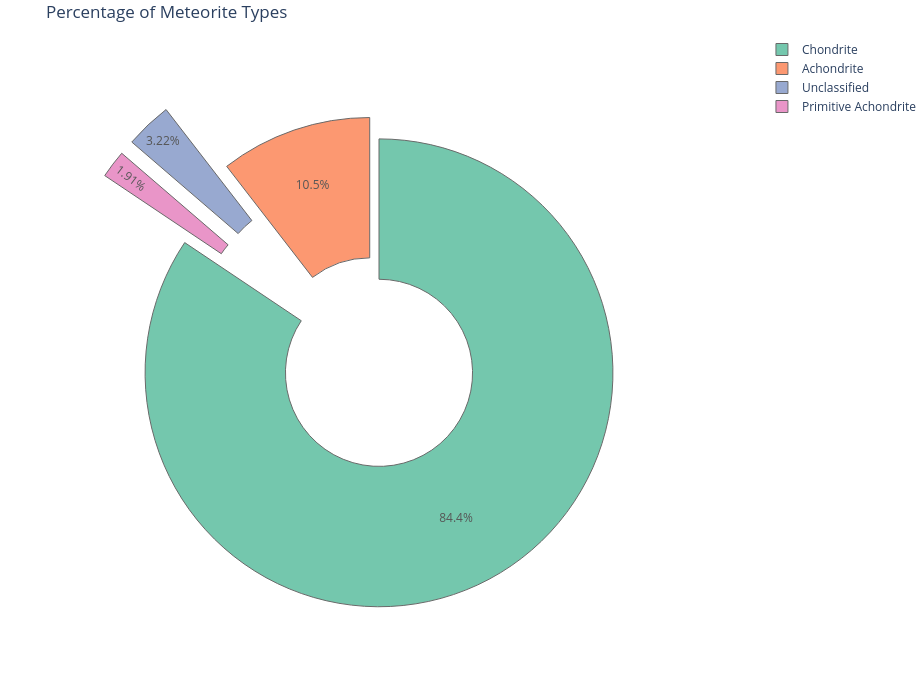

In [21]:
#import plotly go
import plotly.graph_objs as go

#create a pie chart to display the four meteorite types and their percentages
fig = go.Figure(data=[go.Pie(labels=grouped_by_type['Type'], 
                             values=grouped_by_type['percentage[%]'], 
                             hole=.4, 
                             marker=dict(colors=['rgb(102,194,165)', 'rgb(252,141,98)', 'rgb(141,160,203)', 'rgb(231,138,195)'], 
                                         line=dict(color='rgb(89, 89, 89)', width=1)),
                             opacity=0.9,
                             pull=[0.05, 0.05, 0.4, 0.4])])
#customize the plot
fig.update_layout(
    title="Percentage of Meteorite Types",
    height=700,
    width=700,
    margin=dict(t=35, b=10, l=0, r=5)
    
)

#display the plot
fig.show()

# Chondrite statistics

## Extract summary stats for the L-chondrite group using pattern matching

In [22]:
df183[df183['Type'] == 'Chondrite'].sort_values(by = 'mass (g)', ascending = False).reset_index(drop = True).head(10)

name     id       Type  group   mass (g)    year  latitude  \
0          Jilin  12171  Chondrite     H5  4000000.0  1976.0  44.05000   
1        Allende   2278  Chondrite    CV3  2000000.0  1969.0  26.96667   
2  Kunya-Urgench  12379  Chondrite     H5  1100000.0  1998.0  42.25000   
3      Knyahinya  12335  Chondrite  L/LL5   500000.0  1866.0  48.90000   
4        Ochansk  17979  Chondrite     H4   500000.0  1887.0  57.78333   
5      Paragould  18101  Chondrite    LL5   408000.0  1930.0  36.06667   
6       Bjurböle   5064  Chondrite  L/LL4   330000.0  1899.0  60.40000   
7     Bruderheim   5156  Chondrite     L6   303000.0  1960.0  53.90000   
8        Putinga  18905  Chondrite     L6   300000.0  1937.0 -29.03333   
9           Mocs  16709  Chondrite   L5-6   300000.0  1882.0  46.80000   

   longitude             country      continent  
0  126.16667               China           Asia  
1 -105.31667              Mexico  North America  
2   59.20000        Turkmenistan           Asia  
3   22.40000            Slovakia         Europe  
4   55.26667  Russian Federation         Europe  
5  -90.50000       United States  North America  
6   25.80000             Finland         Europe  
7 -112.88333              Canada  North America  
8  -53.05000              Brazil  South America  
9   24.03333             Romania         Europe

In [23]:
#summary stats for the L chondrites

# define the patterns to match
pattern1 = r'^L[^L]*$'  # matches records that start with "L" and don't have any more "L"s
pattern2 = r'^L/LL[^L]*$'  # matches records that start with "L/LL"
pattern3 = r'^L*$'  # matches records that only contain "L"s

L_cond = pd.concat([df183[df183['group'].str.contains(pattern1)], df183[df183['group'].str.contains(pattern2)],
df183[df183['group'].str.contains(pattern3)]])

L_cond[['mass (g)', 'year', 'latitude', 'longitude']].describe().round(2)

mass (g)     year  latitude  longitude
count     362.00   366.00    366.00     366.00
mean    19255.51  1929.02     29.43      16.00
std     53919.64    47.24     24.48      69.18
min         0.10  1830.00    -44.12    -122.97
25%       700.00  1894.25     20.85     -10.57
50%      2925.00  1928.50     36.65      17.13
75%     10000.00  1967.00     46.25      73.33
max    500000.00  2012.00     66.14     152.83

## Repeat the procedure using explicit group matching

In [24]:
#separate the L chondrites from the main dataframe
L_chondrites = df183[df183['group'].isin(['L', 'L/LL4', 'L/LL5','L/LL6', 'L/LL6-an', 'L3', 'L3-4', 'L3-6',
                                         'L3.4', 'L3.6', 'L3.7', 'L3.7-6', 'L4', 'L4-6', 'L5', 'L5-6', 'L5/6', 'L6'])]

#display the summary stats for the L chondrites
print()
display(L_chondrites[['mass (g)', 'year', 'latitude', 'longitude']].describe().round(2))

#take a look at the newly created frame
print()
display(L_chondrites.sort_values(by = 'mass (g)', ascending = False).head())

mass (g)     year  latitude  longitude
count     352.00   356.00    356.00     356.00
mean    19727.91  1929.24     29.80      15.56
std     54599.42    47.69     24.23      68.93
min         0.10  1830.00    -44.12    -122.97
25%       705.00  1894.00     20.87      -9.02
50%      3000.00  1929.00     36.82      16.55
75%     10312.50  1969.00     46.37      72.59
max    500000.00  2012.00     66.14     152.83

name     id       Type  group  mass (g)    year  latitude  \
489   Knyahinya  12335  Chondrite  L/LL5  500000.0  1866.0  48.90000   
120    Bjurböle   5064  Chondrite  L/LL4  330000.0  1899.0  60.40000   
144  Bruderheim   5156  Chondrite     L6  303000.0  1960.0  53.90000   
815     Putinga  18905  Chondrite     L6  300000.0  1937.0 -29.03333   
632        Mocs  16709  Chondrite   L5-6  300000.0  1882.0  46.80000   

     longitude   country      continent  
489   22.40000  Slovakia         Europe  
120   25.80000   Finland         Europe  
144 -112.88333    Canada  North America  
815  -53.05000    Brazil  South America  
632   24.03333   Romania         Europe

* The second method returns about 10 less records but is more precise. 

## Extract summary stats for the LL-chondrites

In [25]:
#summary stats for the LL chondrites

#separate the LL chondrites from the main dataframe
LL_chondrites = df183[df183['group'].isin(['LL', 'LL3-6', 'LL3.00', 'LL3.15', 'LL3.2', 
                                           'LL3.3', 'LL3.4', 'LL3.6', 'LL3.8', 'LL3.9', 
                                           'LL4', 'LL4-6', 'LL5', 'LL6', 'LL7'])]

#display the summary stats for the LL chondrites including only relevant fields
print()
display(LL_chondrites[['mass (g)', 'year', 'latitude', 'longitude']].describe().round(2))

#take a look at the newly created frame
print()
display(LL_chondrites.sort_values(by = 'mass (g)', ascending = False).head())

mass (g)     year  latitude  longitude
count      79.00    79.00     79.00      79.00
mean    20826.16  1931.18     30.53      22.02
std     59206.26    48.81     18.56      60.85
min         2.00  1830.00    -28.67    -104.59
25%       671.50  1895.50     22.87      -3.08
50%      1932.00  1933.00     33.88      21.87
75%      9950.00  1968.00     45.07      78.19
max    408000.00  2013.00     56.40     120.78

name     id       Type group  mass (g)    year  latitude  \
757      Paragould  18101  Chondrite   LL5  408000.0  1930.0  36.06667   
867  Saint-Séverin  23102  Chondrite   LL6  271000.0  1966.0  45.30000   
729       Olivenza  18013  Chondrite   LL5  150000.0  1924.0  38.71667   
961       Sulagiri  48951  Chondrite   LL6  110000.0  2008.0  12.66667   
193    Chelyabinsk  57165  Chondrite   LL5  100000.0  2013.0  54.81667   

     longitude             country      continent  
757  -90.50000       United States  North America  
867    0.23333              France         Europe  
729   -7.06667               Spain         Europe  
961   78.03333               India           Asia  
193   61.11667  Russian Federation         Europe

## Extract summary stats for the entire Chondrite type

In [26]:
#summary stats for the Chondrite meteorite type including only relevant fields
print()
display(df183[df183['Type'] == 'Chondrite'][['mass (g)', 'year', 'latitude', 'longitude']].describe().round(2))

mass (g)     year  latitude  longitude
count      829.0   838.00    838.00     838.00
mean     26091.6  1929.88     28.52      19.09
std     166170.2    48.60     23.89      70.70
min          0.1  1830.00    -44.12    -157.78
25%        680.5  1891.25     19.89      -7.01
50%       2900.0  1933.00     35.28      19.92
75%      10250.0  1970.00     45.21      76.77
max    4000000.0  2013.00     66.35     174.40

In [27]:
#group  chondrites by type and group and calculate the max mass for each group
chondrite_groups = df183[df183['Type'] == 'Chondrite'].groupby(['Type', 'group']).agg( count = ('name', 'count'),
                                                                     max_mass_grams = ('mass (g)', 'max')).reset_index()

#
chondrite_groups['percentage[%]'] = np.around(100 * chondrite_groups['count']  / chondrite_groups['count'].sum(), decimals = 2)

chondrite_groups_sorted = chondrite_groups.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

chondrite_groups_sorted['max_mass_Kilograms'] = np.around(chondrite_groups_sorted['max_mass_grams'] / 1000.0, decimals = 2)

chondrite_groups_sorted['max_mass_Pounds'] = np.around(chondrite_groups_sorted['max_mass_grams'] / 453.59237, decimals = 2)

print()
display(chondrite_groups_sorted.head(10))

#save the csv for future use
chondrite_groups_sorted.to_csv('./Data/chondrite_groups_sorted.csv')

Type group  count  max_mass_grams  percentage[%]  max_mass_Kilograms  \
0  Chondrite    L6    235        303000.0          28.04              303.00   
1  Chondrite    H5    152       4000000.0          18.14             4000.00   
2  Chondrite    H6     79        166000.0           9.43              166.00   
3  Chondrite    L5     72        230000.0           8.59              230.00   
4  Chondrite    H4     46        500000.0           5.49              500.00   
5  Chondrite   LL6     40        271000.0           4.77              271.00   
6  Chondrite    OC     20          4460.0           2.39                4.46   
7  Chondrite    L4     17        200000.0           2.03              200.00   
8  Chondrite   LL5     16        408000.0           1.91              408.00   
9  Chondrite   CM2     15        100000.0           1.79              100.00   

   max_mass_Pounds  
0           668.00  
1          8818.49  
2           365.97  
3           507.06  
4          1102.31  
5           597.45  
6             9.83  
7           440.92  
8           899.49  
9           220.46

# Visualize the chondrite group distribution

In [28]:
#find the count of unique chondrite groups
print()
print("there are " + str(chondrite_groups_sorted['group'].unique().shape[0]) + " unique chondrite groups")
print()


there are 79 unique chondrite groups



In [29]:
chondrite_groups_sorted['count'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 79 entries, 0 to 78
Series name: count
Non-Null Count  Dtype
--------------  -----
79 non-null     int64
dtypes: int64(1)
memory usage: 760.0 bytes


In [30]:
#define the color list to be used in the graph
# colors = px.colors.qualitative.T10 + px.colors.qualitative.Set2 + px.colors.qualitative.Set3

color_list = ['rgb(169, 85, 58)', 'rgb(122, 112, 108)', 'rgb(196, 116, 87)', 'rgb(194, 153, 143)', 'rgb(204, 140, 122)', 
          'rgb(174, 98, 78)', 'rgb(155, 124, 107)', 'rgb(228, 158, 124)', 'rgb(214, 133, 98)', 'rgb(189, 91, 64)', 
          'rgb(177, 175, 182)', 'rgb(204, 100, 76)', 'rgb(172, 121, 93)', 'rgb(169, 165, 166)', 'rgb(129, 84, 76)', 
          'rgb(145, 50, 28)', 'rgb(184, 132, 68)', 'rgb(132, 156, 180)', 'rgb(121, 164, 194)', 'rgb(230, 176, 13)', 
          'rgb(142, 104, 40)', 'rgb(84, 140, 178)', 'rgb(192, 168, 149)', 'rgb(218, 190, 124)', 'rgb(143, 167, 188)', 
          'rgb(141, 129, 120)', 'rgb(140, 175, 207)', 'rgb(181, 142, 78)', 'rgb(184, 158, 133)', 'rgb(177, 169, 173)', 
          'rgb(166, 121, 98)', 'rgb(183, 141, 42)', 'rgb(113, 127, 138)', 'rgb(185, 119, 4)', 'rgb(199, 155, 34)', 
          'rgb(165, 122, 40)', 'rgb(201, 136, 4)', 'rgb(175, 141, 100)', 'rgb(164, 173, 188)', 'rgb(199, 162, 96)', 
          'rgb(98, 107, 125)', 'rgb(135, 148, 168)', 'rgb(169, 159, 31)', 'rgb(200, 135, 119)', 'rgb(228, 140, 135)', 
          'rgb(244, 212, 52)', 'rgb(132, 124, 164)', 'rgb(169, 118, 88)', 'rgb(208, 158, 122)', 'rgb(173, 149, 131)', 
          'rgb(192, 171, 151)', 'rgb(157, 104, 80)', 'rgb(217, 165, 152)', 'rgb(193, 146, 111)', 'rgb(239, 163, 122)', 
          'rgb(217, 134, 78)', 'rgb(148, 133, 121)', 'rgb(210, 129, 116)', 'rgb(100, 125, 109)', 'rgb(157, 108, 132)', 
          'rgb(205, 115, 98)', 'rgb(215, 112, 47)', 'rgb(173, 80, 53)', 'rgb(212, 92, 60)', 'rgb(132, 184, 212)', 
          'rgb(131, 123, 115)', 'rgb(205, 182, 135)', 'rgb(186, 87, 29)', 'rgb(150, 123, 42)', 'rgb(181, 145, 51)', 
          'rgb(145, 52, 19)', 'rgb(149, 157, 162)', 'rgb(174, 66, 17)', 'rgb(114, 135, 152)', 'rgb(234, 149, 83)', 
          'rgb(153, 154, 44)', 'rgb(190, 159, 92)', 'rgb(215, 124, 54)', 'rgb(204, 182, 98)', 'rgb(155, 152, 104)', 
          'rgb(175, 170, 179)', 'rgb(194, 164, 71)', 'rgb(199, 110, 44)', 'rgb(154, 174, 191)', 'rgb(189, 127, 15)', 
          'rgb(187, 112, 126)', 'rgb(182, 95, 86)', 'rgb(98, 108, 148)', 'rgb(84, 168, 98)', 'rgb(182, 68, 116)', 
          'rgb(196, 140, 174)', 'rgb(143, 144, 148)', 'rgb(216, 139, 118)', 'rgb(183, 176, 177)', 'rgb(196, 125, 94)', 
          'rgb(224, 169, 144)', 'rgb(146, 173, 175)', 'rgb(125, 130, 136)', 'rgb(128, 163, 164)', 'rgb(186, 134, 118)', 
          'rgb(229, 147, 148)', 'rgb(178, 163, 155)', 'rgb(200, 165, 140)', 'rgb(172, 85, 57)', 'rgb(199, 90, 89)', 
          'rgb(166, 108, 27)', 'rgb(149, 108, 86)', 'rgb(152, 122, 112)', 'rgb(161, 188, 187)', 'rgb(229, 111, 96)', 
          'rgb(221, 164, 98)', 'rgb(158, 148, 172)', 'rgb(132, 180, 188)', 'rgb(108, 156, 156)']

#convert lists to numpy array
arr_big = np.array(color_list)

 
#indices of elements to be removed
remove_idx = [104, 30, 47, 50, 15, 97, 106, 29, 80, 93, 69, 77, 76, 25, 7, 57, 0, 103, 68, 24, 96, 26, 16, 5, 44, 3, 
              13, 33, 83, 108, 107, 2, 41, 43]


#use numpy.delete() to remove elements
new_arr = np.delete(arr_big, remove_idx)


#convert numpy array back to list
new_color_list = new_arr.tolist()

colors = list(reversed(new_color_list))

from random import shuffle

shuffle(colors)


#verify the number of colors
len(colors)

80

In [31]:
customdata_set = list(chondrite_groups_sorted[['count','percentage[%]', 'group']].to_numpy())

customdata_set = np.vstack ((customdata_set, [838, 100, 'Chondrites']))

print(customdata_set[78:80])

[[1 0.12 'R3.8-6']
 ['838' '100' 'Chondrites']]


In [32]:
df183[df183['Type'] == 'Chondrite']['mass (g)'].max()

4000000.0

In [33]:
# #shuffle colors 
# shuffle(colors)

In [34]:
#save the shuffled colors to prevent remixing on re-run 
chondrite_colors = ['rgb(122, 112, 108)', 'rgb(189, 91, 64)', 'rgb(199, 155, 34)', 'rgb(184, 158, 133)', 'rgb(157, 108, 132)', 
                    'rgb(166, 108, 27)', 'rgb(172, 121, 93)', 'rgb(129, 84, 76)', 'rgb(234, 149, 83)', 'rgb(173, 149, 131)', 
                    'rgb(214, 133, 98)', 'rgb(157, 104, 80)', 'rgb(155, 124, 107)', 'rgb(98, 108, 148)', 'rgb(100, 125, 109)', 
                    'rgb(187, 112, 126)', 'rgb(200, 165, 140)', 'rgb(183, 141, 42)', 'rgb(155, 152, 104)', 'rgb(149, 157, 162)', 
                    'rgb(196, 125, 94)', 'rgb(98, 107, 125)', 'rgb(131, 123, 115)', 'rgb(114, 135, 152)', 'rgb(113, 127, 138)', 
                    'rgb(229, 147, 148)', 'rgb(230, 176, 13)', 'rgb(199, 110, 44)', 'rgb(224, 169, 144)', 'rgb(121, 164, 194)', 
                    'rgb(181, 142, 78)', 'rgb(215, 112, 47)', 'rgb(216, 139, 118)', 'rgb(218, 190, 124)', 'rgb(128, 163, 164)', 
                    'rgb(132, 180, 188)', 'rgb(132, 156, 180)', 'rgb(208, 158, 122)', 'rgb(221, 164, 98)', 'rgb(205, 115, 98)', 
                    'rgb(108, 156, 156)', 'rgb(177, 175, 182)', 'rgb(192, 168, 149)', 'rgb(165, 122, 40)', 'rgb(204, 100, 76)', 
                    'rgb(145, 52, 19)', 'rgb(182, 68, 116)', 'rgb(244, 212, 52)', 'rgb(164, 173, 188)', 'rgb(158, 148, 172)', 
                    'rgb(204, 140, 122)', 'rgb(193, 146, 111)', 'rgb(194, 164, 71)', 'rgb(153, 154, 44)', 'rgb(175, 141, 100)', 
                    'rgb(142, 104, 40)', 'rgb(182, 95, 86)', 'rgb(143, 144, 148)', 'rgb(186, 87, 29)', 'rgb(173, 80, 53)', 
                    'rgb(132, 124, 164)', 'rgb(217, 165, 152)', 'rgb(205, 182, 135)', 'rgb(212, 92, 60)', 'rgb(217, 134, 78)', 
                    'rgb(189, 127, 15)', 'rgb(84, 168, 98)', 'rgb(196, 140, 174)', 'rgb(148, 133, 121)', 'rgb(169, 159, 31)', 
                    'rgb(204, 182, 98)', 'rgb(239, 163, 122)', 'rgb(174, 66, 17)', 'rgb(84, 140, 178)', 'rgb(178, 163, 155)',
                    'rgb(186, 134, 118)', 'rgb(201, 136, 4)', 'rgb(132, 184, 212)', 'rgb(199, 162, 96)', 'rgb(229, 111, 96)']

In [35]:
chondrite_groups_sorted['count'].sum()

838

[838 100 4000000.0 'Chondrites']


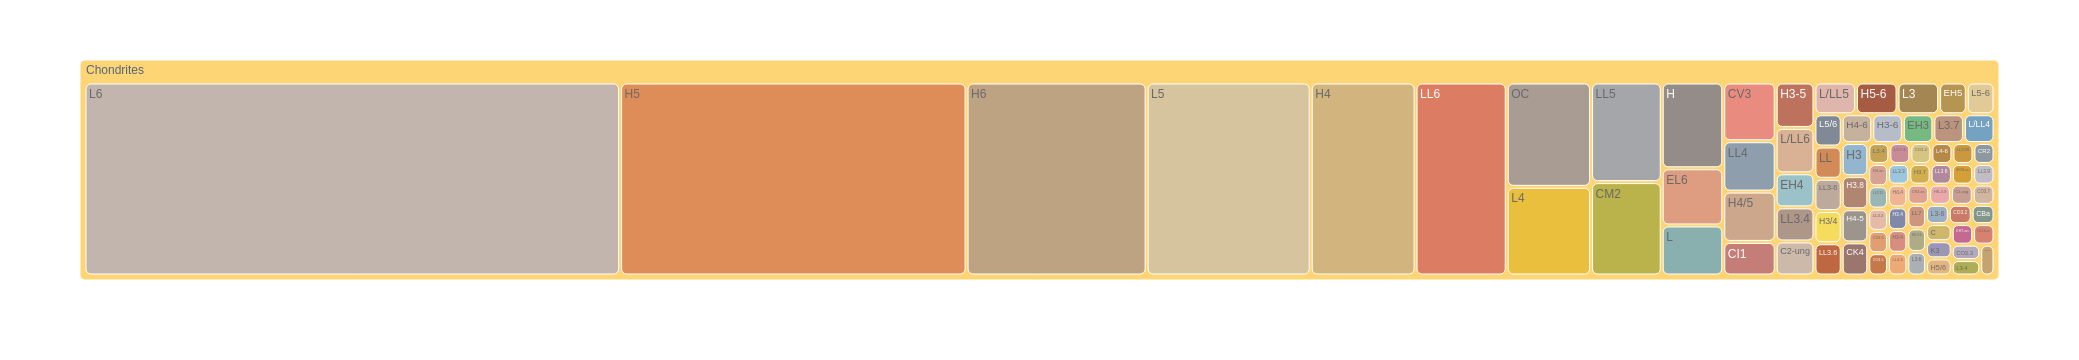

In [36]:
import plotly.graph_objects as go

# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(chondrite_groups_sorted['group'].values, colors)}

# Create the treemap figure
fig = px.treemap(chondrite_groups_sorted, 
                 path=[px.Constant('Chondrites'), 'group'], 
                 values='count', 
                 color='group', 
                 color_discrete_map = color_map,
                 custom_data = [chondrite_groups_sorted['count'], chondrite_groups_sorted['percentage[%]'], chondrite_groups_sorted['max_mass_grams']],
                 hover_data=["count"]
                                  
                )

fig.update_traces(hoverinfo = "text", 
                  marker=dict(cornerradius=5),
                  opacity = 0.8,
                 hovertemplate = "<br>".join([
                     "%{label}",
                     "<br>",
                     "Count: %{customdata[0]}",
                     "Percent: %{customdata[1]}",
                     "Maximum Mass in grams: %{customdata[2]}"
    ]))
fig.data[0].customdata[79] = [838, 100, 4000000.0, 'Chondrites']

print(fig.data[0].customdata[79])
# Show the figure
fig.show()


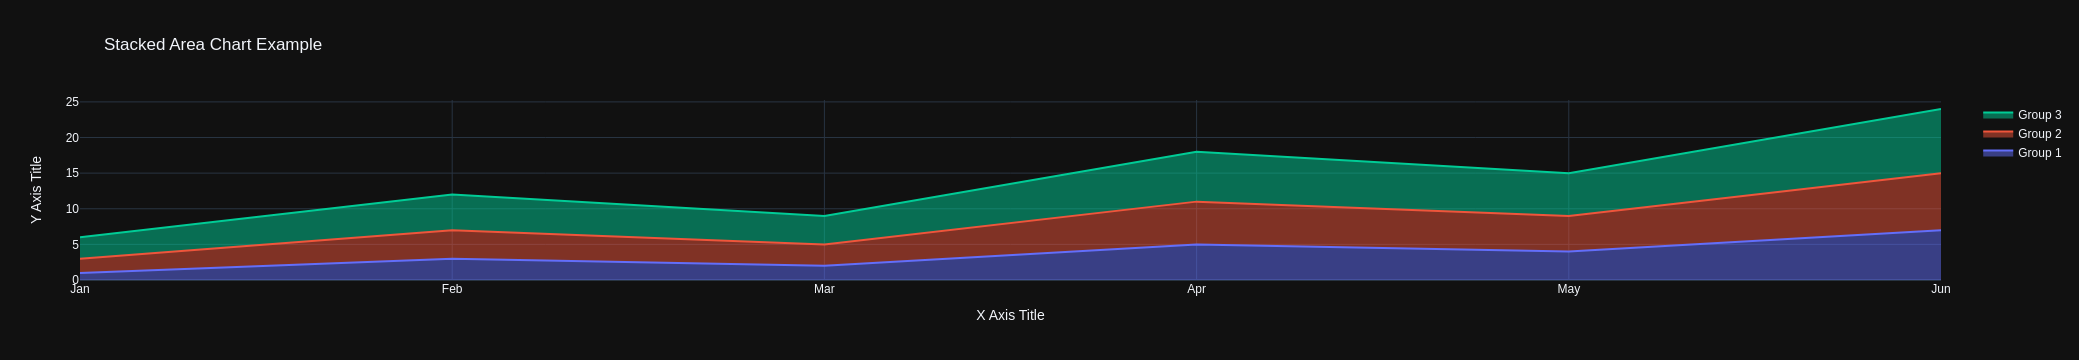

In [37]:
import plotly.graph_objs as go

# Create sample data
x = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
y0 = [1, 3, 2, 5, 4, 7]
y1 = [2, 4, 3, 6, 5, 8]
y2 = [3, 5, 4, 7, 6, 9]

# Create the stacked area chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y0, mode='lines', stackgroup='one', name='Group 1'))
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', stackgroup='one', name='Group 2'))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines', stackgroup='one', name='Group 3'))

# Add layout information
fig.update_layout(title='Stacked Area Chart Example',
                  xaxis_title='X Axis Title',
                  yaxis_title='Y Axis Title',
                  hovermode='x unified',
                  template='plotly_dark')

# Show the figure
fig.show()

# Achondrite statistics

In [38]:
#summary stats for achondrites
print()
display(df183[df183['Type'] == 'Achondrite'].describe().round(2))

id     mass (g)     year  latitude  longitude
count    104.00       104.00   104.00    104.00     104.00
mean   16902.12    262480.70  1926.48     27.70      19.76
std    11163.07   2255322.46    46.63     24.64      71.74
min      423.00         0.15  1835.00    -31.35    -122.35
25%    10040.50       715.70  1898.75     21.15      -7.50
50%    16055.00      2722.50  1930.00     34.78      26.80
75%    22674.00     17400.00  1954.00     44.79      75.10
max    55584.00  23000000.00  2011.00     64.02     161.81

In [39]:
#group  achondrites by type and group and calculate the max mass for each group
achondrite_groups = df183[df183['Type'] == 'Achondrite'].groupby(['Type', 'group']).agg( count = ('name', 'count'),
                                                                     max_mass_grams = ('mass (g)', 'max')).reset_index()

#
achondrite_groups['percentage[%]'] = np.around(100 * achondrite_groups['count']  / achondrite_groups['count'].sum(), decimals = 2)

achondrite_groups_sorted = achondrite_groups.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

achondrite_groups_sorted['max_mass_Kilograms'] = np.around(achondrite_groups_sorted['max_mass_grams'] / 1000.0, decimals = 2)

achondrite_groups_sorted['max_mass_Pounds'] = np.around(achondrite_groups_sorted['max_mass_grams'] / 453.59237, decimals = 2)

print()
print(achondrite_groups_sorted.shape[0])
display(achondrite_groups_sorted.head(10))

#save the csv for future use
achondrite_groups_sorted.to_csv('./Data/achondrite_groups_sorted.csv')


28


Type                  group  count  max_mass_grams  percentage[%]  \
0  Achondrite          Eucrite-mmict     15        330000.0          14.42   
1  Achondrite              Howardite     14         40000.0          13.46   
2  Achondrite            Iron, IIIAB     10        600000.0           9.62   
3  Achondrite                Aubrite      9       1100000.0           8.65   
4  Achondrite              Diogenite      8         40300.0           7.69   
5  Achondrite             Iron, IIAB      6      23000000.0           5.77   
6  Achondrite             Eucrite-cm      6          1880.0           5.77   
7  Achondrite          Eucrite-pmict      5          5100.0           4.81   
8  Achondrite              Iron, IVA      4         50000.0           3.85   
9  Achondrite  Martian (shergottite)      3         18000.0           2.88   

   max_mass_Kilograms  max_mass_Pounds  
0              330.00           727.53  
1               40.00            88.18  
2              600.00          1322.77  
3             1100.00          2425.08  
4               40.30            88.85  
5            23000.00         50706.32  
6                1.88             4.14  
7                5.10            11.24  
8               50.00           110.23  
9               18.00            39.68

In [40]:
achondrite_groups_sorted['max_mass_grams'].describe().round(2)

count          28.00
mean       933659.43
std       4331070.20
min             0.15
25%          1785.00
50%         27675.00
75%         79450.00
max      23000000.00
Name: max_mass_grams, dtype: float64

In [41]:
#color shuffler 
# shuffle(colors)
# achondrite_colors = colors
# print(achondrite_colors)

In [42]:
achondrite_colors = ['rgb(218, 190, 124)', 'rgb(121, 164, 194)', 'rgb(149, 157, 162)', 'rgb(196, 125, 94)', 'rgb(132, 124, 164)', 
                     'rgb(215, 112, 47)', 'rgb(145, 52, 19)', 'rgb(186, 87, 29)', 'rgb(142, 104, 40)', 'rgb(84, 168, 98)', 
                     'rgb(100, 125, 109)', 'rgb(84, 140, 178)', 'rgb(229, 111, 96)', 'rgb(244, 212, 52)', 'rgb(178, 163, 155)', 
                     'rgb(177, 175, 182)', 'rgb(205, 115, 98)', 'rgb(132, 180, 188)', 'rgb(234, 149, 83)', 'rgb(143, 144, 148)', 
                     'rgb(172, 121, 93)', 'rgb(204, 140, 122)', 'rgb(239, 163, 122)', 'rgb(182, 68, 116)', 'rgb(194, 164, 71)',
                     'rgb(201, 136, 4)', 'rgb(175, 141, 100)', 'rgb(129, 84, 76)', 'rgb(204, 100, 76)', 'rgb(187, 112, 126)',
                     'rgb(212, 92, 60)', 'rgb(173, 149, 131)', 'rgb(157, 108, 132)', 'rgb(98, 107, 125)', 'rgb(217, 165, 152)', 
                     'rgb(186, 134, 118)', 'rgb(157, 104, 80)', 'rgb(192, 168, 149)', 'rgb(169, 159, 31)', 'rgb(132, 184, 212)', 
                     'rgb(174, 66, 17)', 'rgb(204, 182, 98)', 'rgb(208, 158, 122)', 'rgb(184, 158, 133)', 'rgb(229, 147, 148)', 
                     'rgb(114, 135, 152)', 'rgb(193, 146, 111)', 'rgb(221, 164, 98)', 'rgb(199, 110, 44)', 'rgb(128, 163, 164)', 
                     'rgb(165, 122, 40)', 'rgb(196, 140, 174)', 'rgb(148, 133, 121)', 'rgb(98, 108, 148)', 'rgb(108, 156, 156)', 
                     'rgb(224, 169, 144)', 'rgb(155, 124, 107)', 'rgb(200, 165, 140)', 'rgb(155, 152, 104)', 'rgb(113, 127, 138)', 
                     'rgb(216, 139, 118)', 'rgb(122, 112, 108)', 'rgb(199, 155, 34)', 'rgb(132, 156, 180)', 'rgb(173, 80, 53)', 
                     'rgb(189, 127, 15)', 'rgb(166, 108, 27)', 'rgb(217, 134, 78)', 'rgb(183, 141, 42)', 'rgb(214, 133, 98)', 
                     'rgb(153, 154, 44)', 'rgb(131, 123, 115)', 'rgb(230, 176, 13)', 'rgb(205, 182, 135)', 'rgb(158, 148, 172)', 
                     'rgb(182, 95, 86)', 'rgb(164, 173, 188)', 'rgb(199, 162, 96)', 'rgb(189, 91, 64)', 'rgb(181, 142, 78)']

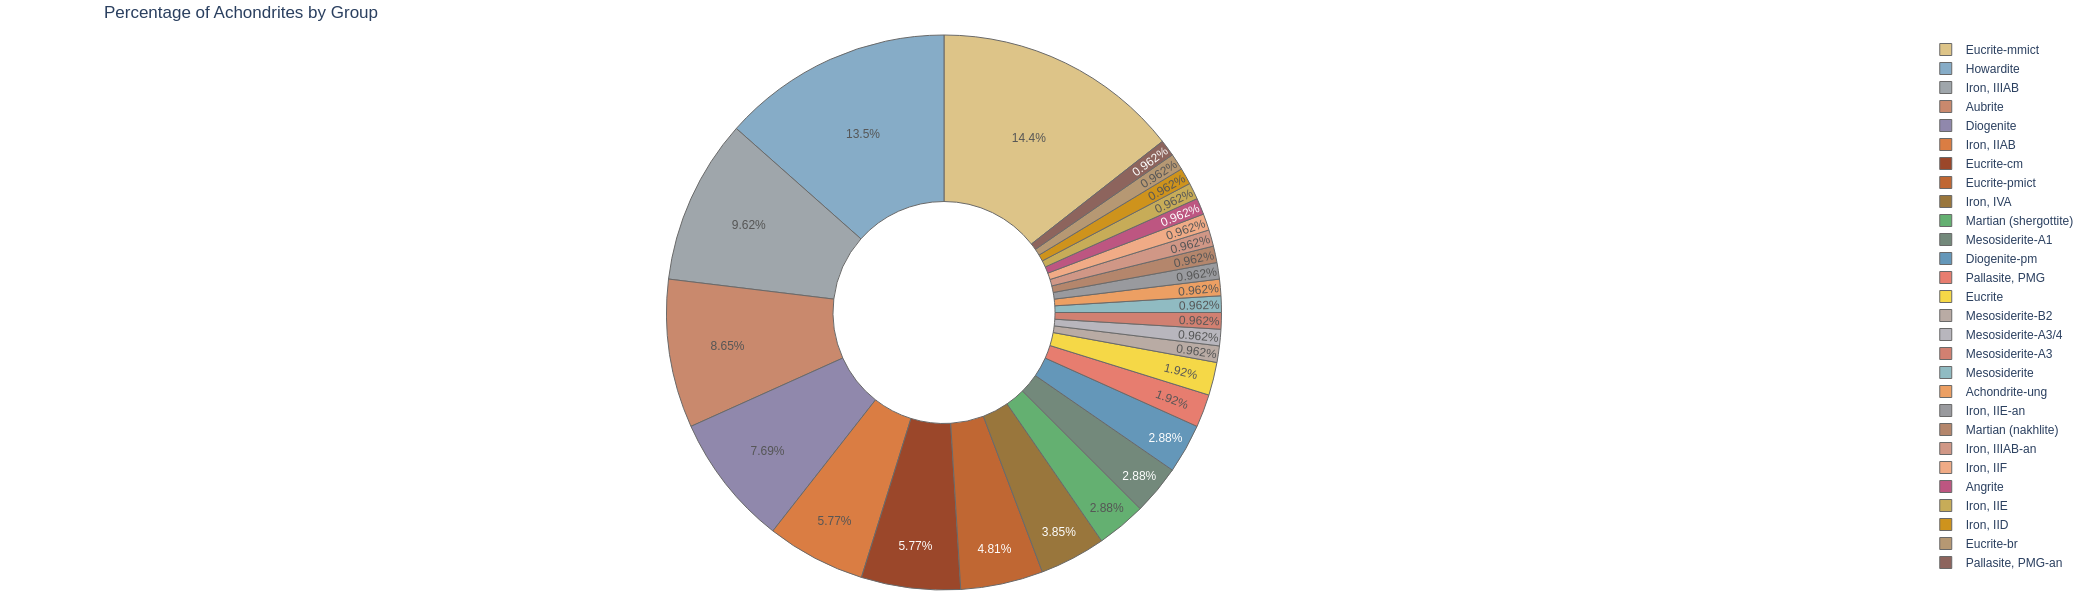

In [43]:
#create a pie chart using plotly go
fig = go.Figure(data=[go.Pie(labels=achondrite_groups_sorted['group'], 
                             values=achondrite_groups_sorted['count'], 
                             hole=.4,                             
                             marker=dict(colors = achondrite_colors, 
                                         line=dict(color='rgb(89, 89, 89)', width=1)),
                             opacity=0.9)])

# customize hovertemplate to display all three columns
fig.update_traces(hovertemplate='Group: %{label}<br>Count: %{value}<br>Percentage: %{percent}')

#customize layout
fig.update_layout(
    title="Percentage of Achondrites by Group",
    height=600,
    width=900,
    margin=dict(t=35, b=10, l=0, r=5)
    
)

#display the graph
print()
fig.show()
print()




In [44]:
achondrite_groups_sorted['count'].sum()

104

[104 100 23000000.0 'Achondrites']


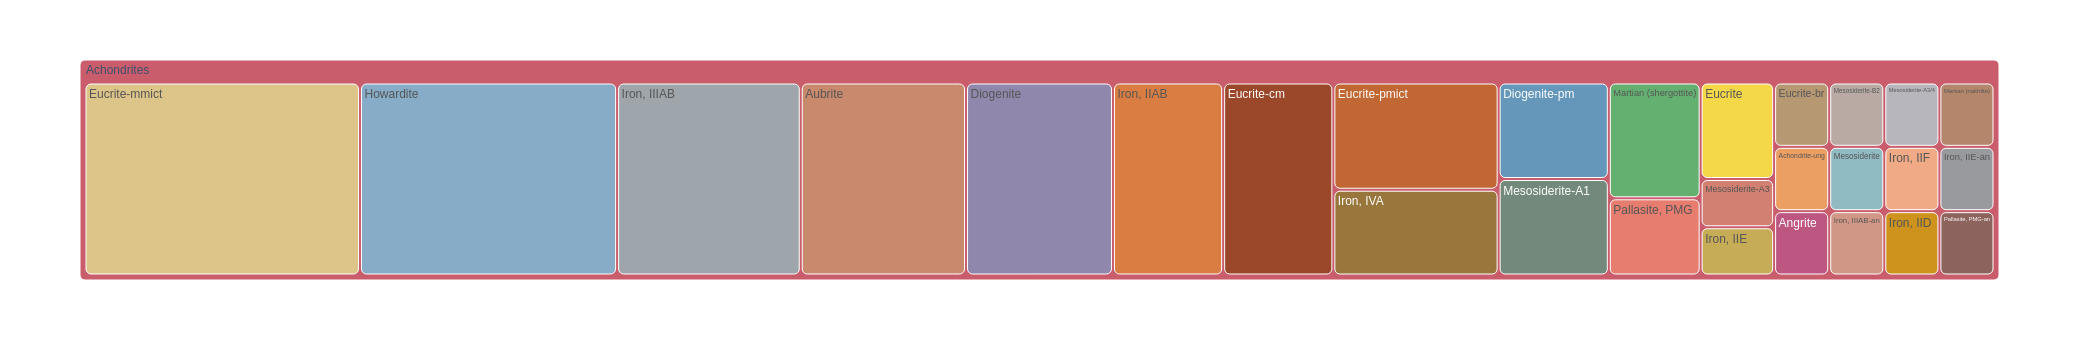

In [45]:
import plotly.graph_objects as go

# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(achondrite_groups_sorted['group'].values, achondrite_colors)}



# Create the treemap figure
fig = px.treemap(achondrite_groups_sorted, 
                 path=[px.Constant('Achondrites'), 'group'], 
                 values='count', 
                 color='group',
                 color_discrete_sequence=['rgb(196, 76, 92)'],
                 color_discrete_map = color_map,
                 custom_data = [achondrite_groups_sorted['count'], achondrite_groups_sorted['percentage[%]'], achondrite_groups_sorted['max_mass_grams']],
                 hover_data=["count"]
                                  
                )

fig.update_traces(hoverinfo = "text", 
                  marker=dict(cornerradius=5),
                  opacity = 0.9,
                 hovertemplate = "<br>".join([
                     "%{label}",
                     "<br>",
                     "Count: %{customdata[0]}",
                     "Percent: %{customdata[1]}",
                     "Maximum Mass in grams: %{customdata[2]}"
    ]))
fig.data[0].customdata[28] = [104, 100, 23000000.00, 'Achondrites']

print(fig.data[0].customdata[28])
# Show the figure
fig.show()


In [46]:
#create a separate dataframe for achondrites
achondrites = df183[df183['Type'] == 'Achondrite'].sort_values(by = 'mass (g)', ascending = False).reset_index(drop = True)

print()
display(achondrites.head(5))

name     id        Type          group    mass (g)    year  \
0   Sikhote-Alin  23593  Achondrite     Iron, IIAB  23000000.0  1947.0   
1  Norton County  17922  Achondrite        Aubrite   1100000.0  1948.0   
2        Jianshi  12087  Achondrite    Iron, IIIAB    600000.0  1890.0   
3  Millbillillie  16643  Achondrite  Eucrite-mmict    330000.0  1960.0   
4    Sterlitamak  23724  Achondrite    Iron, IIIAB    325000.0  1990.0   

   latitude  longitude             country      continent  
0  46.16000  134.65333  Russian Federation         Europe  
1  39.68333  -99.86667       United States  North America  
2  30.80833  109.50000               China           Asia  
3 -26.45000  120.36667           Australia        Oceania  
4  53.66667   55.98333  Russian Federation         Europe

In [47]:
#find the count of unique achondrite groups
achondrites['group'].unique().shape[0]

28

## Primitive Achondrite Statistics

In [48]:
#group  achondrites by type and group and calculate the max mass for each group
primitive_achondrite_groups = df183[df183['Type'] == 'Primitive Achondrite'].groupby(['Type', 'group']).agg( count = ('name', 'count'),
                                                                     max_mass_grams = ('mass (g)', 'max')).reset_index()

#
primitive_achondrite_groups['percentage[%]'] = np.around(100 * primitive_achondrite_groups['count']  / primitive_achondrite_groups['count'].sum(), decimals = 2)

primitive_achondrite_groups_sorted = primitive_achondrite_groups.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

primitive_achondrite_groups_sorted['max_mass_Kilograms'] = np.around(primitive_achondrite_groups_sorted['max_mass_grams'] / 1000.0, decimals = 2)

primitive_achondrite_groups_sorted['max_mass_Pounds'] = np.around(primitive_achondrite_groups_sorted['max_mass_grams'] / 453.59237, decimals = 2)

print()
print(primitive_achondrite_groups_sorted.shape[0])
display(primitive_achondrite_groups_sorted)

#save the csv for future use
primitive_achondrite_groups_sorted.to_csv('./Data/primitive_groups_sorted.csv')


10


Type              group  count  max_mass_grams  \
0  Primitive Achondrite           Ureilite      5          1900.0   
1  Primitive Achondrite      Iron, IAB-sHL      3          5000.0   
2  Primitive Achondrite      Iron, IAB-ung      3        103000.0   
3  Primitive Achondrite      Iron, IAB-sLL      2         10322.0   
4  Primitive Achondrite        Acapulcoite      1          1914.0   
5  Primitive Achondrite  Iron, IAB complex      1        150200.0   
6  Primitive Achondrite       Iron, IAB-MG      1          8800.0   
7  Primitive Achondrite          Lodranite      1          1000.0   
8  Primitive Achondrite        Ureilite-an      1          3950.0   
9  Primitive Achondrite          Winonaite      1           157.0   

   percentage[%]  max_mass_Kilograms  max_mass_Pounds  
0          26.32                1.90             4.19  
1          15.79                5.00            11.02  
2          15.79              103.00           227.08  
3          10.53               10.32            22.76  
4           5.26                1.91             4.22  
5           5.26              150.20           331.13  
6           5.26                8.80            19.40  
7           5.26                1.00             2.20  
8           5.26                3.95             8.71  
9           5.26                0.16             0.35

In [49]:
shuffle(colors)

In [50]:
primitive_colors = colors

In [51]:
primitive_achondrite_groups_sorted.describe().round(2)

count  max_mass_grams  percentage[%]  max_mass_Kilograms  \
count  10.00           10.00          10.00               10.00   
mean    1.90        28624.30          10.00               28.62   
std     1.37        52923.86           7.21               52.92   
min     1.00          157.00           5.26                0.16   
25%     1.00         1903.50           5.26                1.90   
50%     1.00         4475.00           5.26                4.47   
75%     2.75         9941.50          14.48                9.94   
max     5.00       150200.00          26.32              150.20   

       max_mass_Pounds  
count            10.00  
mean             63.11  
std             116.68  
min               0.35  
25%               4.20  
50%               9.86  
75%              21.92  
max             331.13

In [52]:
primitive_achondrite_groups_sorted['count'].sum()

19

[19 100 150200.0 'Primitive Achondrites']


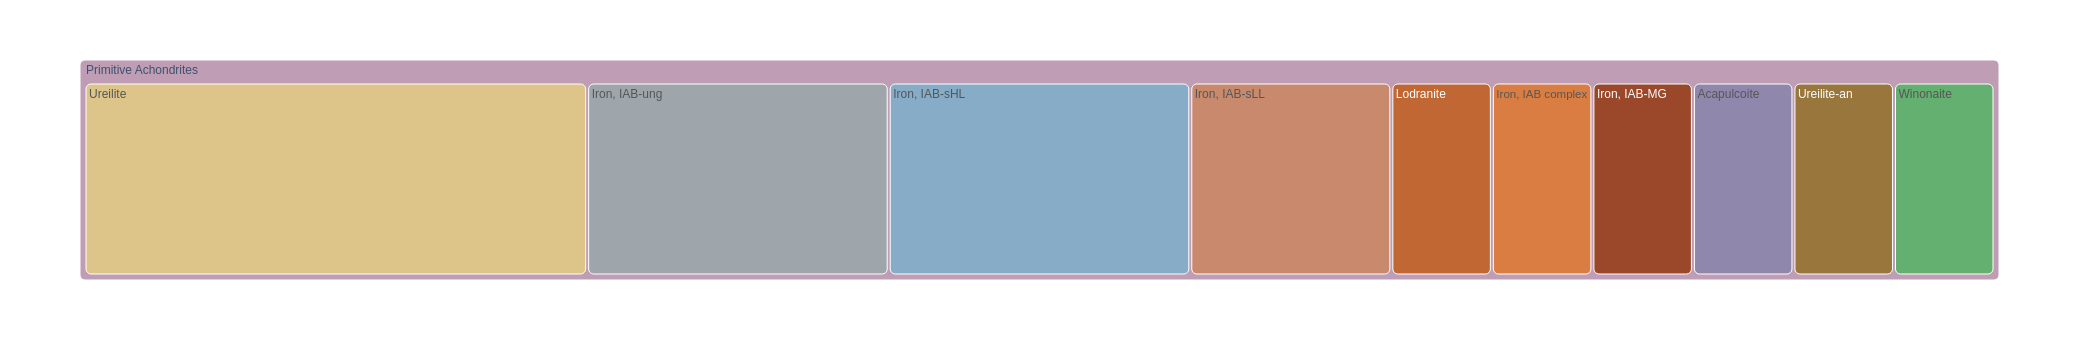

In [53]:
import plotly.graph_objects as go

# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(primitive_achondrite_groups_sorted['group'].values, achondrite_colors)}



# Create the treemap figure
fig = px.treemap(primitive_achondrite_groups_sorted, 
                 path=[px.Constant('Primitive Achondrites'), 'group'], 
                 values='count', 
                 color='group',
                 color_discrete_sequence=['rgb(185, 148, 174)'],
                 color_discrete_map = color_map,
                 custom_data = [primitive_achondrite_groups_sorted['count'], primitive_achondrite_groups_sorted['percentage[%]'], primitive_achondrite_groups_sorted['max_mass_grams']],
                 hover_data=["count"]
                                  
                )

fig.update_traces(hoverinfo = "text", 
                  marker=dict(cornerradius=5),
                  opacity = 0.9,
                 hovertemplate = "<br>".join([
                     "%{label}",
                     "<br>",
                     "Count: %{customdata[0]}",
                     "Percent: %{customdata[1]}",
                     "Maximum Mass in grams: %{customdata[2]}"
    ]))
fig.data[0].customdata[10] = [19, 100, 150200.0, 'Primitive Achondrites']

print(fig.data[0].customdata[10])
# Show the figure
fig.show()

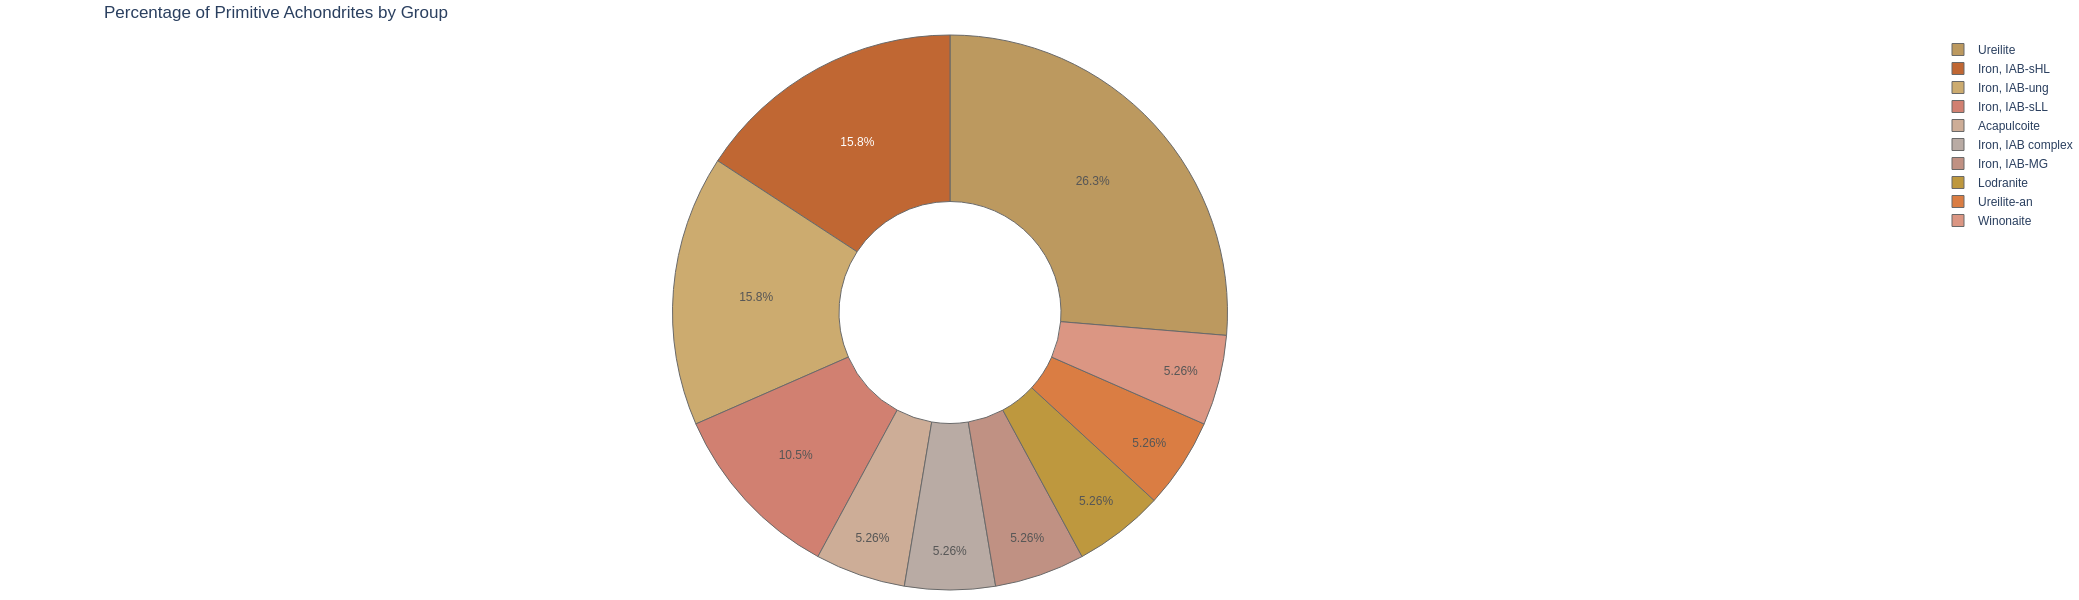

In [54]:
#create a pie chart using plotly go
fig = go.Figure(data=[go.Pie(labels=primitive_achondrite_groups_sorted['group'], 
                             values=primitive_achondrite_groups_sorted['count'], 
                             hole=.4,                             
                             marker=dict(colors = primitive_colors, 
                                         line=dict(color='rgb(89, 89, 89)', width=1)),
                             opacity=0.9)])

# customize hovertemplate to display all three columns
fig.update_traces(hovertemplate='Group: %{label}<br>Count: %{value}<br>Percentage: %{percent}')

#customize layout
fig.update_layout(
    title="Percentage of Primitive Achondrites by Group",
    height=600,
    width=900,
    margin=dict(t=35, b=10, l=0, r=5)
    
)

#display the graph
print()
fig.show()
print()

## 'Unclassified' statistics

In [55]:
df183[df183['group'] == 'Iron?']

name    id          Type  group  mass (g)    year  latitude  \
146  Bulls Run  5163  Unclassified  Iron?    2250.0  1964.0 -29.09845   

     longitude       country continent  
146  22.584989  South Africa    Africa

In [56]:
df183.loc[[146], 'group'] = 'Iron'

In [57]:
df183.loc[146]

name            Bulls Run
id                   5163
Type         Unclassified
group                Iron
mass (g)           2250.0
year               1964.0
latitude        -29.09845
longitude       22.584989
country      South Africa
continent          Africa
Name: 146, dtype: object

In [58]:
df183[df183['group'] == 'Iron, ungrouped']

name     id          Type            group  mass (g)    year  \
69   Ban Rong Du   4934  Unclassified  Iron, ungrouped   16700.0  1993.0   
682    Nedagolla  16935  Unclassified  Iron, ungrouped    4500.0  1870.0   
690   N'Goureyma  16968  Unclassified  Iron, ungrouped   37500.0  1900.0   
937       Soroti  23671  Unclassified  Iron, ungrouped    2050.0  1945.0   

     latitude  longitude   country continent  
69   16.66667  101.18333  Thailand      Asia  
682  18.68333   83.48333     India      Asia  
690  13.85000   -4.38333      Mali    Africa  
937   1.70000   33.63333    Uganda    Africa

'Iron' and 'Iron, ungrouped' are both ungrouped or partially grouped categories so it makes sens to unite them all under one category i.e. 'Iron'. 

In [59]:
#Merging the 'Iron' and 'Iron, ungrouped' meteorites into one group
df183.loc[[69], 'group'] = 'Iron'
df183.loc[[682], 'group'] = 'Iron'
df183.loc[[690], 'group'] = 'Iron'
df183.loc[[937], 'group'] = 'Iron'

In [60]:
#group  achondrites by type and group and calculate the max mass for each group
unclassified_groups = df183[df183['Type'] == 'Unclassified'].groupby(['Type', 'group']).agg( count = ('name', 'count'),
                                                                     max_mass_grams = ('mass (g)', 'max')).reset_index()

#
unclassified_groups['percentage[%]'] = np.around(100 * unclassified_groups['count']  / unclassified_groups['count'].sum(), decimals = 2)

unclassified_groups_sorted = unclassified_groups.sort_values(by = "percentage[%]", ascending = False).reset_index(drop = True)

unclassified_groups_sorted['max_mass_Kilograms'] = np.around(unclassified_groups_sorted['max_mass_grams'] / 1000.0, decimals = 2)

unclassified_groups_sorted['max_mass_Pounds'] = np.around(unclassified_groups_sorted['max_mass_grams'] / 453.59237, decimals = 2)

print()
print(unclassified_groups_sorted.shape[0])
display(unclassified_groups_sorted.head(10))

#save the csv for future use
unclassified_groups_sorted.to_csv('./Data/unclassified_groups_sorted.csv')


3


Type       group  count  max_mass_grams  percentage[%]  \
0  Unclassified  Stone-uncl     20          2700.0          62.50   
1  Unclassified        Iron     11         37500.0          34.38   
2  Unclassified     Unknown      1             NaN           3.12   

   max_mass_Kilograms  max_mass_Pounds  
0                 2.7             5.95  
1                37.5            82.67  
2                 NaN              NaN

In [61]:
unclassified_groups_sorted.describe().round(2)

count  max_mass_grams  percentage[%]  max_mass_Kilograms  \
count   3.00            2.00           3.00                2.00   
mean   10.67        20100.00          33.33               20.10   
std     9.50        24607.32          29.70               24.61   
min     1.00         2700.00           3.12                2.70   
25%     6.00        11400.00          18.75               11.40   
50%    11.00        20100.00          34.38               20.10   
75%    15.50        28800.00          48.44               28.80   
max    20.00        37500.00          62.50               37.50   

       max_mass_Pounds  
count             2.00  
mean             44.31  
std              54.25  
min               5.95  
25%              25.13  
50%              44.31  
75%              63.49  
max              82.67

In [62]:
unclassified_groups_sorted['count'].sum()

32

[32 100 37500.0 'Unclassified']
[1 3.12 'Unknown' 'Unknown']


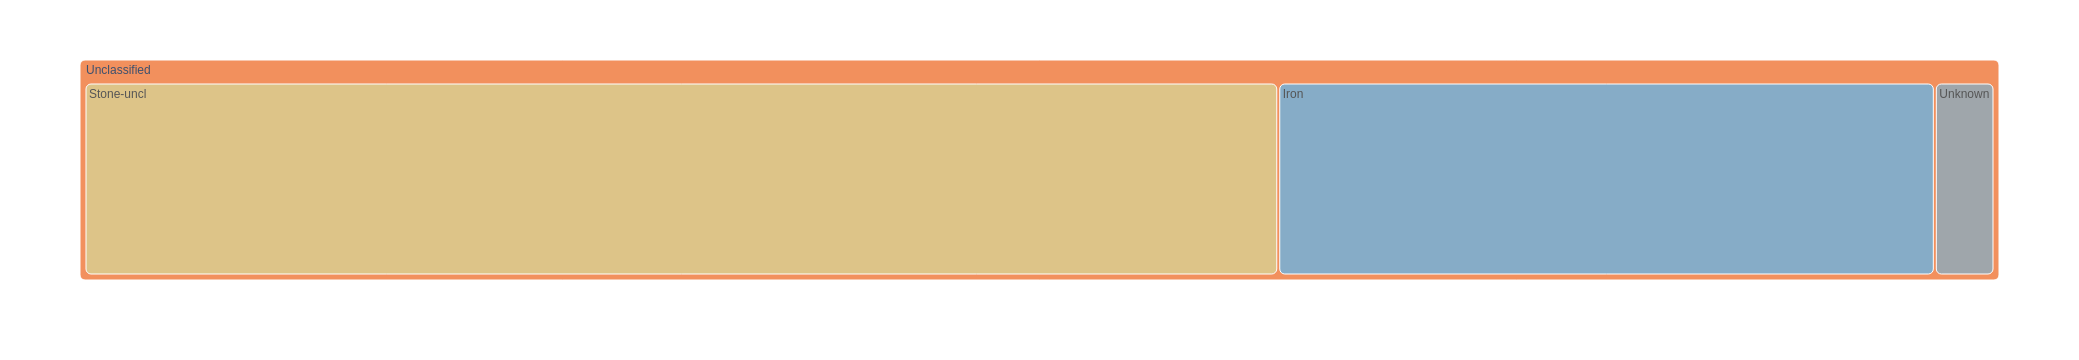

In [63]:
import plotly.graph_objects as go

# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(unclassified_groups_sorted['group'].values, achondrite_colors)}



# Create the treemap figure
fig = px.treemap(unclassified_groups_sorted, 
                 path=[px.Constant('Unclassified'), 'group'], 
                 values='count', 
                 color='group',
                 color_discrete_sequence=['rgb(241, 132, 76)'],
                 color_discrete_map = color_map,
                 custom_data = [unclassified_groups_sorted['count'], unclassified_groups_sorted['percentage[%]'], unclassified_groups_sorted['max_mass_grams']],
                 hover_data=["count"]
                                  
                )

fig.update_traces(hoverinfo = "text", 
                  marker=dict(cornerradius=5),
                  opacity = 0.9,
                 hovertemplate = "<br>".join([
                     "%{label}",
                     "<br>",
                     "Count: %{customdata[0]}",
                     "Percent: %{customdata[1]}",
                     "Maximum Mass in grams: %{customdata[2]}"
    ]))
fig.data[0].customdata[3] = [32, 100, 37500.00, 'Unclassified']
fig.data[0].customdata[2] = [1, 3.12, 'Unknown', 'Unknown']

print(fig.data[0].customdata[3])
print(fig.data[0].customdata[2])
# Show the figure
fig.show()

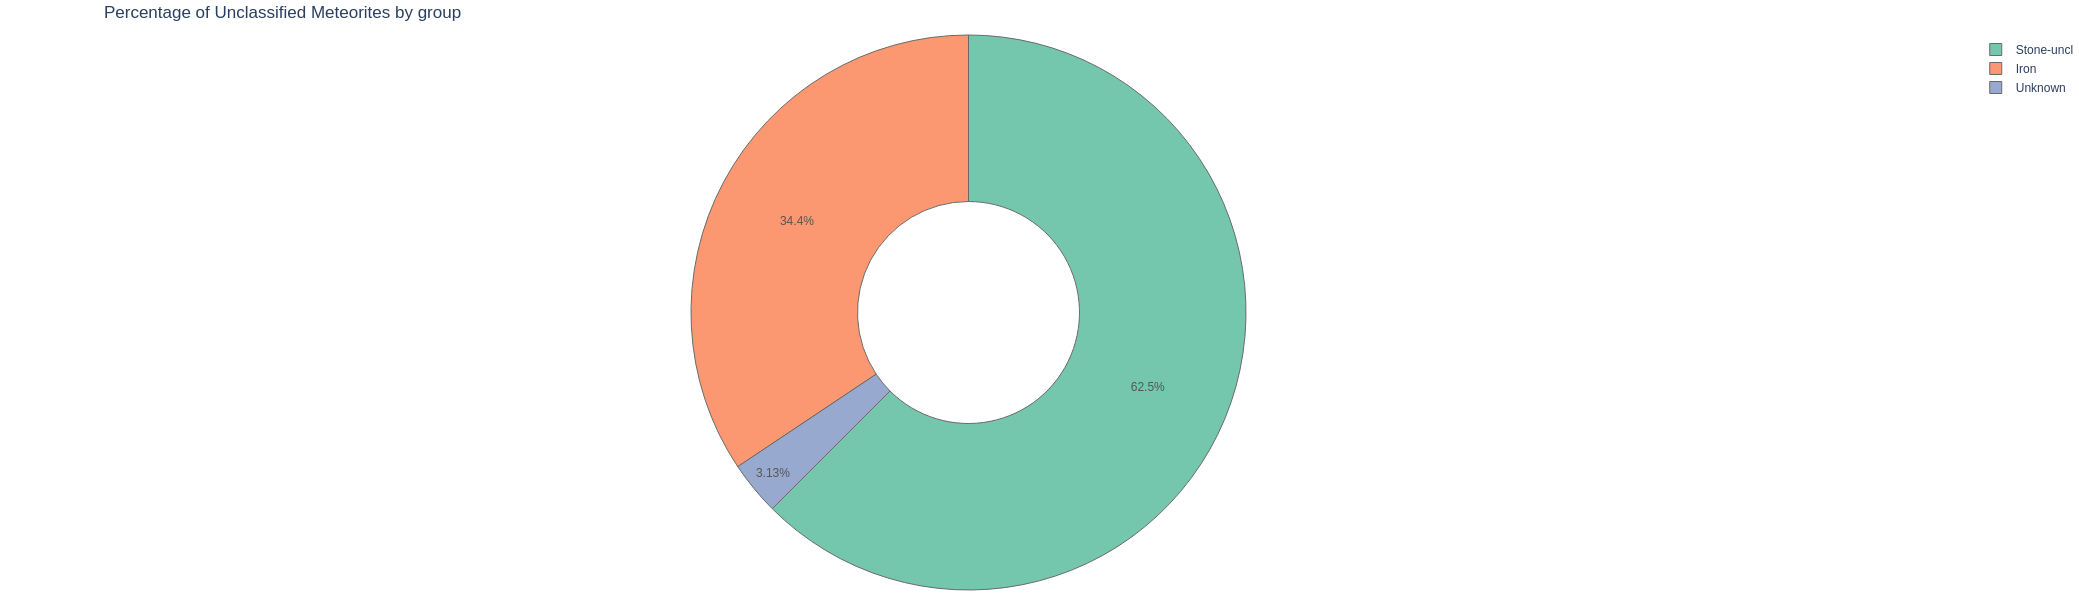

In [64]:
#create a pie chart using plotly go
fig = go.Figure(data=[go.Pie(labels=unclassified_groups_sorted['group'], 
                             values=unclassified_groups_sorted['count'], 
                             hole=.4,                             
                             marker=dict(colors=px.colors.qualitative.Set2, 
                                         line=dict(color='rgb(89, 89, 89)', width=1)),
                             opacity=0.9)])

# customize hovertemplate to display all three columns
fig.update_traces(hovertemplate='Group: %{label}<br>Count: %{value}<br>Percentage: %{percent}')

#customize layout
fig.update_layout(
    title="Percentage of Unclassified Meteorites by group",
    height=600,
    width=900,
    margin=dict(t=35, b=10, l=0, r=5)
    
)

#display the graph
print()
fig.show()
print()

# 'Type' statistics based on monthly falls

* To get statistics based on the month of fall for the given time period, the Meteorite Catalogue database from the UK NHM needs to be imported.

* This dataset is shorter by a decade or so but it includes slightly more information.

* Based on monthly fall rate and meteorite type, associations with known meteor streams might be made.

Such estimates are pure guesses as there is no law of nature that prevents a fall from occuring independent from known meteor streams and proposed parent bodies.
Therefore these results should be treated with awareness of that fact. 


In [65]:
#import the dataset for the "The Catalogue of Meteorites" from the Natural History Museum, London.
metcat_df = pd.read_csv("./Data/metcat.csv")

#preview the dataset
print()
display(metcat_df.head())

_id MetCat key        Name Validity                Synonyms   Type  \
0  26475        A10      Aarhus    Valid           [u'\xc5rhus']  Stone   
1  26476      A1020  Aldama (a)    Valid                     NaN   Iron   
2  26477      A1025  Aldama (b)    Valid                     NaN  Stone   
3  26478      A1030   Aldsworth    Valid        [u'Cirencester']  Stone   
4  26479      A1060      Aleppo    Valid  [u'Haleb', u'Tirnova']  Stone   

                Class (A)chondrite  Group Petrologic type Bandwidth (mm)  \
0            Ordinary    Chondrite      H               6            NaN   
1  Medium octahedrite          NaN  IIIAB              Om              1   
2            Ordinary    Chondrite      H               5            NaN   
3            Ordinary    Chondrite     LL               5            NaN   
4            Ordinary    Chondrite      L               6            NaN   

  Shock stage Weathering grade Recovered weight Find or fall  Year    Month  \
0         NaN              NaN            720 g         Fall  1951  October   
1         NaN              NaN            11 kg         Find  1985      NaN   
2          S2               W3           66.5 g         Find  1996      NaN   
3         NaN              NaN           0.7 kg         Fall  1835   August   
4         NaN              NaN           3.2 kg         Fall  1873      NaN   

   Day  Hour         Locality  Country  Decimal latitude  Decimal longitude  \
0    2  1813              NaN  Denmark           56.1833            10.2333   
1  NaN   NaN        Chihuahua   Mexico           28.8333          -105.8667   
2  NaN   NaN        Chihuahua   Mexico           25.0500          -106.0000   
3    4  1630  Gloucestershire  England           51.7833            -1.7833   
4  NaN   NaN              NaN    Syria           36.2333            37.1333   

  Verbatim latitude Verbatim longitude Present in NHM collection  \
0         56° 11' N          10° 14' E                         Y   
1         28° 50' N         105° 52' W                         Y   
2          25° 3' N          106° 0' W                       NaN   
3         51° 47' N           1° 47' W                         Y   
4         36° 14' N           37° 8' E                         Y   

                                                                                                                                                   NHM specimen data  
0              https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA10%7CscientificName%3AAarhus  
1  https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1020%7CscientificName%3AAldama%20%28a%29  
2                                                                                                                                                                NaN  
3         https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1030%7CscientificName%3AAldsworth  
4            https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1060%7CscientificName%3AAleppo

In [66]:
#display the column names of the metcat dataset
metcat_df.columns

Index(['_id', 'MetCat key', 'Name', 'Validity', 'Synonyms', 'Type', 'Class',
       '(A)chondrite', 'Group', 'Petrologic type', 'Bandwidth (mm)',
       'Shock stage', 'Weathering grade', 'Recovered weight', 'Find or fall',
       'Year', 'Month', 'Day', 'Hour', 'Locality', 'Country',
       'Decimal latitude', 'Decimal longitude', 'Verbatim latitude',
       'Verbatim longitude', 'Present in NHM collection', 'NHM specimen data'],
      dtype='object')

In [67]:
#separate the 'falls' in a separate dataframe
metcat_falls = metcat_df[metcat_df['Find or fall'] == 'Fall']

#check the number of records in the falls subset
metcat_falls.shape[0]

1170

In [68]:
print()
print("There are " + str(metcat_falls['Year'].unique().shape[0]) + " years worth of records in the MetCat dataset")
print()


There are 298 years worth of records in the MetCat dataset



In [69]:
#display the records with missing values for the year column
metcat_falls[metcat_falls['Year'].isnull()]

_id MetCat key                 Name         Validity Synonyms   Type  \
1832   28307      A1480           Alto Verde  Pseudometeorite      NaN    NaN   
4785   31260         A3               Aachen            Valid      NaN  Stone   
5024   31499      B3190            Bulls Run            Valid      NaN    NaN   
5087   31562       B780               Baydon  Pseudometeorite      NaN   Iron   
5379   31854      C4050             Curvello         Doubtful      NaN   Iron   
5489   31964       D220              Daoukro         Doubtful      NaN    NaN   
9237   35712       E660       El Marplatense  Pseudometeorite      NaN  Stone   
10536  37011       H160             Halstead  Pseudometeorite      NaN  Stone   
10946  37421       H475              Hashima            Valid      NaN  Stone   
11250  37725      K2700               Kurumi  Pseudometeorite      NaN  Stone   
13227  39702      L1710                 Lodi  Pseudometeorite      NaN    NaN   
13229  39704      L1730             Loerbeek  Pseudometeorite      NaN  Stone   
13244  39719      L1800               London  Pseudometeorite      NaN  Stone   
13360  39835       L440              Langeac  Pseudometeorite      NaN  Stone   
13456  39931      M1670            Menabilly  Pseudometeorite      NaN    NaN   
14023  40498       M815        Mar del Plata  Pseudometeorite      NaN  Stone   
14572  41047       N420                Natal            Valid      NaN  Stone   
19202  45677      S1035  San Pedro de Quiles            Valid      NaN  Stone   
19379  45854      S2115              Senboku            Valid      NaN  Stone   
20018  46493       T280               Tandil  Pseudometeorite      NaN   Iron   
20193  46668        U36              Udaipur            Valid      NaN  Stone   

          Class (A)chondrite Group Petrologic type Bandwidth (mm) Shock stage  \
1832        NaN          NaN   NaN             NaN            NaN         NaN   
4785   Ordinary    Chondrite     L               5            NaN          S3   
5024        NaN          NaN   NaN             NaN            NaN         NaN   
5087        NaN          NaN   NaN             NaN            NaN         NaN   
5379        NaN          NaN   NaN             NaN            NaN         NaN   
5489        NaN          NaN   NaN             NaN            NaN         NaN   
9237        NaN          NaN   NaN             NaN            NaN         NaN   
10536       NaN          NaN   NaN             NaN            NaN         NaN   
10946  Ordinary    Chondrite     H               4            NaN         NaN   
11250       NaN          NaN   NaN             NaN            NaN         NaN   
13227       NaN          NaN   NaN             NaN            NaN         NaN   
13229       NaN          NaN   NaN             NaN            NaN         NaN   
13244       NaN          NaN   NaN             NaN            NaN         NaN   
13360       NaN          NaN   NaN             NaN            NaN         NaN   
13456       NaN          NaN   NaN             NaN            NaN         NaN   
14023       NaN          NaN   NaN             NaN            NaN         NaN   
14572       NaN    Chondrite   NaN             NaN            NaN         NaN   
19202  Ordinary    Chondrite     L               6            NaN          S4   
19379  Ordinary    Chondrite     H               6            NaN         NaN   
20018       NaN          NaN   NaN             NaN            NaN         NaN   
20193  Ordinary    Chondrite     H               3            NaN         NaN   

      Weathering grade Recovered weight Find or fall Year Month  Day  Hour  \
1832               NaN              NaN         Fall  NaN   NaN  NaN   NaN   
4785               NaN             21 g         Fall  NaN   NaN  NaN   NaN   
5024               NaN          2.25 kg         Fall  NaN   NaN  NaN   NaN   
5087               NaN              NaN         Fall  NaN   NaN  NaN   NaN   
5379               NaN              NaN         Fall 

In [70]:
#drop the 'uncertain' records
metcat_falls.drop(metcat_falls.loc[metcat_falls['Validity'].isin(['Pseudometeorite', 'Doubtful'])].index, inplace=True)

In [71]:
#preview the leftover missing values 
metcat_falls[metcat_falls['Year'].isnull()]

_id MetCat key                 Name Validity Synonyms   Type  \
4785   31260         A3               Aachen    Valid      NaN  Stone   
5024   31499      B3190            Bulls Run    Valid      NaN    NaN   
10946  37421       H475              Hashima    Valid      NaN  Stone   
14572  41047       N420                Natal    Valid      NaN  Stone   
19202  45677      S1035  San Pedro de Quiles    Valid      NaN  Stone   
19379  45854      S2115              Senboku    Valid      NaN  Stone   
20193  46668        U36              Udaipur    Valid      NaN  Stone   

          Class (A)chondrite Group Petrologic type Bandwidth (mm) Shock stage  \
4785   Ordinary    Chondrite     L               5            NaN          S3   
5024        NaN          NaN   NaN             NaN            NaN         NaN   
10946  Ordinary    Chondrite     H               4            NaN         NaN   
14572       NaN    Chondrite   NaN             NaN            NaN         NaN   
19202  Ordinary    Chondrite     L               6            NaN          S4   
19379  Ordinary    Chondrite     H               6            NaN         NaN   
20193  Ordinary    Chondrite     H               3            NaN         NaN   

      Weathering grade Recovered weight Find or fall Year Month  Day  Hour  \
4785               NaN             21 g         Fall  NaN   NaN  NaN   NaN   
5024               NaN          2.25 kg         Fall  NaN   NaN  NaN   NaN   
10946              NaN         1110.6 g         Fall  NaN   NaN  NaN   NaN   
14572              NaN            1.4 g         Fall  NaN   NaN  NaN   NaN   
19202               W1            282 g         Fall  NaN   NaN  NaN  1830   
19379              NaN            866 g         Fall  NaN   NaN  NaN   NaN   
20193              NaN           1.2 kg         Fall  NaN   NaN  NaN   NaN   

                  Locality       Country  Decimal latitude  Decimal longitude  \
4785   Nordrhein-Westfalen       Germany           50.7750             6.0833   
5024                 Natal  South Africa               NaN                NaN   
10946                  NaN         Japan           35.2944           136.7003   
14572                Natal  South Africa               NaN                NaN   
19202             Coquimbo         Chile          -31.0167           -71.4000   
19379               Honshu         Japan           39.4383           140.5117   
20193            Rajasthan         India               NaN                NaN   

      Verbatim latitude Verbatim longitude Present in NHM collection  \
4785     50° 46' 30'' N            6° 5' E                       NaN   
5024                NaN                NaN                       NaN   
10946    35° 17' 40'' N     136° 42' 1'' E                       NaN   
14572               NaN                NaN                       NaN   
19202          31° 1' S          71° 24' W                         Y   
19379    39° 26' 18'' N    140° 30' 42'' E                       NaN   
20193               NaN                NaN                         Y   

                                                                                                                                                                NHM specimen data  
4785                                                                                                                                                                          NaN  
5024                                                                                                                                                                          NaN  
10946                                                                                                                                                                         NaN  
14572                                                                                                                                                                         NaN  
19202  https://data.nhm.

In [72]:
#impute the missing years with the values listed in the Meteoritical Bulletin Database
metcat_falls.loc[[4785], 'Year'] = 1880
metcat_falls.loc[[5024], 'Year'] = 1964
metcat_falls.loc[[10946], 'Year'] = 1910
metcat_falls.loc[[14572], 'Year'] = 1973
metcat_falls.loc[[19202], 'Year'] = 1956
metcat_falls.loc[[19379], 'Year'] = 1993
metcat_falls.loc[[20193], 'Year'] = 1976

In [73]:
metcat_falls['Year'].isnull().sum()

0

In [74]:
#select the year range to match the NASA dataset

# convert the "Year" column to numeric type
metcat_falls['Year'] = metcat_falls['Year'].astype(int)

#select range
metcat_falls_171 = metcat_falls[metcat_falls['Year'] >= 1830]

#save the csv for future use
#df183.to_csv('./Data/df183.csv')

print(metcat_falls_171.shape[0])

print()
#display the first records
display(metcat_falls_171.head())

919



_id MetCat key           Name Validity  \
0  26475        A10         Aarhus    Valid   
3  26478      A1030      Aldsworth    Valid   
4  26479      A1060         Aleppo    Valid   
5  26480      A1070    Alessandria    Valid   
7  26482      A1120  Alexandrovsky    Valid   

                                                                                                                                                                                       Synonyms  \
0                                                                                                                                                                                 [u'\xc5rhus']   
3                                                                                                                                                                              [u'Cirencester']   
4                                                                                                                                                                        [u'Haleb', u'Tirnova']   
5  [u'Alexandria', u'Allessandria', u'Piedmont v. Alessandria', u'Santa Giulietta', u'San Giuliano', u'San Giuliano di Alessandria', u'San Giuliano Vecchio', u'Thal von San Giuliano Vecchio']   
7                                         [u'Aleksandrovskii', u'Aleksandrovskii Khutor', u'Alexandrovskii Khutor', u'Alexandrovsky Khutor', u'Alexandrowskij Chutor', u'Njeschin', u'Nyezhin']   

    Type     Class (A)chondrite Group Petrologic type Bandwidth (mm)  \
0  Stone  Ordinary    Chondrite     H               6            NaN   
3  Stone  Ordinary    Chondrite    LL               5            NaN   
4  Stone  Ordinary    Chondrite     L               6            NaN   
5  Stone  Ordinary    Chondrite     H               5            NaN   
7  Stone  Ordinary    Chondrite     H               4            NaN   

  Shock stage Weathering grade Recovered weight Find or fall  Year     Month  \
0         NaN              NaN            720 g         Fall  1951   October   
3         NaN              NaN           0.7 kg         Fall  1835    August   
4         NaN              NaN           3.2 kg         Fall  1873       NaN   
5         NaN              NaN              NaN         Fall  1860  February   
7         NaN              NaN           9251 g         Fall  1900      July   

   Day  Hour              Locality  Country  Decimal latitude  \
0    2  1813                   NaN  Denmark           56.1833   
3    4  1630       Gloucestershire  England           51.7833   
4  NaN   NaN                   NaN    Syria           36.2333   
5    2  1145              Piemonte    Italy           44.8833   
7    8  1600  Chernivhivska Provin  Ukraine           50.9500   

   Decimal longitude Verbatim latitude Verbatim longitude  \
0            10.2333         56° 11' N          10° 14' E   
3            -1.7833         51° 47' N           1° 47' W   
4            37.1333         36° 14' N           37° 8' E   
5             8.7500         44° 53' N           8° 45' E   
7            31.8167         50° 57' N          31° 49' E   

  Present in NHM collection  \
0                         Y   
3                         Y   
4                         Y   
5                         Y   
7                       NaN   

                                                                                                                                              NHM specimen data  
0         https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA10%7CscientificName%3AAarhus  
3    https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1030%7CscientificName%3AAldsworth  
4       https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1060%7CscientificName%3AAleppo  
5  https://data.nhm.ac.uk/dataset/collection

In [75]:
np.sort(metcat_falls_171['Year'].unique())

array([1830, 1831, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841,
       1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885,
       1886, 1887, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919,
       1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930,
       1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952,
       1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963,
       1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
       1975, 1976, 1977, 1978, 1979, 1980, 1981, 19

In [76]:
#keep only relevant columns
# Keep only relevant columns
metcat_falls_171 = metcat_falls_171.loc[:, ("Name", "_id", "MetCat key", "Type", "Class", "(A)chondrite", "Group", "Petrologic type", 
                                            "Recovered weight", "Year", "Month", "Day", "Hour", "Locality", "Country",
                                           "Decimal latitude", "Decimal longitude", "Verbatim latitude", "Verbatim longitude", 
                                            "Present in NHM collection", "NHM specimen data")]

metcat_falls_171.to_csv('./Data/metcat171.csv')

metcat_falls_171.head()

Name    _id MetCat key   Type     Class (A)chondrite Group  \
0         Aarhus  26475        A10  Stone  Ordinary    Chondrite     H   
3      Aldsworth  26478      A1030  Stone  Ordinary    Chondrite    LL   
4         Aleppo  26479      A1060  Stone  Ordinary    Chondrite     L   
5    Alessandria  26480      A1070  Stone  Ordinary    Chondrite     H   
7  Alexandrovsky  26482      A1120  Stone  Ordinary    Chondrite     H   

  Petrologic type Recovered weight  Year     Month  Day  Hour  \
0               6            720 g  1951   October    2  1813   
3               5           0.7 kg  1835    August    4  1630   
4               6           3.2 kg  1873       NaN  NaN   NaN   
5               5              NaN  1860  February    2  1145   
7               4           9251 g  1900      July    8  1600   

               Locality  Country  Decimal latitude  Decimal longitude  \
0                   NaN  Denmark           56.1833            10.2333   
3       Gloucestershire  England           51.7833            -1.7833   
4                   NaN    Syria           36.2333            37.1333   
5              Piemonte    Italy           44.8833             8.7500   
7  Chernivhivska Provin  Ukraine           50.9500            31.8167   

  Verbatim latitude Verbatim longitude Present in NHM collection  \
0         56° 11' N          10° 14' E                         Y   
3         51° 47' N           1° 47' W                         Y   
4         36° 14' N           37° 8' E                         Y   
5         44° 53' N           8° 45' E                         Y   
7         50° 57' N          31° 49' E                       NaN   

                                                                                                                                              NHM specimen data  
0         https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA10%7CscientificName%3AAarhus  
3    https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1030%7CscientificName%3AAldsworth  
4       https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1060%7CscientificName%3AAleppo  
5  https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1070%7CscientificName%3AAlessandria  
7                                                                                                                                                           NaN

In [77]:
#display the unique month names
metcat_falls_171['Month'].unique()

array(['October', 'August', nan, 'February', 'July', 'December', 'May',
       'January', 'June', 'September', 'March', 'April', 'November',
       'summer', 'April or May', '22', 'September?', 'spring',
       'July or August', 'in the spring'], dtype=object)

In [78]:
#replace the 'Nan' values with the string 'Missing' such that the missing values are counte as a category by the 'groupby' method
metcat_falls_171['Month'] = metcat_falls_171['Month'].fillna('Missing') 

#group by unique month values to estimate the need for imputations
grouped_by_month = metcat_falls_171.groupby('Month').size()

#display the grouped values
grouped_by_month

Month
22                 1
April             84
April or May       1
August            81
December          57
February          59
January           64
July              83
July or August     1
June              91
March             56
May               84
Missing           45
November          54
October           72
September         77
September?         1
in the spring      2
spring             3
summer             3
dtype: int64

In [79]:
#display the records with missing month names
metcat_falls_171[metcat_falls_171["Month"] == 'Missing']['Name'].unique()

array(['Aleppo', 'Achiras', 'Arroyo Aguiar', 'Avanhandava', 'Aachen',
       'Aïr', 'Bulls Run', 'Bursa', 'Bansur', 'Capilla del Monte',
       'Erevan', 'Emmaville', 'Garland', 'Galim (b)', 'Hoxie', 'Hashima',
       'Hassi-Jekna', 'Hedjaz', 'Independence', 'Inner Monglia',
       'Ibrisim', 'Itqiy', 'Jianshi', 'Krutikha', 'Kangra Valley',
       'Kediri', 'Meerut', 'Mafra', 'Montferré', 'Magnesia',
       'Mount Vernon', 'Maridi', 'Natal', 'Ovambo', 'Piquetberg',
       'Paranaiba', 'Patti', 'Rancho de la Presa', 'Raoyang',
       'San Pedro de Quiles', 'Sediköy', 'Senboku', 'Sologne',
       'Talampaya', 'Udaipur'], dtype=object)

Finding the exact date for many of the missing month values can be quite cumbersome as individual sources need to be tracked down in historical publications. Therefore, for a monthly analysis the missing months will be ignored as well as the misspelled values.     

In [80]:
#inspect the month labeled as '22' 
metcat_falls_171[metcat_falls_171["Month"] == '22']

Name    _id MetCat key   Type     Class (A)chondrite Group  \
13706  Monahans (1998)  40181      M2655  Stone  Ordinary    Chondrite     H   

      Petrologic type Recovered weight  Year Month    Day      Hour Locality  \
13706               5           2587 g  1998    22  March  1848 CST    Texas   

      Country  Decimal latitude  Decimal longitude Verbatim latitude  \
13706     USA           31.6083          -102.8583    31° 36' 30'' N   

      Verbatim longitude Present in NHM collection NHM specimen data  
13706    102° 51' 30'' W                       NaN               NaN

In [81]:
#find the datatype of the day column to impute the coressponding value
metcat_falls_171['Day'].info()

<class 'pandas.core.series.Series'>
Index: 919 entries, 0 to 26471
Series name: Day
Non-Null Count  Dtype 
--------------  ----- 
812 non-null    object
dtypes: object(1)
memory usage: 14.4+ KB


In [82]:
#correct the mislabeled month and day for the Monahans meteorite
metcat_falls_171.loc[[13706], 'Month'] = 'March'
metcat_falls_171.loc[[13706], 'Day'] = '22'

#check that the values are correctly imputed
metcat_falls_171.loc[13706][['Month','Day']]

Month    March
Day         22
Name: 13706, dtype: object

In [83]:
#inspect the months labeled as 'summer', 'spring', 'April or May' etc. 
metcat_falls_171[metcat_falls_171["Month"].isin(['summer', 'spring', 'April or May', 'July or August', 'September?', 'in the spring'])]

Name    _id MetCat key   Type               Class (A)chondrite  \
4932    Bloomington  31407      B2060  Stone            Ordinary    Chondrite   
5170    Chernyi Bor  31645      C1960  Stone            Ordinary    Chondrite   
13704       Molteno  40179      M2630  Stone           Howardite   Achondrite   
14001     Malampaka  40476       M480  Stone            Ordinary    Chondrite   
15472       Quincay  41947       Q150  Stone            Ordinary    Chondrite   
18811   Rockhampton  45286      R1010  Stone                 NaN          NaN   
18812          Roda  45287      R1070  Stone           Diogenite   Achondrite   
20084          Tauk  46559       T540  Stone            Ordinary    Chondrite   
20085         Tauti  46560       T550  Stone            Ordinary    Chondrite   
20094        Tenham  46569       T690  Stone            Ordinary    Chondrite   
20199  Udei Station  46674        U40   Iron  Medium octahedrite          NaN   

      Group Petrologic type Recovered weight  Year           Month  Day  \
4932     LL               6           67.8 g  1938          summer  NaN   
5170      H               4            300 g  1964          summer  NaN   
13704   HOW             NaN            140 g  1953    April or May  NaN   
14001     H             NaN              NaN  1930      September?  NaN   
15472     L               6              NaN  1851          summer  NaN   
18811   NaN             NaN              NaN  1895          spring  NaN   
18812   DIO             NaN            400 g  1871          spring  NaN   
20084     L               6           6-7 kg  1929          spring  NaN   
20085     L               6            21 kg  1937  July or August  NaN   
20094     L               6           160 kg  1879   in the spring  NaN   
20199   IAB              Om         102.5 kg  1927   in the spring  NaN   

                       Hour          Locality       Country  Decimal latitude  \
4932   between 2100 and 220          Illinois           USA           40.4800   
5170                    530  Mogilëv Province       Belarus           53.7000   
13704                  1700     Cape Province  South Africa          -31.2500   
14001            at mid-day               NaN      Tanzania           -3.1333   
15472                   NaN            Vienne        France           46.6000   
18811             1600-1700        Queensland     Australia          -23.3833   
18812                   NaN               NaN         Spain           42.3000   
20084                   NaN               NaN          Iraq           35.1333   
20085                   NaN            Oradea       Romania           46.7167   
20094              at night        Queensland     Australia          -25.7333   
20199                   NaN               NaN       Nigeria            7.9500   

       Decimal longitude Verbatim latitude Verbatim longitude  \
4932            -89.0042    40° 28' 48'' N      89° 0' 15'' W   
5170             30.1000         53° 42' N           30° 6' E   
13704            26.4667         31° 15' S          26° 28' E   
14001            33.5167           3° 8' S          33° 31' E   
15472             0.2500         46° 36' N           0° 15' E   
18811           150.5167         23° 23' S         150° 31' E   
18812             0.5500         42° 18' N           0° 33' E   
20084            44.4500          35° 8' N          44° 27' E   
20085            23.5000         46° 43' N          23° 30' E   
20094           142.9500         25° 44' S         142° 57' E   
20199             8.0833          7° 57' N            8° 5' E   

      Present in NHM collection  \
4932                        NaN   
5170                        NaN   
13704                         Y   
14001                       NaN   
15472                         Y   
18811                       NaN   
18812                         Y   
20084                         Y   
20085                       NaN   
20094                         Y   
20

Based on the results displayed in the previous cell there is not much to do about the uncertain month values. Omitting these values in the calculation of monthly trends will not affect the results significantly due to their small number. Grouping by season is not a feasible alternative either because spring in Spain is not the same as spring in Australia. The only practical fix is correcting the spelling error for the Malampaka meteorite.   

In [84]:
#correct the misspelling for the 'Malampaka' meteorite
metcat_falls_171.loc[[14001], 'Month'] = 'September'

metcat_falls_171.loc[14001][['Name','Month']]

Name     Malampaka
Month    September
Name: 14001, dtype: object

In [85]:
#create a dataframe to be used for monthly based calculations
metcat_falls_171_known_month = metcat_falls_171[metcat_falls_171['Month'].isin(['January', 'February', 'March', 'April', 'May', 
                                                                                'June', 'July', 'August', 'September', 'October', 
                                                                               'November', 'December'])]
display(metcat_falls_171_known_month.head())
print()
print('number of records: ', metcat_falls_171_known_month.shape[0])
print()
print('month names: ', metcat_falls_171_known_month['Month'].unique())


Name    _id MetCat key   Type     Class (A)chondrite Group  \
0         Aarhus  26475        A10  Stone  Ordinary    Chondrite     H   
3      Aldsworth  26478      A1030  Stone  Ordinary    Chondrite    LL   
5    Alessandria  26480      A1070  Stone  Ordinary    Chondrite     H   
7  Alexandrovsky  26482      A1120  Stone  Ordinary    Chondrite     H   
8     Alfianello  26483      A1170  Stone  Ordinary    Chondrite     L   

  Petrologic type Recovered weight  Year     Month Day  Hour  \
0               6            720 g  1951   October   2  1813   
3               5           0.7 kg  1835    August   4  1630   
5               5              NaN  1860  February   2  1145   
7               4           9251 g  1900      July   8  1600   
8               6           228 kg  1883  February  16  1500   

               Locality  Country  Decimal latitude  Decimal longitude  \
0                   NaN  Denmark           56.1833            10.2333   
3       Gloucestershire  England           51.7833            -1.7833   
5              Piemonte    Italy           44.8833             8.7500   
7  Chernivhivska Provin  Ukraine           50.9500            31.8167   
8              Lombardy    Italy           45.2667            10.1500   

  Verbatim latitude Verbatim longitude Present in NHM collection  \
0         56° 11' N          10° 14' E                         Y   
3         51° 47' N           1° 47' W                         Y   
5         44° 53' N           8° 45' E                         Y   
7         50° 57' N          31° 49' E                       NaN   
8         45° 16' N           10° 9' E                         Y   

                                                                                                                                              NHM specimen data  
0         https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA10%7CscientificName%3AAarhus  
3    https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1030%7CscientificName%3AAldsworth  
5  https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1070%7CscientificName%3AAlessandria  
7                                                                                                                                                           NaN  
8   https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AA1170%7CscientificName%3AAlfianello


number of records:  864

month names:  ['October' 'August' 'February' 'July' 'December' 'May' 'January' 'June'
 'September' 'March' 'April' 'November']


In [86]:
#save the dataframe to csv

metcat_falls_171_known_month.to_csv('./Data/metcat_falls_171_known_month.csv')

In [87]:
#check the type of the 'Group' column 
metcat_falls_171_known_month['Group'].info()

<class 'pandas.core.series.Series'>
Index: 864 entries, 0 to 26471
Series name: Group
Non-Null Count  Dtype 
--------------  ----- 
814 non-null    object
dtypes: object(1)
memory usage: 13.5+ KB


In [88]:
#print the names and count of the groups from the MetCat dataset

print("The number of groups is: ", metcat_falls_171_known_month["Group"].unique().shape[0])

print()

#display the unique groups. Casting the column values as strings was necesarry to facilitate sorting
display(np.sort(metcat_falls_171_known_month["Group"].astype(str).unique()))

The number of groups is:  38



array(['ACAP', 'ANGR', 'AUB', 'C', 'CI', 'CK', 'CM', 'CO', 'CR', 'CV',
       'DIO', 'EH', 'EL', 'EUC', 'H', 'H/L', 'HOW', 'IAB', 'IIAB', 'IID',
       'IIE', 'IIF', 'IIIAB', 'IIICD', 'IVA', 'K', 'L', 'L/LL', 'LL',
       'LOD', 'MES', 'PAL', 'R', 'SNC', 'UNGR', 'URE', 'WIN', 'nan'],
      dtype=object)

In [89]:
#create a dataframe for the L chondrites
metL_chondrites = metcat_falls_171_known_month[metcat_falls_171_known_month['Group'].isin(['L', 'L/LL'])]

display(metL_chondrites[['Recovered weight']].describe().round(2))

Recovered weight
count               280
unique              233
top                2 kg
freq                  6

In [90]:
metcat_falls_171_known_month.columns

Index(['Name', '_id', 'MetCat key', 'Type', 'Class', '(A)chondrite', 'Group',
       'Petrologic type', 'Recovered weight', 'Year', 'Month', 'Day', 'Hour',
       'Locality', 'Country', 'Decimal latitude', 'Decimal longitude',
       'Verbatim latitude', 'Verbatim longitude', 'Present in NHM collection',
       'NHM specimen data'],
      dtype='object')

In [91]:
#check that the mass values in the MetCat data is of the object type 
#and confirm the presence of mixed-type characters which will prevent casting or conversion
metcat_falls_171_known_month['Recovered weight'].unique()[:5]

array(['720 g', '0.7 kg', nan, '9251 g', '228 kg'], dtype=object)

Since the 'Recovered weight' column cannot be converted to float direcly, replacing the mass values with numeric values that can be used in computations can best be achieved through a join with the NASA dataset matched on the name column. 

In [92]:
# Rename column in metcat_falls_171_known_month
metcat_falls_171_known_month = metcat_falls_171_known_month.rename(columns={"Name": "name"})

# Merge dataframes based on 'name' column
df_merged = metcat_falls_171_known_month.merge(df183, on='name', how='left')

# Replace values in 'Recovered weight' column of metcat_falls_171_known_month with values from df183
df_merged['Recovered weight'] = df_merged['mass (g)'].fillna(df_merged['mass (g)'])

# Rename 'Recovered weight' column back to 'mass'
df_merged = df_merged.rename(columns={'Recovered weight': 'mass'})

display(df_merged.tail())



name    _id MetCat key Type_x      Class (A)chondrite Group  \
859     Zmenj  52941       Z490  Stone  Howardite   Achondrite   HOW   
860     Zomba  52942       Z510  Stone   Ordinary    Chondrite     L   
861   Zsadany  52943       Z530  Stone   Ordinary    Chondrite     H   
862   Zvonkov  52945       Z550  Stone   Ordinary    Chondrite     H   
863  Zabrodje  52946        Z60  Stone   Ordinary    Chondrite     L   

    Petrologic type    mass  Year      Month  Day       Hour  \
859             NaN   246.0  1858     August  NaN        NaN   
860               6  7500.0  1899    January   25        745   
861               5   552.0  1875      March   31  1500-1600   
862               6  2568.0  1955  September    2       1545   
863               6  3000.0  1893  September   22        NaN   

              Locality  Country  Decimal latitude  Decimal longitude  \
859     Brest Province  Belarus           51.8333            26.8333   
860  Southern province   Malawi          -15.1833            35.2833   
861                NaN  Romania           46.9333            21.5000   
862      Kiev Province  Ukraine           50.2000            30.2500   
863   Vitebsk Province  Belarus           55.1833            27.9167   

    Verbatim latitude Verbatim longitude Present in NHM collection  \
859         51° 50' N          26° 50' E                       NaN   
860         15° 11' S          35° 17' E                         Y   
861         46° 56' N          21° 30' E                         Y   
862         50° 12' N          30° 15' E                       NaN   
863         55° 11' N          27° 55' E                         Y   

                                                                                                                                           NHM specimen data  \
859                                                                                                                                                      NaN   
860    https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AZ510%7CscientificName%3AZomba   
861  https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AZ530%7CscientificName%3AZsadany   
862                                                                                                                                                      NaN   
863  https://data.nhm.ac.uk/dataset/collection-specimens/resource/05ff2255-c38a-40c9-b657-4ccb55ab2feb?filters=fieldNumber%3AZ60%7CscientificName%3AZabrodje   

          id      Type_y      group  mass (g)    year  latitude  longitude  \
859  30411.0  Achondrite  Howardite     246.0  1858.0  51.83333   26.83333   
860  30412.0   Chondrite         L6    7500.0  1899.0 -15.18333   35.28333   
861  30413.0   Chondrite         H5     552.0  1875.0  46.93333   21.50000   
862  30415.0   Chondrite         H6    2568.0  1955.0  50.20000   30.25000   
863  30380.0   Chondrite         L6    3000.0  1893.0  55.18333   27.91667   

     country continent  
859  Belarus    Europe  
860   Malawi    Africa  
861  Hungary    Europe  
862  Ukraine    Europe  
863  Belarus    Europe

In [93]:
# import re

# # Convert 'mass' column to string type
# df_merged['mass'] = df_merged['mass'].astype(str)

# # Remove non-numeric characters and empty spaces from the 'mass' column
# df_merged['mass'] = df_merged['mass'].apply(lambda x: re.sub(r'[^0-9]', '', x))

# # Convert non-empty strings to float
# df_merged['mass'] = df_merged['mass'].apply(lambda x: float(x) if x else None)

In [94]:
df_merged['mass'].head()

0       720.0
1       700.0
2       908.0
3      9251.0
4    228000.0
Name: mass, dtype: float64

In [95]:
# Set display options to show floats instead of scientific notation
#pd.set_option('display.float_format', '{:.2f}'.format)

display(df_merged[["mass", 'mass (g)', "year", "latitude", "longitude"]].describe().round(2))

mass     mass (g)     year  latitude  longitude
count       840.00       840.00   854.00    854.00     854.00
mean      55803.17     55803.17  1922.72     29.38      22.97
std      810700.84    810700.84    44.97     23.30      70.89
min           0.10         0.10  1830.00    -44.12    -157.78
25%         710.00       710.00  1886.00     20.99      -3.70
50%        2593.50      2593.50  1926.00     35.42      23.25
75%       10500.00     10500.00  1960.00     45.47      78.37
max    23000000.00  23000000.00  2001.00     66.35     174.40

In [96]:
#select and rename only columns of interest from the metcat data
df_merged = df_merged.loc[:, ("name", "Type_x", "Class", "(A)chondrite", 
                              "Group", "Petrologic type", "Type_y",
                              "group", "mass (g)", "Year", "Month", "Day", "Hour", "Locality", "Country", "continent", "Decimal latitude", "Decimal longitude")].copy()

#rename columns
df_merged.rename(columns = {'Group': 'Group_x', 'group': 'Group_y', 'Decimal latitude': 'latitude', 'Decimal longitude': 'longitude'}, inplace = True)

df_merged.head()

name Type_x     Class (A)chondrite Group_x Petrologic type  \
0         Aarhus  Stone  Ordinary    Chondrite       H               6   
1      Aldsworth  Stone  Ordinary    Chondrite      LL               5   
2    Alessandria  Stone  Ordinary    Chondrite       H               5   
3  Alexandrovsky  Stone  Ordinary    Chondrite       H               4   
4     Alfianello  Stone  Ordinary    Chondrite       L               6   

      Type_y Group_y  mass (g)  Year     Month Day  Hour  \
0  Chondrite      H6     720.0  1951   October   2  1813   
1  Chondrite     LL5     700.0  1835    August   4  1630   
2  Chondrite      H5     908.0  1860  February   2  1145   
3  Chondrite      H4    9251.0  1900      July   8  1600   
4  Chondrite      L6  228000.0  1883  February  16  1500   

               Locality  Country continent  latitude  longitude  
0                   NaN  Denmark    Europe   56.1833    10.2333  
1       Gloucestershire  England    Europe   51.7833    -1.7833  
2              Piemonte    Italy    Europe   44.8833     8.7500  
3  Chernivhivska Provin  Ukraine    Europe   50.9500    31.8167  
4              Lombardy    Italy    Europe   45.2667    10.1500

In [97]:
df_merged[df_merged['Group_x'] == 'EL']

name Type_x      Class (A)chondrite Group_x Petrologic type  \
181      Daniel's Kuil  Stone  Enstatite    Chondrite      EL               6   
277            Hvittis  Stone  Enstatite    Chondrite      EL               6   
310  Jajh deh Kot Lalu  Stone  Enstatite    Chondrite      EL               6   
326           Khairpur  Stone  Enstatite    Chondrite      EL               6   
338      Kijima (1906)  Stone  Enstatite    Chondrite      EL             NaN   
586         Pillistfer  Stone  Enstatite    Chondrite      EL               6   
788              Ufana  Stone  Enstatite    Chondrite      EL               6   

           Type_y     Group_y  mass (g)  Year      Month Day       Hour  \
181     Chondrite         EL6    1064.0  1868      March  20        NaN   
277     Chondrite         EL6   14000.0  1901    October  21       1200   
310     Chondrite         EL6     973.0  1926        May   2  1700-1800   
326     Chondrite         EL6   13600.0  1873  September  23        500   
338  Unclassified  Stone-uncl     331.0  1906       June  15        NaN   
586     Chondrite         EL6   23250.0  1863     August   8       1230   
788     Chondrite         EL6     189.2  1957     August   5       1820   

              Locality       Country continent  latitude  longitude  
181      Cape Province  South Africa    Africa  -28.2000    24.5667  
277                NaN       Finland    Europe   61.1833    22.6833  
310               Sind      Pakistan      Asia   26.7500    68.4167  
326               Sind      Pakistan      Asia   29.5333    72.3000  
338             Honshu         Japan      Asia   36.8500   138.3833  
586  Viljandi Province       Estonia    Europe   58.6667    25.7333  
788                NaN      Tanzania    Africa   -4.2667    35.3500

![](img/Kijima.png)

It seems that there is a misclassified record in the NASA dataset which will show up in the graph below. 

In [98]:
#impute the correct values for the type and group attributes of the Kijima (1906) meteorite
df_merged.loc[[338], 'Type_y'] = 'Chondrite'
df_merged.loc[[338], 'Group_y'] = 'EL'

display(df_merged[df_merged['Group_x'] == 'EL'])

name Type_x      Class (A)chondrite Group_x Petrologic type  \
181      Daniel's Kuil  Stone  Enstatite    Chondrite      EL               6   
277            Hvittis  Stone  Enstatite    Chondrite      EL               6   
310  Jajh deh Kot Lalu  Stone  Enstatite    Chondrite      EL               6   
326           Khairpur  Stone  Enstatite    Chondrite      EL               6   
338      Kijima (1906)  Stone  Enstatite    Chondrite      EL             NaN   
586         Pillistfer  Stone  Enstatite    Chondrite      EL               6   
788              Ufana  Stone  Enstatite    Chondrite      EL               6   

        Type_y Group_y  mass (g)  Year      Month Day       Hour  \
181  Chondrite     EL6    1064.0  1868      March  20        NaN   
277  Chondrite     EL6   14000.0  1901    October  21       1200   
310  Chondrite     EL6     973.0  1926        May   2  1700-1800   
326  Chondrite     EL6   13600.0  1873  September  23        500   
338  Chondrite      EL     331.0  1906       June  15        NaN   
586  Chondrite     EL6   23250.0  1863     August   8       1230   
788  Chondrite     EL6     189.2  1957     August   5       1820   

              Locality       Country continent  latitude  longitude  
181      Cape Province  South Africa    Africa  -28.2000    24.5667  
277                NaN       Finland    Europe   61.1833    22.6833  
310               Sind      Pakistan      Asia   26.7500    68.4167  
326               Sind      Pakistan      Asia   29.5333    72.3000  
338             Honshu         Japan      Asia   36.8500   138.3833  
586  Viljandi Province       Estonia    Europe   58.6667    25.7333  
788                NaN      Tanzania    Africa   -4.2667    35.3500

### At this point "df_merged" is the most clean and complete dataset for analyzing time-related characteristics of meteorite falls and it will be the basis for the next set of calculations. 

In [99]:
#save the csv for future use
df_merged.to_csv('./Data/df_merged.csv')

In [100]:
#determine the percentage of L-chondrites out of all meteorites
(df_merged[df_merged['Group_x'] == 'L']['name'].count() / df_merged['name'].count() * 100.00).round(2)

34.38

In [101]:
#determine the percentage of HEDs out of all meteorites
(df_merged[df_merged['Group_x'].isin(['EUC', 'HOW', 'DIO'])]['name'].count() / df_merged['name'].count() * 100.00).round(2)

4.98

In [102]:
df_merged["Year"].min()

1830

In [103]:
df183['year'].min()

1830.0

In [104]:
#separate the chondrites from 'df_merged'

chondrite_dm = df_merged[df_merged['Type_y'] == "Chondrite"]

display(chondrite_dm.head())

name Type_x     Class (A)chondrite Group_x Petrologic type  \
0         Aarhus  Stone  Ordinary    Chondrite       H               6   
1      Aldsworth  Stone  Ordinary    Chondrite      LL               5   
2    Alessandria  Stone  Ordinary    Chondrite       H               5   
3  Alexandrovsky  Stone  Ordinary    Chondrite       H               4   
4     Alfianello  Stone  Ordinary    Chondrite       L               6   

      Type_y Group_y  mass (g)  Year     Month Day  Hour  \
0  Chondrite      H6     720.0  1951   October   2  1813   
1  Chondrite     LL5     700.0  1835    August   4  1630   
2  Chondrite      H5     908.0  1860  February   2  1145   
3  Chondrite      H4    9251.0  1900      July   8  1600   
4  Chondrite      L6  228000.0  1883  February  16  1500   

               Locality  Country continent  latitude  longitude  
0                   NaN  Denmark    Europe   56.1833    10.2333  
1       Gloucestershire  England    Europe   51.7833    -1.7833  
2              Piemonte    Italy    Europe   44.8833     8.7500  
3  Chernivhivska Provin  Ukraine    Europe   50.9500    31.8167  
4              Lombardy    Italy    Europe   45.2667    10.1500

In [105]:
sorted_by_mass = chondrite_dm.sort_values(by = "mass (g)", ascending = False)

sorted_by_mass.head(30)

name Type_x         Class (A)chondrite Group_x Petrologic type  \
309           Jilin  Stone      Ordinary    Chondrite       H               5   
6           Allende  Stone  Carbonaceous    Chondrite      CV               3   
363   Kunya-Urgench  Stone      Ordinary    Chondrite       H               5   
349       Knyahinya  Stone      Ordinary    Chondrite    L/LL               5   
559         Ochansk  Stone      Ordinary    Chondrite       H               4   
609       Paragould  Stone      Ordinary    Chondrite      LL               5   
68         Bjurböle  Stone      Ordinary    Chondrite    L/LL               4   
87       Bruderheim  Stone      Ordinary    Chondrite       L               6   
463            Mocs  Stone      Ordinary    Chondrite       L               6   
606         Putinga  Stone      Ordinary    Chondrite       L               6   
730   Saint-Séverin  Stone      Ordinary    Chondrite      LL               6   
739         Suizhou  Stone      Ordinary    Chondrite       L               6   
605         Pultusk  Stone      Ordinary    Chondrite       H               5   
550     New Concord  Stone      Ordinary    Chondrite       L               6   
273       Homestead  Stone      Ordinary    Chondrite       L               5   
4        Alfianello  Stone      Ordinary    Chondrite       L               6   
271        Holbrook  Stone      Ordinary    Chondrite    L/LL               6   
674         Saratov  Stone      Ordinary    Chondrite       L               4   
362        Kunashak  Stone      Ordinary    Chondrite       L               6   
344         Kainsaz  Stone  Carbonaceous    Chondrite      CO               3   
848             Zag  Stone      Ordinary    Chondrite       H             3-6   
197  Djati-Pengilon  Stone      Ordinary    Chondrite       H               6   
263       Glasatovo  Stone      Ordinary    Chondrite       H               4   
226     Forest City  Stone      Ordinary    Chondrite       H               5   
434           Mbale  Stone      Ordinary    Chondrite       L             5-6   
820          Wiluna  Stone      Ordinary    Chondrite       H               5   
570        Olivenza  Stone      Ordinary    Chondrite      LL               5   
466          Molina  Stone      Ordinary    Chondrite       H               5   
324           Kesen  Stone      Ordinary    Chondrite       H               4   
90      Bur-Gheluai  Stone      Ordinary    Chondrite       H               5   

        Type_y Group_y   mass (g)  Year      Month     Day  \
309  Chondrite      H5  4000000.0  1976      March       8   
6    Chondrite     CV3  2000000.0  1969   February       8   
363  Chondrite      H5  1100000.0  1998       June      20   
349  Chondrite   L/LL5   500000.0  1866       June       9   
559  Chondrite      H4   500000.0  1887     August      30   
609  Chondrite     LL5   408000.0  1930   February      17   
68   Chondrite   L/LL4   330000.0  1899      March      12   
87   Chondrite      L6   303000.0  1960      March       4   
463  Chondrite    L5-6   300000.0  1882   February       3   
606  Chondrite      L6   300000.0  1937     August      16   
730  Chondrite     LL6   271000.0  1966       June      27   
739  Chondrite      L6   260000.0  1986      April      15   
605  Chondrite      H5   250000.0  1868    January      30   
550  Chondrite      L6   230000.0  1860        May       1   
273  Chondrite      L5   230000.0  1875   February      12   
4    Chondrite      L6   228000.0  1883   February      16   
271  Chondrite   L/LL6   220000.0  1912       July      19   
674  Chondrite      L4   200000.0  1918  September       6   
362  Chondrite      L6   200000.0  1949       June      11   
344  Chondrite   CO3.2   200000.0  1937  September      13   
848  Chondrite    H3-6   175000.0  1998     August  4 or 5   
197  Chondrite      H6   166000.0  1884      March      19   
263  Chondrite      H4   152000.0  1918   February      27   
226  Chondrite 

In [106]:
chondrite_dm['Class'].unique()

array(['Ordinary', 'Carbonaceous', 'Enstatite', nan, 'Ungrouped',
       'Kakangari-type', 'Rumurutiite'], dtype=object)

In [107]:
chon_dm_grouped_m = chondrite_dm.groupby(['Month', 'Group_x'])['name'].count().reset_index(name = 'count')

chon_dm_grouped_m

Month Group_x  count
0       April      CM      3
1       April      CV      1
2       April      EH      2
3       April       H     22
4       April       L     25
..        ...     ...    ...
80  September      EL      1
81  September       H     26
82  September       L     31
83  September      LL      1
84  September    UNGR      1

[85 rows x 3 columns]

In [108]:
chon_dm_grouped_m = chon_dm_grouped_m.pivot(index = 'Month', columns = 'Group_x', values = 'count').fillna(0).reset_index(drop = False)

chon_dm_grouped_m.head()

Group_x     Month    C   CI   CK   CM   CO   CR   CV   EH   EL     H  H/L  \
0           April  0.0  0.0  0.0  3.0  0.0  0.0  1.0  2.0  0.0  22.0  0.0   
1          August  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  24.0  0.0   
2        December  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  18.0  0.0   
3        February  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  20.0  0.0   
4         January  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  23.0  0.0   

Group_x    K     L  L/LL   LL    R  UNGR  
0        0.0  25.0   0.0  5.0  0.0   1.0  
1        0.0  24.0   1.0  7.0  0.0   0.0  
2        0.0  24.0   0.0  6.0  0.0   0.0  
3        0.0  28.0   0.0  4.0  0.0   0.0  
4        0.0  20.0   1.0  6.0  1.0   0.0

In [109]:
#get the month number for sorting purposes
month_dict = {'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

chon_dm_grouped_m.loc[:, 'month_no'] = chon_dm_grouped_m.loc[:, ['Month']].copy()

# 
chon_dm_grouped_m.month_no = chon_dm_grouped_m.month_no.map(month_dict)

chon_dm_grouped_m

Group_x      Month    C   CI   CK   CM   CO   CR   CV   EH   EL     H  H/L  \
0            April  0.0  0.0  0.0  3.0  0.0  0.0  1.0  2.0  0.0  22.0  0.0   
1           August  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  24.0  0.0   
2         December  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  18.0  0.0   
3         February  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  20.0  0.0   
4          January  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  23.0  0.0   
5             July  0.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  24.0  1.0   
6             June  0.0  0.0  1.0  4.0  0.0  0.0  1.0  1.0  1.0  22.0  0.0   
7            March  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  22.0  0.0   
8              May  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  30.0  1.0   
9         November  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  16.0  0.0   
10         October  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  29.0  0.0   
11       September  0.0  0.0  1.0  4.0  1.0  0.0  0.0  1.0  1.0  26.0  0.0   

Group_x    K     L  L/LL   LL    R  UNGR  month_no  
0        0.0  25.0   0.0  5.0  0.0   1.0         4  
1        0.0  24.0   1.0  7.0  0.0   0.0         8  
2        0.0  24.0   0.0  6.0  0.0   0.0        12  
3        0.0  28.0   0.0  4.0  0.0   0.0         2  
4        0.0  20.0   1.0  6.0  1.0   0.0         1  
5        0.0  28.0   3.0  7.0  0.0   0.0         7  
6        1.0  31.0   2.0  6.0  0.0   0.0         6  
7        0.0  17.0   1.0  4.0  0.0   0.0         3  
8        0.0  31.0   0.0  7.0  0.0   0.0         5  
9        0.0  21.0   0.0  4.0  0.0   0.0        11  
10       0.0  15.0   0.0  9.0  0.0   0.0        10  
11       0.0  31.0   0.0  1.0  0.0   1.0         9

In [110]:
chon_dm_grouped_m.sort_values(by = 'month_no', inplace = True)

chon_dm_grouped_m

Group_x      Month    C   CI   CK   CM   CO   CR   CV   EH   EL     H  H/L  \
4          January  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  23.0  0.0   
3         February  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  20.0  0.0   
7            March  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  22.0  0.0   
0            April  0.0  0.0  0.0  3.0  0.0  0.0  1.0  2.0  0.0  22.0  0.0   
8              May  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  30.0  1.0   
6             June  0.0  0.0  1.0  4.0  0.0  0.0  1.0  1.0  1.0  22.0  0.0   
5             July  0.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  24.0  1.0   
1           August  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  24.0  0.0   
11       September  0.0  0.0  1.0  4.0  1.0  0.0  0.0  1.0  1.0  26.0  0.0   
10         October  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  29.0  0.0   
9         November  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  16.0  0.0   
2         December  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  18.0  0.0   

Group_x    K     L  L/LL   LL    R  UNGR  month_no  
4        0.0  20.0   1.0  6.0  1.0   0.0         1  
3        0.0  28.0   0.0  4.0  0.0   0.0         2  
7        0.0  17.0   1.0  4.0  0.0   0.0         3  
0        0.0  25.0   0.0  5.0  0.0   1.0         4  
8        0.0  31.0   0.0  7.0  0.0   0.0         5  
6        1.0  31.0   2.0  6.0  0.0   0.0         6  
5        0.0  28.0   3.0  7.0  0.0   0.0         7  
1        0.0  24.0   1.0  7.0  0.0   0.0         8  
11       0.0  31.0   0.0  1.0  0.0   1.0         9  
10       0.0  15.0   0.0  9.0  0.0   0.0        10  
9        0.0  21.0   0.0  4.0  0.0   0.0        11  
2        0.0  24.0   0.0  6.0  0.0   0.0        12

In [111]:
chon_dm_grouped_m.drop(columns = "month_no", inplace = True) 

chon_dm_grouped_m


Group_x      Month    C   CI   CK   CM   CO   CR   CV   EH   EL     H  H/L  \
4          January  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  23.0  0.0   
3         February  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  20.0  0.0   
7            March  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  22.0  0.0   
0            April  0.0  0.0  0.0  3.0  0.0  0.0  1.0  2.0  0.0  22.0  0.0   
8              May  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  30.0  1.0   
6             June  0.0  0.0  1.0  4.0  0.0  0.0  1.0  1.0  1.0  22.0  0.0   
5             July  0.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  24.0  1.0   
1           August  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  24.0  0.0   
11       September  0.0  0.0  1.0  4.0  1.0  0.0  0.0  1.0  1.0  26.0  0.0   
10         October  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  29.0  0.0   
9         November  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  16.0  0.0   
2         December  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  18.0  0.0   

Group_x    K     L  L/LL   LL    R  UNGR  
4        0.0  20.0   1.0  6.0  1.0   0.0  
3        0.0  28.0   0.0  4.0  0.0   0.0  
7        0.0  17.0   1.0  4.0  0.0   0.0  
0        0.0  25.0   0.0  5.0  0.0   1.0  
8        0.0  31.0   0.0  7.0  0.0   0.0  
6        1.0  31.0   2.0  6.0  0.0   0.0  
5        0.0  28.0   3.0  7.0  0.0   0.0  
1        0.0  24.0   1.0  7.0  0.0   0.0  
11       0.0  31.0   0.0  1.0  0.0   1.0  
10       0.0  15.0   0.0  9.0  0.0   0.0  
9        0.0  21.0   0.0  4.0  0.0   0.0  
2        0.0  24.0   0.0  6.0  0.0   0.0

In [112]:
chon_dm_grouped_m.reset_index(drop = True, inplace = True)

chon_dm_grouped_m.index

RangeIndex(start=0, stop=12, step=1)

In [113]:
#chon_dm_grouped_m = chon_dm_grouped_m.set_index('month_no')

display(chon_dm_grouped_m)


Group_x      Month    C   CI   CK   CM   CO   CR   CV   EH   EL     H  H/L  \
0          January  1.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  23.0  0.0   
1         February  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  20.0  0.0   
2            March  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  22.0  0.0   
3            April  0.0  0.0  0.0  3.0  0.0  0.0  1.0  2.0  0.0  22.0  0.0   
4              May  0.0  1.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  30.0  1.0   
5             June  0.0  0.0  1.0  4.0  0.0  0.0  1.0  1.0  1.0  22.0  0.0   
6             July  0.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  24.0  1.0   
7           August  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  2.0  24.0  0.0   
8        September  0.0  0.0  1.0  4.0  1.0  0.0  0.0  1.0  1.0  26.0  0.0   
9          October  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  29.0  0.0   
10        November  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  16.0  0.0   
11        December  0.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  18.0  0.0   

Group_x    K     L  L/LL   LL    R  UNGR  
0        0.0  20.0   1.0  6.0  1.0   0.0  
1        0.0  28.0   0.0  4.0  0.0   0.0  
2        0.0  17.0   1.0  4.0  0.0   0.0  
3        0.0  25.0   0.0  5.0  0.0   1.0  
4        0.0  31.0   0.0  7.0  0.0   0.0  
5        1.0  31.0   2.0  6.0  0.0   0.0  
6        0.0  28.0   3.0  7.0  0.0   0.0  
7        0.0  24.0   1.0  7.0  0.0   0.0  
8        0.0  31.0   0.0  1.0  0.0   1.0  
9        0.0  15.0   0.0  9.0  0.0   0.0  
10       0.0  21.0   0.0  4.0  0.0   0.0  
11       0.0  24.0   0.0  6.0  0.0   0.0

In [114]:
#save the csv for future use
chon_dm_grouped_m.to_csv('./Data/chondrites_by_month.csv')

In [115]:
print("Avg. C per month", round(chon_dm_grouped_m['C'].sum() / 12, 2))
print("Avg. CI per month", round(chon_dm_grouped_m['CI'].sum() / 12, 2))
print("Avg. CK per month", round(chon_dm_grouped_m['CK'].sum() / 12, 2))
print("Avg. CM per month", round(chon_dm_grouped_m['CM'].sum() / 12, 2))
print("Avg. CO per month", round(chon_dm_grouped_m['CO'].sum() / 12, 2))
print("Avg. CR per month", round(chon_dm_grouped_m['CR'].sum() / 12, 2))
print("Avg. CV per month", round(chon_dm_grouped_m['CV'].sum() / 12, 2))
print("Avg. EH per month", round(chon_dm_grouped_m['EH'].sum() / 12, 2))
print("Avg. EL per month", round(chon_dm_grouped_m['EL'].sum() / 12, 2))
print("Avg. H per month", round(chon_dm_grouped_m['H'].sum() / 12, 2))
print("Avg. H/L per month", round(chon_dm_grouped_m['H/L'].sum() / 12, 2))
print("Avg. K per month", round(chon_dm_grouped_m['K'].sum() / 12, 2))
print("Avg. L per month", round(chon_dm_grouped_m['L'].sum() / 12, 2))
print("Avg. L/LL per month", round(chon_dm_grouped_m['L/LL'].sum() / 12, 2))
print("Avg. LL per month", round(chon_dm_grouped_m['LL'].sum() / 12, 2))
print("Avg. R per month", round(chon_dm_grouped_m['R'].sum() / 12, 2))
print("Avg. UNGR per month", round(chon_dm_grouped_m['UNGR'].sum() / 12, 2))

Avg. C per month 0.08
Avg. CI per month 0.33
Avg. CK per month 0.25
Avg. CM per month 1.33
Avg. CO per month 0.42
Avg. CR per month 0.17
Avg. CV per month 0.5
Avg. EH per month 0.58
Avg. EL per month 0.58
Avg. H per month 23.0
Avg. H/L per month 0.17
Avg. K per month 0.08
Avg. L per month 24.58
Avg. L/LL per month 0.67
Avg. LL per month 5.5
Avg. R per month 0.08
Avg. UNGR per month 0.17


In [116]:
chon_dm_grouped_m.describe().round(2)

Group_x      C     CI     CK     CM     CO     CR     CV     EH     EL      H  \
count    12.00  12.00  12.00  12.00  12.00  12.00  12.00  12.00  12.00  12.00   
mean      0.08   0.33   0.25   1.33   0.42   0.17   0.50   0.58   0.58  23.00   
std       0.29   0.49   0.45   1.50   0.67   0.58   0.67   0.67   0.67   4.07   
min       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  16.00   
25%       0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  21.50   
50%       0.00   0.00   0.00   1.00   0.00   0.00   0.00   0.50   0.50  22.50   
75%       0.00   1.00   0.25   1.50   1.00   0.00   1.00   1.00   1.00  24.50   
max       1.00   1.00   1.00   4.00   2.00   2.00   2.00   2.00   2.00  30.00   

Group_x    H/L      K      L   L/LL     LL      R   UNGR  
count    12.00  12.00  12.00  12.00  12.00  12.00  12.00  
mean      0.17   0.08  24.58   0.67   5.50   0.08   0.17  
std       0.39   0.29   5.48   0.98   2.07   0.29   0.39  
min       0.00   0.00  15.00   0.00   1.00   0.00   0.00  
25%       0.00   0.00  20.75   0.00   4.00   0.00   0.00  
50%       0.00   0.00  24.50   0.00   6.00   0.00   0.00  
75%       0.00   0.00  28.75   1.00   7.00   0.00   0.00  
max       1.00   1.00  31.00   3.00   9.00   1.00   1.00

In [117]:
#color shuffler 
# shuffle(colors)
#new_chondrite_colors = colors
#print(new_chondrite_colors)

In [118]:
new_chondrite_colors = ['rgb(177, 175, 182)', 'rgb(200, 165, 140)', 'rgb(174, 66, 17)', 'rgb(164, 173, 188)', 'rgb(142, 104, 40)', 'rgb(215, 112, 47)', 
                        'rgb(178, 163, 155)', 'rgb(230, 176, 13)', 'rgb(184, 158, 133)', 'rgb(229, 147, 148)', 'rgb(244, 212, 52)', 'rgb(234, 149, 83)', 
                        'rgb(204, 182, 98)', 'rgb(205, 182, 135)', 'rgb(84, 168, 98)', 'rgb(157, 108, 132)', 'rgb(204, 140, 122)', 'rgb(212, 92, 60)', 
                        'rgb(175, 141, 100)', 'rgb(186, 87, 29)', 'rgb(148, 133, 121)', 'rgb(214, 133, 98)', 'rgb(186, 134, 118)', 'rgb(196, 140, 174)', 
                        'rgb(169, 159, 31)', 'rgb(121, 164, 194)', 'rgb(158, 148, 172)', 'rgb(157, 104, 80)', 'rgb(192, 168, 149)', 'rgb(153, 154, 44)', 
                        'rgb(224, 169, 144)', 'rgb(129, 84, 76)', 'rgb(100, 125, 109)', 'rgb(183, 141, 42)', 'rgb(132, 180, 188)', 'rgb(182, 68, 116)', 
                        'rgb(181, 142, 78)', 'rgb(84, 140, 178)', 'rgb(145, 52, 19)', 'rgb(194, 164, 71)', 'rgb(165, 122, 40)', 'rgb(131, 123, 115)', 
                        'rgb(182, 95, 86)', 'rgb(216, 139, 118)', 'rgb(187, 112, 126)', 'rgb(229, 111, 96)', 'rgb(173, 149, 131)', 'rgb(122, 112, 108)', 
                        'rgb(239, 163, 122)', 'rgb(132, 124, 164)', 'rgb(196, 125, 94)', 'rgb(201, 136, 4)', 'rgb(221, 164, 98)', 'rgb(143, 144, 148)', 
                        'rgb(155, 124, 107)', 'rgb(132, 156, 180)', 'rgb(217, 134, 78)', 'rgb(172, 121, 93)', 'rgb(189, 91, 64)', 'rgb(204, 100, 76)', 
                        'rgb(155, 152, 104)', 'rgb(98, 108, 148)', 'rgb(132, 184, 212)', 'rgb(173, 80, 53)', 'rgb(199, 110, 44)', 'rgb(199, 155, 34)', 
                        'rgb(217, 165, 152)', 'rgb(193, 146, 111)', 'rgb(98, 107, 125)', 'rgb(218, 190, 124)', 'rgb(108, 156, 156)', 'rgb(114, 135, 152)', 
                        'rgb(205, 115, 98)', 'rgb(149, 157, 162)', 'rgb(189, 127, 15)', 'rgb(113, 127, 138)', 'rgb(166, 108, 27)', 'rgb(208, 158, 122)', 
                        'rgb(128, 163, 164)', 'rgb(199, 162, 96)']

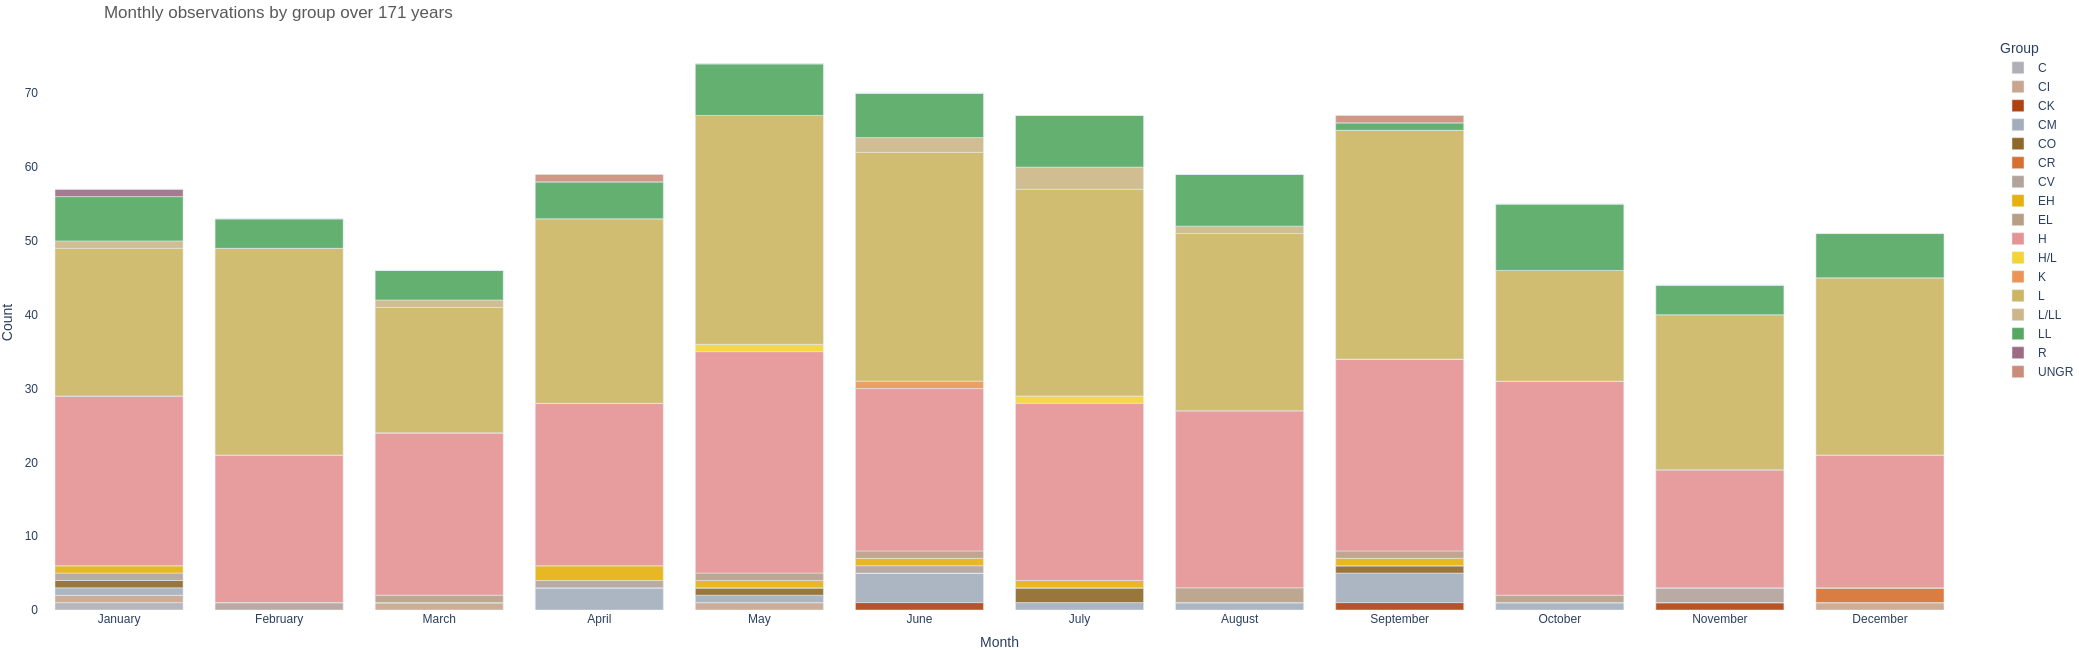

In [119]:
#define custom colors
color_discrete_sequence = new_chondrite_colors

groups = chon_dm_grouped_m.columns[1:]

fig = px.bar(chon_dm_grouped_m, x="Month", y= groups, 
             color_discrete_sequence = color_discrete_sequence,
             opacity = 0.9, title = 'Monthly observations by group over 171 years',
             labels={"value": "Count", "variable": "Group"}                                                
                )



fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Month',
    yaxis_title='Count',
    height=650, width=1500,
    margin=dict(t=35, b=10, l=0, r=5)
)





fig.show()

In [120]:
# Create a data frame
test = pd.DataFrame({
    "Month": ["January", "February", "March", "April", "May", "June"],
    "C": [10, 20, 30, 40, 50, 60],
    "CI": [10, 20, 30, 40, 50, 60],
    "CK": [10, 20, 30, 40, 50, 60],
    "CM": [10, 20, 30, 40, 50, 60],
    "CO": [10, 20, 30, 40, 50, 60],
    "CR": [10, 20, 30, 40, 50, 60],
    "CV": [10, 20, 30, 40, 50, 60],
    "EH": [10, 20, 30, 40, 50, 60],
    "EL": [10, 20, 30, 40, 50, 60],
    "H": [10, 20, 30, 40, 50, 60],
    "H/L": [10, 20, 30, 40, 50, 60],
    "K": [10, 20, 30, 40, 50, 60],
    "L": [10, 20, 30, 40, 50, 60],
    "L/LL": [10, 20, 30, 40, 50, 60],
    "LL": [10, 20, 30, 40, 50, 60],
    "R": [10, 20, 30, 40, 50, 60],
    "UNGR": [10, 20, 30, 40, 50, 60],
})

test.head()

Month   C  CI  CK  CM  CO  CR  CV  EH  EL   H  H/L   K   L  L/LL  LL  \
0   January  10  10  10  10  10  10  10  10  10  10   10  10  10    10  10   
1  February  20  20  20  20  20  20  20  20  20  20   20  20  20    20  20   
2     March  30  30  30  30  30  30  30  30  30  30   30  30  30    30  30   
3     April  40  40  40  40  40  40  40  40  40  40   40  40  40    40  40   
4       May  50  50  50  50  50  50  50  50  50  50   50  50  50    50  50   

    R  UNGR  
0  10    10  
1  20    20  
2  30    30  
3  40    40  
4  50    50

In [121]:
variables = chon_dm_grouped_m.columns[1:]

print(variables)

Index(['C', 'CI', 'CK', 'CM', 'CO', 'CR', 'CV', 'EH', 'EL', 'H', 'H/L', 'K',
       'L', 'L/LL', 'LL', 'R', 'UNGR'],
      dtype='object', name='Group_x')


### Repeat the above for the other three categories i.e. Achondrites, Primitive Achondrites, and Unclassified 

In [122]:
achondrite_dm = df_merged[df_merged['Type_y'] == "Achondrite"]
primitive_achondrite_dm = df_merged[df_merged['Type_y'] == "Primitive Achondrite"]
unclassified_dm = df_merged[df_merged['Type_y'] == "Unclassified"]


achon_dm_grouped_m = achondrite_dm.groupby(['Month', 'Group_x'])['name'].count().reset_index(name = 'count')
prim_dm_grouped_m = primitive_achondrite_dm.groupby(['Month', 'Group_x'])['name'].count().reset_index(name = 'count')
uncl_dm_grouped_m = unclassified_dm.groupby(['Month', 'Group_y'])['name'].count().reset_index(name = 'count')

achon_dm_grouped_m = achon_dm_grouped_m.pivot(index = 'Month', columns = 'Group_x', values = 'count').fillna(0).reset_index(drop = False)
prim_dm_grouped_m = prim_dm_grouped_m.pivot(index = 'Month', columns = 'Group_x', values = 'count').fillna(0).reset_index(drop = False)
uncl_dm_grouped_m = uncl_dm_grouped_m.pivot(index = 'Month', columns = 'Group_y', values = 'count').fillna(0).reset_index(drop = False)


#get the month number for sorting purposes
month_dict = {'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

achon_dm_grouped_m.loc[:, 'month_no'] = achon_dm_grouped_m.loc[:, ['Month']].copy()
prim_dm_grouped_m.loc[:, 'month_no'] = prim_dm_grouped_m.loc[:, ['Month']].copy()
uncl_dm_grouped_m.loc[:, 'month_no'] = uncl_dm_grouped_m.loc[:, ['Month']].copy()

# pd.to_datetime(metcat_1933.month_no, format='%b').dt.month
achon_dm_grouped_m.month_no = achon_dm_grouped_m.month_no.map(month_dict)
prim_dm_grouped_m.month_no = prim_dm_grouped_m.month_no.map(month_dict)
uncl_dm_grouped_m.month_no = uncl_dm_grouped_m.month_no.map(month_dict)

achon_dm_grouped_m.sort_values(by = 'month_no', inplace = True)
prim_dm_grouped_m.sort_values(by = 'month_no', inplace = True)
uncl_dm_grouped_m.sort_values(by = 'month_no', inplace = True)

achon_dm_grouped_m = achon_dm_grouped_m.set_index('month_no')
prim_dm_grouped_m = prim_dm_grouped_m.set_index('month_no')
uncl_dm_grouped_m = uncl_dm_grouped_m.set_index('month_no')


print()
display(achon_dm_grouped_m.head())
print()
display(prim_dm_grouped_m.head())
print()
display(uncl_dm_grouped_m.head())

#save the csv for future use
achon_dm_grouped_m.to_csv('./Data/achondrites_by_month.csv')
#save the csv for future use
prim_dm_grouped_m.to_csv('./Data/primitives_by_month.csv')
#save the csv for future use
uncl_dm_grouped_m.to_csv('./Data/unclassified_by_month.csv')

Group_x      Month  ANGR  AUB  DIO  EUC  HOW  IIAB  IID  IIE  IIF  IIIAB  IVA  \
month_no                                                                        
1          January   1.0  0.0  0.0  0.0  0.0   0.0  0.0  1.0  0.0    1.0  0.0   
2         February   0.0  1.0  0.0  2.0  0.0   1.0  0.0  0.0  0.0    0.0  0.0   
3            March   0.0  1.0  1.0  1.0  0.0   1.0  0.0  0.0  0.0    1.0  0.0   
4            April   0.0  2.0  1.0  3.0  3.0   1.0  0.0  0.0  0.0    3.0  0.0   
5              May   0.0  0.0  0.0  0.0  1.0   0.0  0.0  0.0  0.0    2.0  0.0   

Group_x   MES  PAL  SNC  
month_no                 
1         1.0  0.0  0.0  
2         0.0  1.0  0.0  
3         0.0  0.0  0.0  
4         1.0  0.0  0.0  
5         1.0  1.0  0.0

Group_x    Month  ACAP  IAB  IIICD  LOD  UNGR  URE  WIN
month_no                                               
3          March   0.0  0.0    0.0  0.0   0.0  1.0  0.0
4          April   0.0  1.0    0.0  0.0   1.0  0.0  1.0
5            May   0.0  0.0    0.0  0.0   0.0  1.0  0.0
7           July   0.0  1.0    0.0  0.0   0.0  0.0  0.0
8         August   1.0  1.0    0.0  0.0   1.0  2.0  0.0

Group_y     Month  Iron  Stone-uncl  Unknown
month_no                                    
1         January   1.0         0.0      0.0
3           March   0.0         2.0      0.0
4           April   3.0         2.0      1.0
5             May   0.0         1.0      0.0
6            June   2.0         5.0      0.0

In [123]:
#color shuffler 
# shuffle(colors)
# new_achondrite_colors = colors
# print(new_achondrite_colors)

In [124]:
new_achondrite_colors = ['rgb(244, 212, 52)', 'rgb(204, 100, 76)', 'rgb(217, 165, 152)', 'rgb(230, 176, 13)', 'rgb(113, 127, 138)', 
                         'rgb(189, 91, 64)', 'rgb(131, 123, 115)', 'rgb(214, 133, 98)', 'rgb(200, 165, 140)', 'rgb(189, 127, 15)', 
                         'rgb(173, 149, 131)', 'rgb(184, 158, 133)', 'rgb(145, 52, 19)', 'rgb(98, 108, 148)', 'rgb(174, 66, 17)', 
                         'rgb(186, 87, 29)', 'rgb(108, 156, 156)', 'rgb(193, 146, 111)', 'rgb(142, 104, 40)', 'rgb(201, 136, 4)', 
                         'rgb(132, 156, 180)', 'rgb(239, 163, 122)', 'rgb(164, 173, 188)', 'rgb(205, 115, 98)', 'rgb(143, 144, 148)', 
                         'rgb(172, 121, 93)', 'rgb(194, 164, 71)', 'rgb(187, 112, 126)', 'rgb(149, 157, 162)', 'rgb(199, 162, 96)', 
                         'rgb(114, 135, 152)', 'rgb(153, 154, 44)', 'rgb(183, 141, 42)', 'rgb(132, 124, 164)', 'rgb(178, 163, 155)',
                         'rgb(98, 107, 125)', 'rgb(199, 110, 44)', 'rgb(182, 95, 86)', 'rgb(84, 140, 178)', 'rgb(217, 134, 78)', 
                         'rgb(221, 164, 98)', 'rgb(173, 80, 53)', 'rgb(234, 149, 83)', 'rgb(129, 84, 76)', 'rgb(224, 169, 144)', 
                         'rgb(169, 159, 31)', 'rgb(181, 142, 78)', 'rgb(182, 68, 116)', 'rgb(204, 182, 98)', 'rgb(204, 140, 122)', 
                         'rgb(121, 164, 194)', 'rgb(128, 163, 164)', 'rgb(100, 125, 109)', 'rgb(165, 122, 40)', 'rgb(229, 111, 96)', 
                         'rgb(177, 175, 182)', 'rgb(155, 124, 107)', 'rgb(205, 182, 135)', 'rgb(166, 108, 27)', 'rgb(199, 155, 34)', 
                         'rgb(196, 140, 174)', 'rgb(122, 112, 108)', 'rgb(132, 184, 212)', 'rgb(229, 147, 148)', 'rgb(192, 168, 149)', 
                         'rgb(215, 112, 47)', 'rgb(148, 133, 121)', 'rgb(196, 125, 94)', 'rgb(216, 139, 118)', 'rgb(84, 168, 98)', 
                         'rgb(157, 108, 132)', 'rgb(175, 141, 100)', 'rgb(212, 92, 60)', 'rgb(155, 152, 104)', 'rgb(132, 180, 188)', 
                         'rgb(158, 148, 172)', 'rgb(157, 104, 80)', 'rgb(218, 190, 124)', 'rgb(186, 134, 118)', 'rgb(208, 158, 122)']

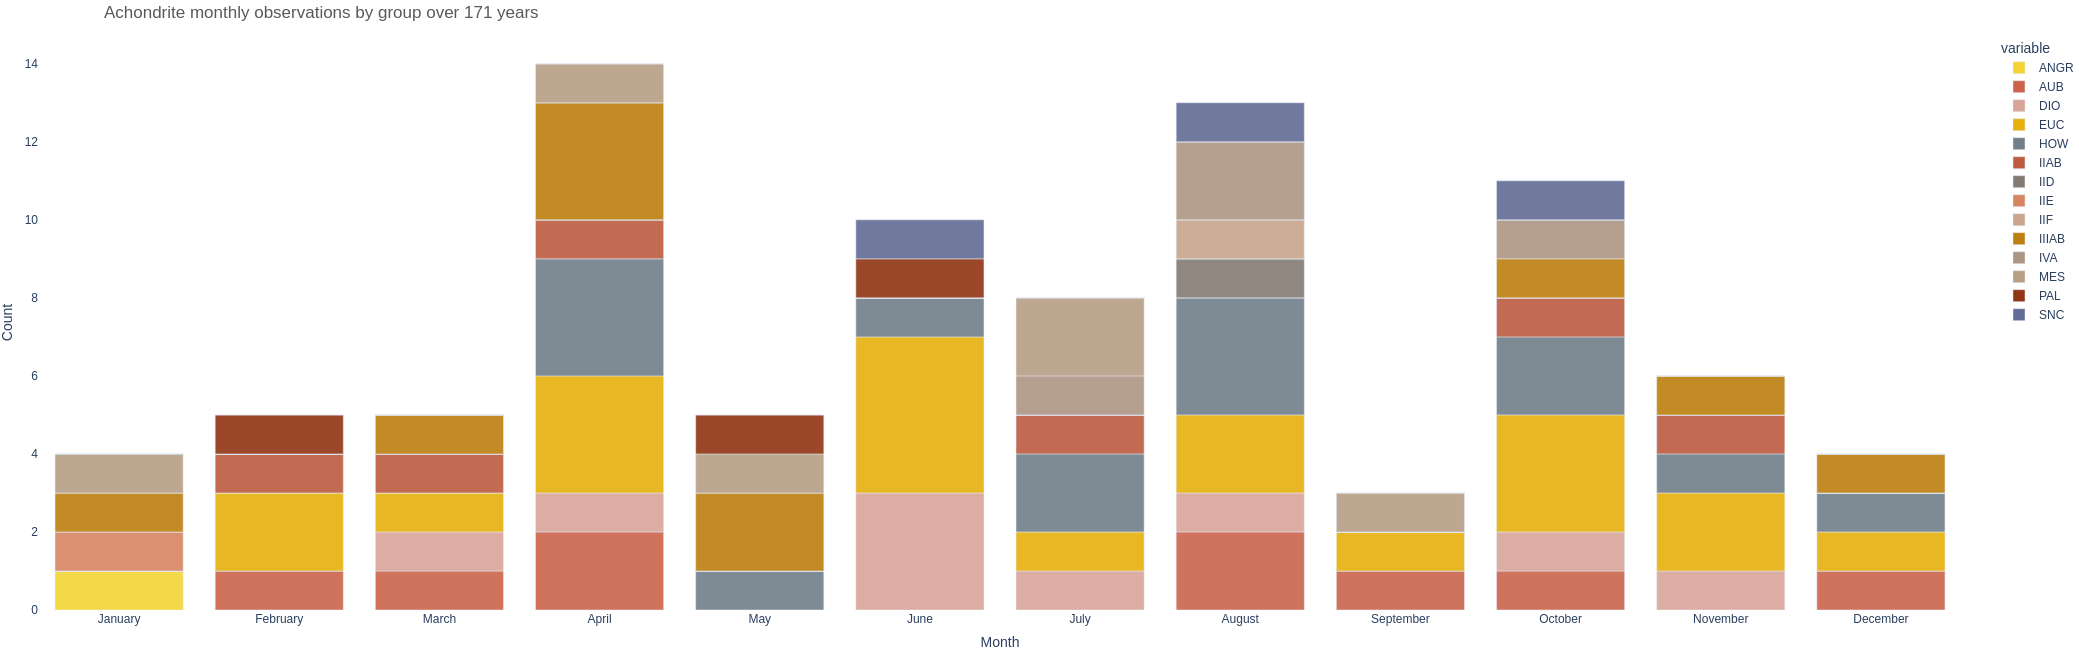

In [125]:
color_discrete_sequence2 = new_achondrite_colors

fig = px.bar(achon_dm_grouped_m, x="Month", y=["ANGR", "AUB", "DIO", "EUC", "HOW", "IIAB", "IID", "IIE", "IIF", "IIIAB", "IVA", "MES", "PAL", "SNC"],
             color_discrete_sequence = color_discrete_sequence2,
             opacity = 0.9, title= 'Achondrite monthly observations by group over 171 years'
            )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Month',
    yaxis_title='Count',
    height=650, width=1500,
    margin=dict(t=35, b=10, l=0, r=5)
)



fig.show()

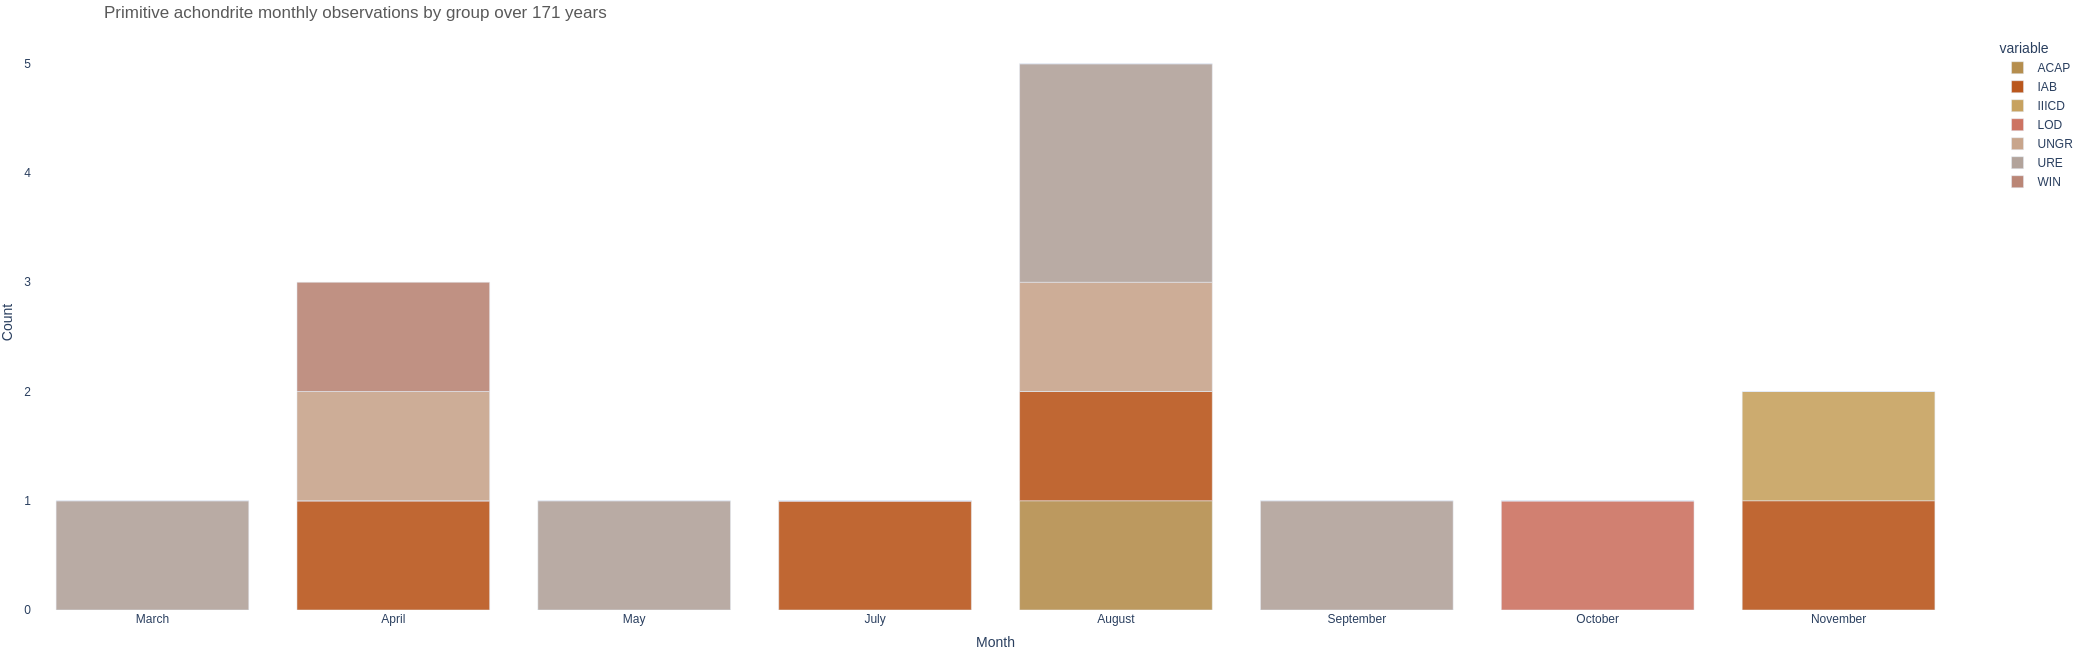

In [126]:
#define custom colors
color_discrete_sequence3 = colors

fig = px.bar(prim_dm_grouped_m, x="Month", y=["ACAP", "IAB", "IIICD", "LOD", "UNGR", "URE", "WIN"],
             color_discrete_sequence = color_discrete_sequence3,
             opacity = 0.9, title = 'Primitive achondrite monthly observations by group over 171 years'
            )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Month',
    yaxis_title='Count',
    height=650, width=1100,
    margin=dict(t=35, b=10, l=0, r=5)
)



fig.show()

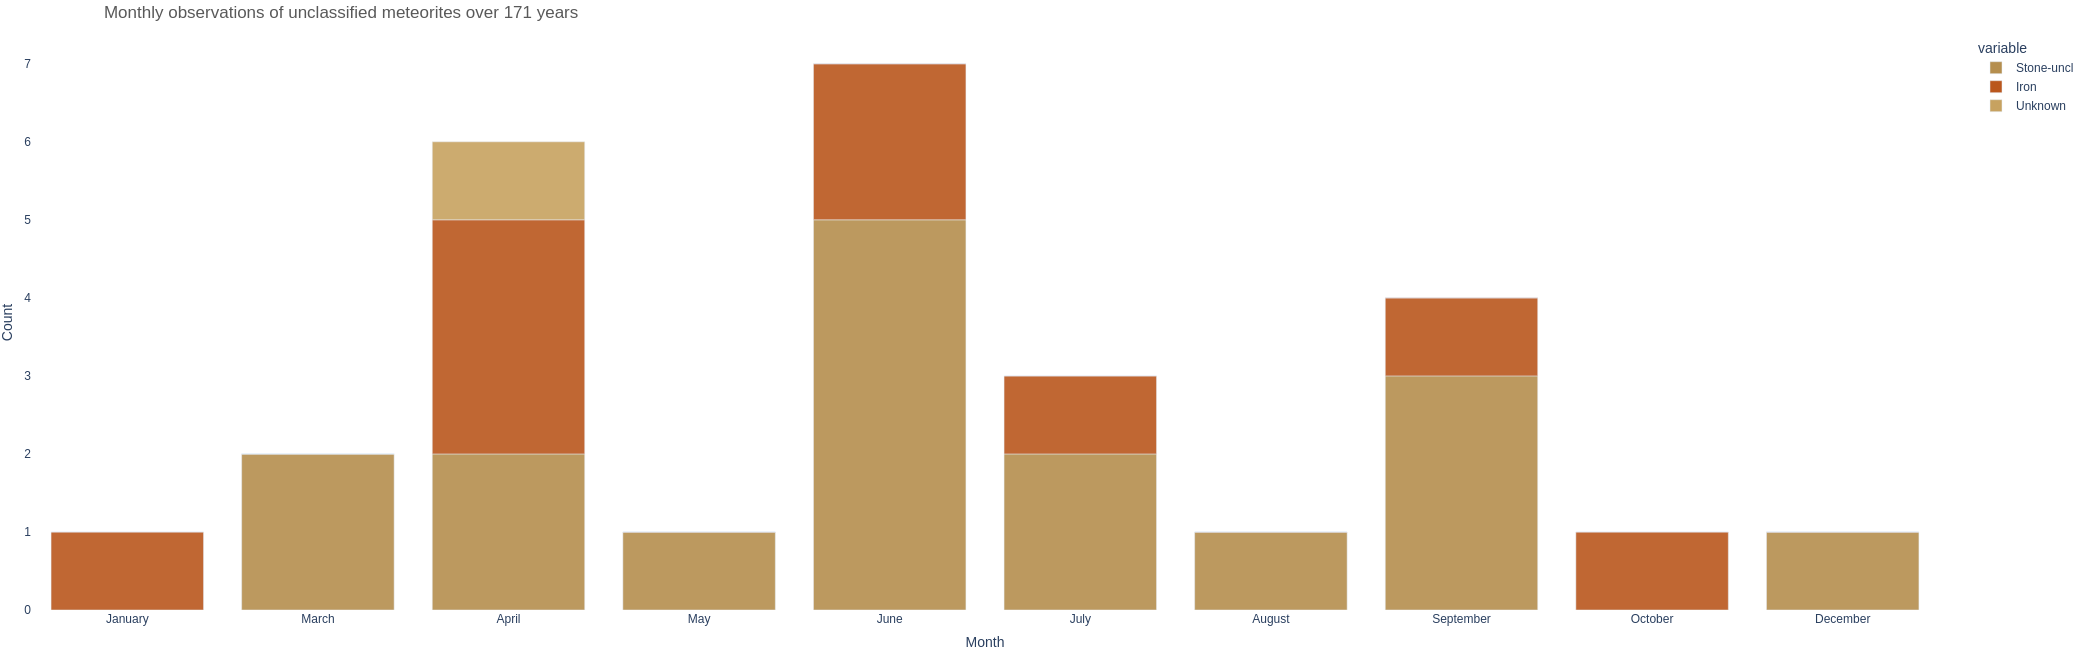

In [127]:
#define custom colors
color_discrete_sequence4 = colors

fig = px.bar(uncl_dm_grouped_m, x="Month", y=['Stone-uncl', 'Iron', 'Unknown'],
             color_discrete_sequence = color_discrete_sequence4,
             opacity = 0.9, title = 'Monthly observations of unclassified meteorites over 171 years'
            )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title_font_color = 'rgb(89, 89, 89)',
    xaxis_title='Month',
    yaxis_title='Count',
    height=650, width=550,
    margin=dict(t=35, b=10, l=0, r=5)
)



fig.show()

In [128]:
#Turn the month into a numerical variable
month_dict = {'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#group by year, month, group and merge the month number as a third numerical variable
chon_dm_grouped_mgy = chondrite_dm.groupby(['Year', 'Month', 'Group_x'])['name'].count().reset_index(name = 'count')
chon_dm_grouped_mgy.loc[:, 'month_no'] = chon_dm_grouped_mgy.loc[:, ['Month']].copy()
chon_dm_grouped_mgy.month_no = chon_dm_grouped_mgy.month_no.map(month_dict)

#group by year, month, group and merge the month number as a third numerical variable
achon_dm_grouped_mgy = achondrite_dm.groupby(['Year', 'Month', 'Group_x'])['name'].count().reset_index(name = 'count')
achon_dm_grouped_mgy.loc[:, 'month_no'] = achon_dm_grouped_mgy.loc[:, ['Month']].copy()
achon_dm_grouped_mgy.month_no = achon_dm_grouped_mgy.month_no.map(month_dict)

#group by year, month, group and merge the month number as a third numerical variable
primitive_dm_grouped_mgy = primitive_achondrite_dm.groupby(['Year', 'Month', 'Group_x'])['name'].count().reset_index(name = 'count')
primitive_dm_grouped_mgy.loc[:, 'month_no'] = primitive_dm_grouped_mgy.loc[:, ['Month']].copy()
primitive_dm_grouped_mgy.month_no = primitive_dm_grouped_mgy.month_no.map(month_dict)

#group by year, month, group and merge the month number as a third numerical variable
unclassified_dm_grouped_mgy = unclassified_dm.groupby(['Year', 'Month', 'Group_y'])['name'].count().reset_index(name = 'count')
unclassified_dm_grouped_mgy.loc[:, 'month_no'] = unclassified_dm_grouped_mgy.loc[:, ['Month']].copy()
unclassified_dm_grouped_mgy.month_no = unclassified_dm_grouped_mgy.month_no.map(month_dict)

#save the new sets as csv files
chon_dm_grouped_mgy.to_csv('./Data/chondrites_by_mgy.csv')
achon_dm_grouped_mgy.to_csv('./Data/achondrites_by_mgy.csv')
primitive_dm_grouped_mgy.to_csv('./Data/primitives_by_mgy.csv')
unclassified_dm_grouped_mgy.to_csv('./Data/unclassified_by_mgy.csv')

In [129]:
chon_dm_grouped_mgy

Year      Month Group_x  count  month_no
0    1830   February       L      1         2
1    1830        May      LL      1         5
2    1831        May       L      1         5
3    1831  September       H      1         9
4    1833   November       H      1        11
..    ...        ...     ...    ...       ...
659  1999  September      CK      1         9
660  2000    January       C      1         1
661  2000       July       H      1         7
662  2000        May       H      1         5
663  2001      March       H      1         3

[664 rows x 5 columns]

In [130]:
chon_dm_grouped_mgy["count"][chon_dm_grouped_mgy["count"] == 1].sum() / chon_dm_grouped_mgy["count"].sum()

0.8974358974358975

In [131]:
# import pandas as pd
# import plotly
# import plotly.graph_objs as go


# #Set marker properties
# #markersize = chon_dm_grouped_mgy['count']
# markercolor = chon_dm_grouped_mgy['count']
# #markershape = chon_dm_grouped_mgy['month_no']

# #Make Plotly figure
# fig1 = go.Scatter3d(x=chon_dm_grouped_mgy['Year'],
#                     y=chon_dm_grouped_mgy['month_no'],
#                     z=chon_dm_grouped_mgy['count'],
#                     marker=dict(#size=markersize,
#                                 color=markercolor,
#                                 #symbol=markershape,
#                                 opacity=0.9,
#                                 #reversescale=True,
#                                 colorscale='Tealgrn'),
                   
#                     line=dict (width=0.02),
#                     mode='markers')

# #Make Plot.ly Layout
# mylayout = go.Layout(scene=dict(xaxis=dict( title="Year"),
#                                 yaxis=dict( title="Month", tickmode="linear"),
#                                 zaxis=dict(title="Count", tickmode="linear")),)

# #Plot and save html
# plotly.offline.plot({"data": [fig1],
#                      "layout": mylayout},
#                      auto_open=True,
#                      filename=("5D Plot.html"))


In [132]:
groups = sorted(list(chon_dm_grouped_mgy["Group_x"].unique()))

groups

['C',
 'CI',
 'CK',
 'CM',
 'CO',
 'CR',
 'CV',
 'EH',
 'EL',
 'H',
 'H/L',
 'K',
 'L',
 'L/LL',
 'LL',
 'R',
 'UNGR']

In [133]:
len(groups)

17

In [134]:
# from plotly.validators.scatter.marker import SymbolValidator
# SymbolValidator().values

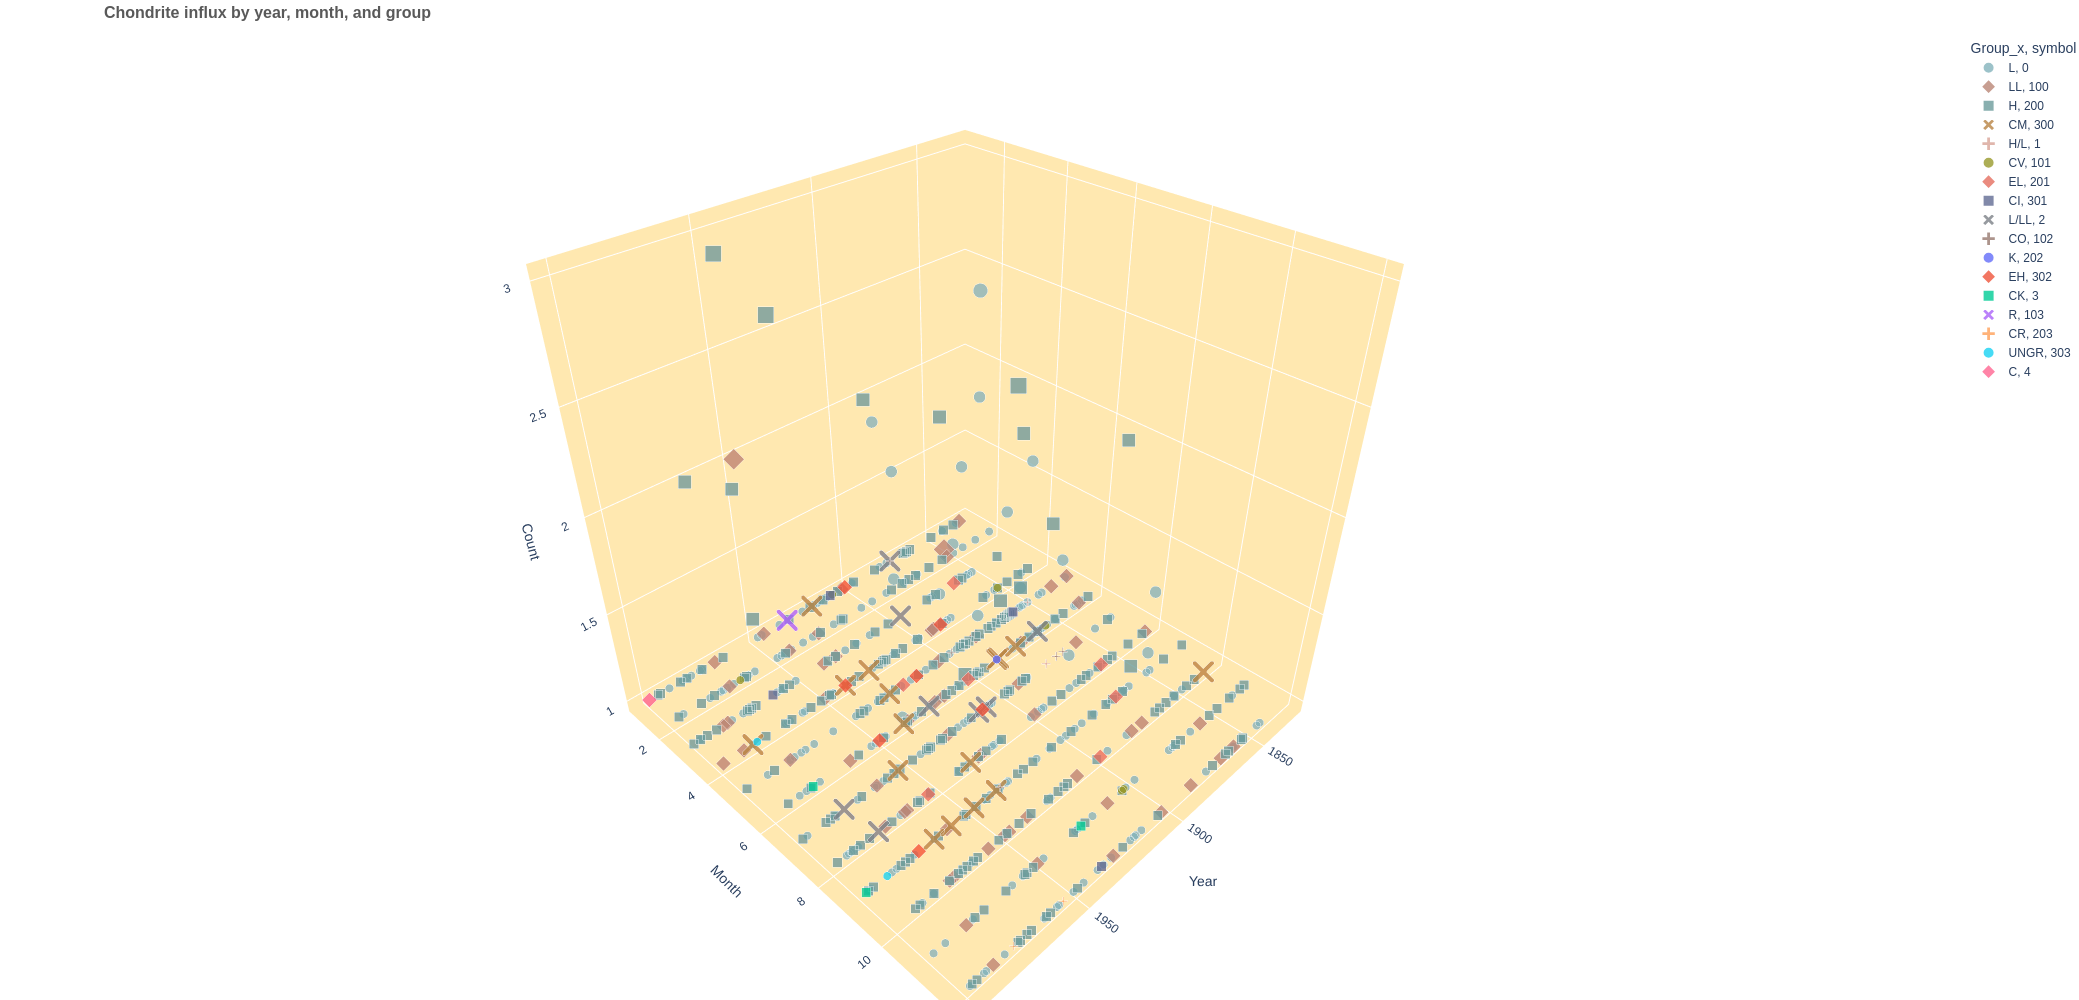

In [135]:
import plotly.express as px
import numpy as np
from plotly.validators.scatter.marker import SymbolValidator

# Create a SymbolValidator object to access the symbols
symbol_validator = SymbolValidator()

# Get the list of available symbols
raw_symbols = symbol_validator.values

# Create empty lists for name stems, name variants, and symbols
namestems = []
namevariants = []
symbols = []

# Iterate through the symbols and extract their name stems and variants
for i in range(0, len(raw_symbols), 3):
    name = raw_symbols[i + 2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])

# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(chon_dm_grouped_mgy['Group_x'].values, color_list)}

# Create a new column with integer values representing each unique group
chon_dm_grouped_mgy['group_id'] = pd.factorize(chon_dm_grouped_mgy['Group_x'])[0]

# Create a SymbolValidator object to access the symbols
symbol_validator = SymbolValidator()

# Get the list of available symbols
raw_symbols = symbol_validator.values

# Create empty lists for name stems, name variants, and symbols
namestems = []
namevariants = []
symbols = []

# Iterate through the symbols and extract their name stems and variants
for i in range(0, len(raw_symbols), 3):
    name = raw_symbols[i + 2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])


# Assign symbols based on the group_id
chon_dm_grouped_mgy['symbol'] = chon_dm_grouped_mgy['group_id'].apply(lambda x: symbols[x % len(symbols)])

# Create the scatter 3D plot using Plotly Express
fig = px.scatter_3d(
    chon_dm_grouped_mgy,
    x='Year',
    y='month_no',
    z='count',
    color='Group_x',
    symbol='symbol',  # Use the 'symbol' column for symbols
    color_discrete_map=color_map,
    size='count',
    size_max=24,
    opacity=1,
    custom_data=['Group_x', 'Year', 'Month', 'count'],
)


fig.update_traces(hoverinfo = "text",
                  opacity = 0.8,
                  hovertemplate = "<br>".join([
                             "Group: %{customdata[0]}",
                             "Year: %{customdata[1]}",
                             "Month: %{customdata[2]}",
                             "Count: %{customdata[3]}"]),
                
                 )

# tight layout
fig.update_layout(
                  margin=dict(l=0, r=0, b=0, t=35),
                  title=dict(text='<b>Chondrite influx by year, month, and group</b>'),
                  title_font_color = 'rgb(89, 89, 89)',
                  title_font_size = 16,  
                  scene=dict(
                    xaxis_title='Year',
                    yaxis_title='Month',
                    zaxis_title='Count',
                    xaxis = dict(
                         backgroundcolor='rgba(233, 181, 125, 0.8)',
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor='rgba(233, 181, 125, 0.8)',
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor='rgba(233, 181, 125, 0.8)',
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                  height = 1000,
                  width = 1500,
                )                  
                 
fig.show()

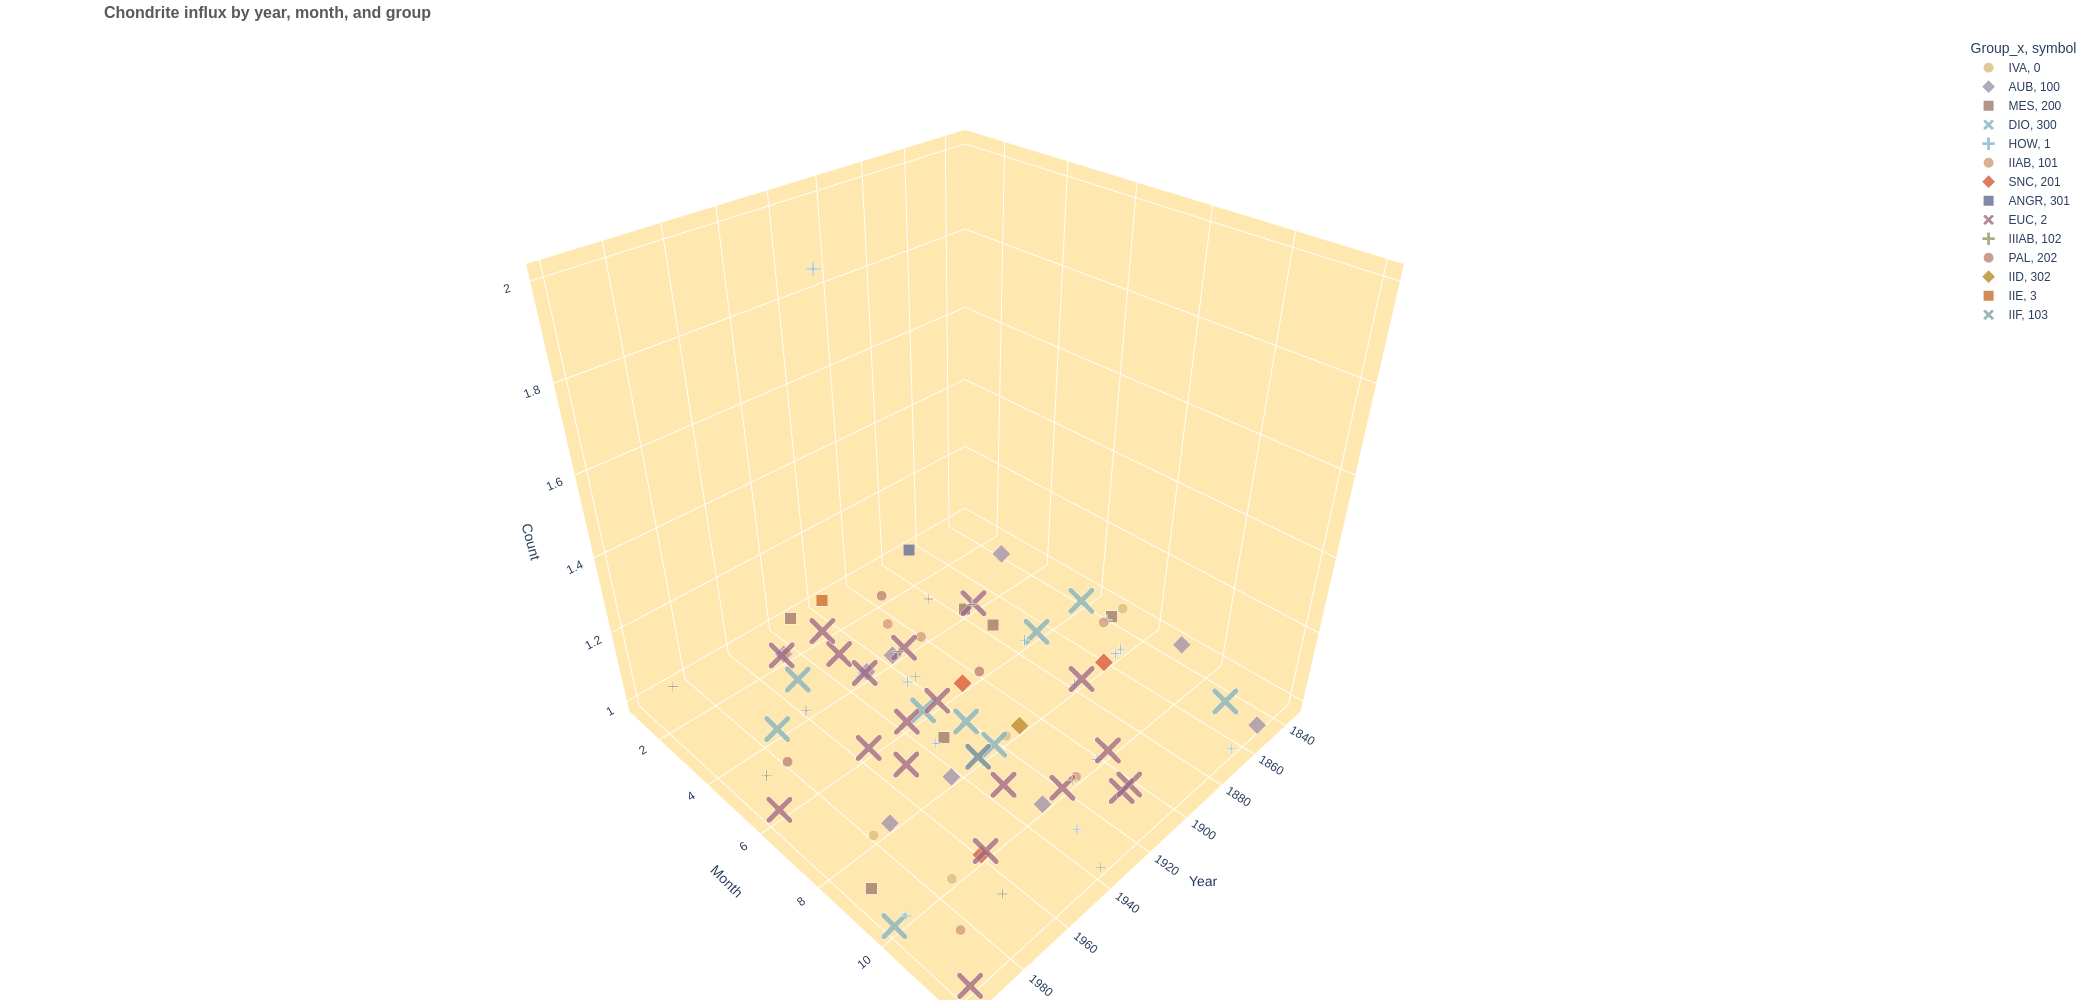

In [136]:
# Create a dictionary that maps the values in the column to colors.
color_map = {value: color for value, color in zip(achon_dm_grouped_mgy['Group_x'].values, new_achondrite_colors)}

# Create a new column with integer values representing each unique group
achon_dm_grouped_mgy['group_id'] = pd.factorize(achon_dm_grouped_mgy['Group_x'])[0]

# Create a SymbolValidator object to access the symbols
symbol_validator = SymbolValidator()

# Get the list of available symbols
raw_symbols = symbol_validator.values

# Create empty lists for name stems, name variants, and symbols
namestems = []
namevariants = []
symbols = []

# Iterate through the symbols and extract their name stems and variants
for i in range(0, len(raw_symbols), 3):
    name = raw_symbols[i + 2]
    symbols.append(raw_symbols[i])
    namestems.append(name.replace("-open", "").replace("-dot", ""))
    namevariants.append(name[len(namestems[-1]):])


# Assign symbols based on the group_id
achon_dm_grouped_mgy['symbol'] = achon_dm_grouped_mgy['group_id'].apply(lambda x: symbols[x % len(symbols)])

# Create the scatter 3D plot using Plotly Express
fig = px.scatter_3d(
    achon_dm_grouped_mgy,
    x='Year',
    y='month_no',
    z='count',
    color='Group_x',
    symbol='symbol',  # Use the 'symbol' column for symbols
    color_discrete_map=color_map,
    size='count',
    size_max=24,
    opacity=1,
    custom_data=['Group_x', 'Year', 'Month', 'count'],
)


fig.update_traces(hoverinfo = "text",
                  opacity = 0.8,
                  hovertemplate = "<br>".join([
                             "Group: %{customdata[0]}",
                             "Year: %{customdata[1]}",
                             "Month: %{customdata[2]}",
                             "Count: %{customdata[3]}"]),

                 )

# tight layout
fig.update_layout(
                  margin=dict(l=0, r=0, b=0, t=35),
                  title=dict(text='<b>Chondrite influx by year, month, and group</b>'),
                  title_font_color = 'rgb(89, 89, 89)',
                  title_font_size = 16,  
                  scene=dict(
                    xaxis_title='Year',
                    yaxis_title='Month',
                    zaxis_title='Count',
                    xaxis = dict(
                         backgroundcolor='rgba(233, 181, 125, 0.8)',
                         gridcolor="white",
                         showbackground=True,
                         zerolinecolor="white",),
                    yaxis = dict(
                        backgroundcolor='rgba(233, 181, 125, 0.8)',
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white"),
                    zaxis = dict(
                        backgroundcolor='rgba(233, 181, 125, 0.8)',
                        gridcolor="white",
                        showbackground=True,
                        zerolinecolor="white",),),
                  height = 1000,
                  width = 1500,
                  legend=dict(
                      itemsizing='constant',  # Use a constant item size for the legend markers
                      itemclick='toggleothers',  # Enable toggle behavior on clicking the legend items
                      traceorder='normal',  # Set the trace order to normal
                      tracegroupgap=10,  # Adjust the gap between legend items        
                      itemdoubleclick='toggle'  # Enable double-click behavior on legend items

    ),
                )                  


#display the plot
fig.show()



In [137]:
achondrites_sorted_by_mass = achondrite_dm.sort_values(by = "mass (g)", ascending = False)

achondrites_sorted_by_mass.head(20)

name      Type_x                 Class (A)chondrite  \
707        Sikhote-Alin        Iron  Coarsest octahedrite          NaN   
524       Norton County       Stone               Aubrite   Achondrite   
456       Millbillillie       Stone               Eucrite   Achondrite   
734         Sterlitamak        Iron    Medium octahedrite          NaN   
205         Estherville  Stony-iron          Mesosiderite          NaN   
76           Boguslavka        Iron           Hexahedrite          NaN   
572              Omolon  Stony-iron             Pallasite          NaN   
166     Dong Ujimqin Qi  Stony-iron          Mesosiderite          NaN   
387            Kayakent        Iron    Medium octahedrite          NaN   
625  Peña Blanca Spring       Stone               Aubrite   Achondrite   
767              Treysa        Iron    Medium octahedrite          NaN   
806             Veramin  Stony-iron          Mesosiderite          NaN   
44              Akyumak        Iron    Medium octahedrite          NaN   
160         Cabin Creek        Iron    Medium octahedrite          NaN   
508          Marjalahti  Stony-iron             Pallasite          NaN   
587        Piplia Kalan       Stone               Eucrite   Achondrite   
312           Johnstown       Stone             Diogenite   Achondrite   
400             Lohawat       Stone             Howardite   Achondrite   
83              Braunau        Iron           Hexahedrite          NaN   
617              Patwar  Stony-iron          Mesosiderite          NaN   

    Group_x Petrologic type      Type_y            Group_y    mass (g)  Year  \
707    IIAB             Ogg  Achondrite         Iron, IIAB  23000000.0  1947   
524     AUB             NaN  Achondrite            Aubrite   1100000.0  1948   
456     EUC             NaN  Achondrite      Eucrite-mmict    330000.0  1960   
734   IIIAB              Om  Achondrite        Iron, IIIAB    325000.0  1990   
205     MES             NaN  Achondrite  Mesosiderite-A3/4    320000.0  1879   
76     IIAB               H  Achondrite         Iron, IIAB    256000.0  1916   
572     PAL             NaN  Achondrite     Pallasite, PMG    250000.0  1981   
166     MES             NaN  Achondrite       Mesosiderite    128800.0  1995   
387   IIIAB              Om  Achondrite        Iron, IIIAB     85000.0  1961   
625     AUB             NaN  Achondrite            Aubrite     70000.0  1946   
767   IIIAB              Om  Achondrite     Iron, IIIAB-an     63000.0  1916   
806     MES             NaN  Achondrite    Mesosiderite-B2     54000.0  1880   
44      IVA              Om  Achondrite          Iron, IVA     50000.0  1981   
160   IIIAB              Om  Achondrite        Iron, IIIAB     48500.0  1886   
508     PAL             NaN  Achondrite     Pallasite, PMG     45000.0  1902   
587     EUC             NaN  Achondrite      Eucrite-mmict     42000.0  1996   
312     DIO             NaN  Achondrite          Diogenite     40300.0  1924   
400     HOW             NaN  Achondrite          Howardite     40000.0  1994   
83     IIAB               H  Achondrite         Iron, IIAB     39000.0  1847   
617     MES             NaN  Achondrite    Mesosiderite-A1     37350.0  1935   

         Month  Day               Hour            Locality         Country  \
707   February   12               1038  Maritime Territory          Russia   
524   February   18               1656              Kansas             USA   
456    October  NaN                NaN   Western Australia       Australia   
734        May   17               2320    Bashkir Republic          Russia   
205        May   10               1700                Iowa             USA   
76     October   18               1147  Maritime Territory          Russia   
572        May   16                510                 NaN          Russia   
166  September    7   13:35 local time      Inner Mongolia           China   
387      April  NaN                NaN                 NaN          Turkey   
625

In [138]:
achondrites_sorted_by_mass.tail(30)

name      Type_x               Class (A)chondrite  \
93                   Bustee       Stone             Aubrite   Achondrite   
15   Angra dos Reis (stone)       Stone             Angrite   Achondrite   
845                  Yurtuk       Stone           Howardite   Achondrite   
211                Ellemeet       Stone           Diogenite   Achondrite   
817            Vissannapeta       Stone             Eucrite   Achondrite   
33                     Avce        Iron         Hexahedrite          NaN   
521                 Norfork        Iron  Medium octahedrite          NaN   
279                 Haraiya       Stone             Eucrite   Achondrite   
40         Aioun el Atrouss       Stone           Diogenite   Achondrite   
495                 Malvern       Stone           Howardite   Achondrite   
28                   Aubres       Stone             Aubrite   Achondrite   
393             Le Teilleul       Stone           Howardite   Achondrite   
810                 Vetluga       Stone             Eucrite   Achondrite   
532                  Nyaung        Iron  Medium octahedrite          NaN   
231       Frankfort (stone)       Stone           Howardite   Achondrite   
256             Garhi Yasin        Iron  Medium octahedrite          NaN   
88                   Bununu       Stone           Howardite   Achondrite   
851                  Zaisho  Stony-iron           Pallasite          NaN   
859                   Zmenj       Stone           Howardite   Achondrite   
831               Washougal       Stone           Howardite   Achondrite   
86                   Brient       Stone             Eucrite   Achondrite   
408               Lakangaon       Stone             Eucrite   Achondrite   
179           Dyarrl Island  Stony-iron        Mesosiderite          NaN   
626                Peramiho       Stone             Eucrite   Achondrite   
622             Peckelsheim       Stone           Ungrouped   Achondrite   
342              Kirbyville       Stone             Eucrite   Achondrite   
498                Manegaon       Stone           Diogenite   Achondrite   
436               Medanitos       Stone             Eucrite   Achondrite   
311                  Jodzie       Stone           Howardite   Achondrite   
542                 Nagaria       Stone             Eucrite   Achondrite   

    Group_x Petrologic type      Type_y            Group_y  mass (g)  Year  \
93      AUB             NaN  Achondrite            Aubrite    1500.0  1852   
15     ANGR             NaN  Achondrite            Angrite    1500.0  1869   
845     HOW             NaN  Achondrite          Howardite    1472.0  1936   
211     DIO             NaN  Achondrite          Diogenite    1470.0  1925   
817     EUC             NaN  Achondrite         Eucrite-cm    1303.8  1997   
33     IIAB               H  Achondrite         Iron, IIAB    1230.0  1908   
521   IIIAB              Om  Achondrite        Iron, IIIAB    1050.0  1918   
279     EUC             NaN  Achondrite      Eucrite-mmict    1000.0  1878   
40      DIO             NaN  Achondrite       Diogenite-pm    1000.0  1974   
495     HOW             NaN  Achondrite      Eucrite-pmict     807.0  1933   
28      AUB             NaN  Achondrite            Aubrite     800.0  1836   
393     HOW             NaN  Achondrite          Howardite     780.0  1845   
810     EUC             NaN  Achondrite      Eucrite-mmict     750.0  1949   
532   IIIAB              Om  Achondrite        Iron, IIIAB     737.6  1939   
231     HOW             NaN  Achondrite          Howardite     650.0  1868   
256     IIE              Om  Achondrite          Iron, IIE     380.0  1917   
88      HOW             NaN  Achondrite          Howardite     357.0  1942   
851     PAL             NaN  Achondrite  Pallasite, PMG-an     330.0  1898   
859     HOW             NaN  Achondrite          Howardite     246.0  1858   
831     HOW             NaN  Achondrite          Howardite     225.0  1939   
86      EUC             NaN 

In [139]:
df183[df183["group"] == "Iron, IIIAB"].sort_values(by = "mass (g)", ascending = False)

name     id        Type        group  mass (g)    year  latitude  \
417      Jianshi  12087  Achondrite  Iron, IIIAB  600000.0  1890.0  30.80833   
952  Sterlitamak  23724  Achondrite  Iron, IIIAB  325000.0  1990.0  53.66667   
460     Kayakent  12268  Achondrite  Iron, IIIAB   85000.0  1961.0  39.26333   
157  Cabin Creek   5186  Achondrite  Iron, IIIAB   48500.0  1886.0  35.50000   
428    Juromenha  12213  Achondrite  Iron, IIIAB   25250.0  1968.0  38.74028   
202     Chisenga   5355  Achondrite  Iron, IIIAB    3920.0  1988.0 -10.05944   
858       Rowton  22773  Achondrite  Iron, IIIAB    3500.0  1876.0  52.76667   
872      Samelia  23115  Achondrite  Iron, IIIAB    2462.0  1921.0  25.66667   
704      Norfork  16994  Achondrite  Iron, IIIAB    1050.0  1918.0  36.21667   
714       Nyaung  17969  Achondrite  Iron, IIIAB     737.6  1939.0  21.20833   

     longitude             country      continent  
417  109.50000               China           Asia  
952   55.98333  Russian Federation         Europe  
460   31.78000              Turkey           Asia  
157  -93.50000       United States  North America  
428   -7.27000            Portugal         Europe  
202   33.39500              Malawi         Africa  
858   -2.51667      United Kingdom         Europe  
872   74.86667               India           Asia  
704  -92.26667       United States  North America  
714   94.91667             Myanmar           Asia

In [141]:
df183[df183["Type"] == "Primitive Achondrite"]

name     id                  Type              group  \
3           Acapulco     10  Primitive Achondrite        Acapulcoite   
30    Almahata Sitta  48915  Primitive Achondrite        Ureilite-an   
65            Bahjoi   4922  Primitive Achondrite      Iron, IAB-sLL   
128            Bogou   5097  Primitive Achondrite       Iron, IAB-MG   
266          Dyalpur   7757  Primitive Achondrite           Ureilite   
367      Hassi-Jekna  11852  Primitive Achondrite      Iron, IAB-sHL   
369           Haverö  11859  Primitive Achondrite           Ureilite   
408         Jalanash  12068  Primitive Achondrite           Ureilite   
517         Lahrauli  12433  Primitive Achondrite           Ureilite   
546           Lodran  14675  Primitive Achondrite          Lodranite   
569         Magnesia  15386  Primitive Achondrite      Iron, IAB-sHL   
600          Mazapil  15453  Primitive Achondrite      Iron, IAB-sLL   
662      Muzaffarpur  16885  Primitive Achondrite      Iron, IAB-sHL   
707        Novo-Urei  17933  Primitive Achondrite           Ureilite   
796            Pitts  18837  Primitive Achondrite      Iron, IAB-ung   
804        Pontlyfni  18865  Primitive Achondrite          Winonaite   
820            Quesa  22360  Primitive Achondrite      Iron, IAB-ung   
1023    Udei Station  24101  Primitive Achondrite      Iron, IAB-ung   
1082        Yardymly  30352  Primitive Achondrite  Iron, IAB complex   

      mass (g)    year  latitude  longitude             country      continent  
3       1914.0  1976.0  16.88333  -99.90000              Mexico  North America  
30      3950.0  2008.0  20.74575   32.41275               Sudan         Africa  
65     10322.0  1934.0  28.48333   78.50000               India           Asia  
128     8800.0  1962.0  12.50000    0.70000        Burkina Faso         Africa  
266      300.0  1872.0  26.25000   82.00000               India           Asia  
367     1250.0  1890.0  28.95000    0.81667             Algeria         Africa  
369     1544.0  1971.0  60.24556   22.06194             Finland         Europe  
408      700.0  1990.0  48.30000   89.50000            Mongolia           Asia  
517      900.0  1955.0  26.78333   82.71667               India           Asia  
546     1000.0  1868.0  29.53333   71.80000            Pakistan           Asia  
569     5000.0  1899.0  37.86667   27.51667              Turkey           Asia  
600     4000.0  1885.0  24.68333 -101.68333              Mexico  North America  
662     1245.0  1964.0  26.13333   85.53333               India           Asia  
707     1900.0  1886.0  54.81667   46.00000  Russian Federation         Europe  
796     3760.0  1921.0  31.95000  -83.51667       United States  North America  
804      157.0  1931.0  53.03639   -4.31944      United Kingdom         Europe  
820    10750.0  1898.0  39.00000   -0.66667               Spain         Europe  
1023  103000.0  1927.0   7.95000    8.08333             Nigeria         Africa  
1082  150200.0  1959.0  38.93333   48.25000          Azerbaijan           Asia

In [142]:
metcat_falls_171_known_month["(A)chondrite"].unique()

array(['Chondrite', 'Achondrite', nan], dtype=object)

In [143]:
primitive_achondrite_dm

name Type_x                  Class (A)chondrite Group_x  \
9       Acapulco  Stone            Acapulcoite   Achondrite    ACAP   
52        Bahjoi   Iron     Coarse octahedrite          NaN     IAB   
75         Bogou   Iron     Coarse octahedrite          NaN     IAB   
178      Dyalpur  Stone               Ureilite   Achondrite     URE   
283       Haverö  Stone               Ureilite   Achondrite     URE   
314     Jalanash  Stone               Ureilite   Achondrite     URE   
399       Lodran  Stone              Lodranite   Achondrite     LOD   
401     Lahrauli  Stone               Ureilite   Achondrite     URE   
432      Mazapil   Iron     Medium octahedrite          NaN     IAB   
487  Muzaffarpur   Iron  Plessitic octahedrite          NaN    UNGR   
526    Novo-Urei  Stone               Ureilite   Achondrite     URE   
590        Pitts   Iron       Fine octahedrite          NaN     IAB   
596    Pontlyfni  Stone              Winonaite   Achondrite     WIN   
637        Quesa   Iron     Medium octahedrite          NaN    UNGR   
839     Yardymly   Iron     Coarse octahedrite          NaN   IIICD   

    Petrologic type                Type_y            Group_y  mass (g)  Year  \
9               NaN  Primitive Achondrite        Acapulcoite    1914.0  1976   
52               Og  Primitive Achondrite      Iron, IAB-sLL   10322.0  1934   
75               Og  Primitive Achondrite       Iron, IAB-MG    8800.0  1962   
178             NaN  Primitive Achondrite           Ureilite     300.0  1872   
283             NaN  Primitive Achondrite           Ureilite    1544.0  1971   
314             NaN  Primitive Achondrite           Ureilite     700.0  1990   
399             NaN  Primitive Achondrite          Lodranite    1000.0  1868   
401             NaN  Primitive Achondrite           Ureilite     900.0  1955   
432              Om  Primitive Achondrite      Iron, IAB-sLL    4000.0  1885   
487             Opl  Primitive Achondrite      Iron, IAB-sHL    1245.0  1964   
526             NaN  Primitive Achondrite           Ureilite    1900.0  1886   
590              Of  Primitive Achondrite      Iron, IAB-ung    3760.0  1921   
596             NaN  Primitive Achondrite          Winonaite     157.0  1931   
637              Om  Primitive Achondrite      Iron, IAB-ung   10750.0  1898   
839              Og  Primitive Achondrite  Iron, IAB complex  150200.0  1959   

         Month Day  Hour          Locality       Country      continent  \
9       August  11  1100          Guerrero        Mexico  North America   
52        July  23  2130     Uttar Pradesh         India           Asia   
75      August  14  1000               NaN  Burkina Faso         Africa   
178        May   8   NaN     Uttar Pradesh         India           Asia   
283     August   2  1545               NaN       Finland         Europe   
314     August  15   NaN       Bayan-Ölgiy      Mongolia           Asia   
399    October   1  1400            Punjab      Pakistan           Asia   
401      March  24  1100     Uttar Pradesh         India           Asia   
432   November  27  2100         Zacatecas        Mexico  North America   
487      April  11  1700             Bihar         India           Asia   
526  September   4   715  Mordova Republic        Russia         Europe   
590      April  20   900           Georgia           USA  North America   
596      April  14  1153           Gwynedd         Wales         Europe   
637     August   1  2100          Valencia         Spain         Europe   
839   November  24   705               NaN    Azerbaijan           Asia   

     latitude  longitude  
9     16.8833   -99.9000  
52    28.4833    78.5000  
75    12.5000     0.7000  
178   26.2500    82.0000  
283   60.2456    22.0619  
314       NaN        NaN  
399   29.5333    71.8000  
401   26.7833    82.7167  
432   24.6833  -101.6833  
487   26.1333    85.5333  
526   54.8167    46.0000  
590   31.9500   -83.5167  
596   53.0364    -4.3194  
637   39.0000  

In [145]:
#create a monthly grouping based on the NASA classification

prim_dm_grouped_m_group_y = primitive_achondrite_dm.groupby(['Month', 'Group_y'])['name'].count().reset_index(name = 'count')
prim_dm_grouped_m_group_y = prim_dm_grouped_m_group_y.pivot(index = 'Month', columns = 'Group_y', values = 'count').fillna(0).reset_index(drop = False)
#get the month number for sorting purposes
month_dict = {'January' : 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
              'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
prim_dm_grouped_m_group_y.loc[:, 'month_no'] = prim_dm_grouped_m_group_y.loc[:, ['Month']].copy()
# pd.to_datetime(metcat_1933.month_no, format='%b').dt.month
prim_dm_grouped_m_group_y.month_no = prim_dm_grouped_m_group_y.month_no.map(month_dict)
prim_dm_grouped_m_group_y.sort_values(by = 'month_no', inplace = True)
prim_dm_grouped_m_group_y = prim_dm_grouped_m_group_y.set_index('month_no')

print()
display(prim_dm_grouped_m_group_y.head())

#save the csv for future use
prim_dm_grouped_m_group_y.to_csv('./Data/primitives_by_month_nasa_grouping.csv')

Group_y    Month  Acapulcoite  Iron, IAB complex  Iron, IAB-MG  Iron, IAB-sHL  \
month_no                                                                        
3          March          0.0                0.0           0.0            0.0   
4          April          0.0                0.0           0.0            1.0   
5            May          0.0                0.0           0.0            0.0   
7           July          0.0                0.0           0.0            0.0   
8         August          1.0                0.0           1.0            0.0   

Group_y   Iron, IAB-sLL  Iron, IAB-ung  Lodranite  Ureilite  Winonaite  
month_no                                                                
3                   0.0            0.0        0.0       1.0        0.0  
4                   0.0            1.0        0.0       0.0        1.0  
5                   0.0            0.0        0.0       1.0        0.0  
7                   1.0            0.0        0.0       0.0        0.0  
8                   0.0            1.0        0.0       2.0        0.0

In [146]:
variables = prim_dm_grouped_m_group_y.columns[1:]

print(variables)

Index(['Acapulcoite', 'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
       'Iron, IAB-sLL', 'Iron, IAB-ung', 'Lodranite', 'Ureilite', 'Winonaite'],
      dtype='object', name='Group_y')


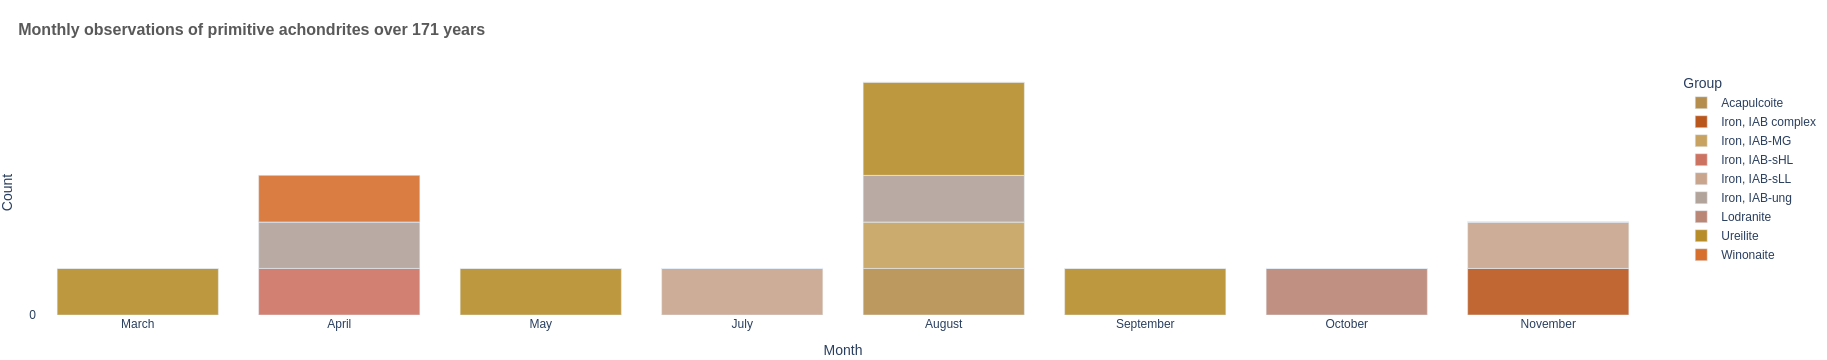

In [149]:
#define custom colors
color_discrete_sequence3 = colors

fig = px.bar(prim_dm_grouped_m_group_y, x="Month", y=['Acapulcoite', 'Iron, IAB complex', 'Iron, IAB-MG', 'Iron, IAB-sHL',
       'Iron, IAB-sLL', 'Iron, IAB-ung', 'Lodranite', 'Ureilite', 'Winonaite'],
             color_discrete_sequence = color_discrete_sequence3,
             opacity = 0.9,
             labels={"value": "Count", "variable": "Group"}
                        )

fig.update_layout(
    {'plot_bgcolor': 'rgba(0, 0, 0, 0)'},
    title=dict(text='<b>Monthly observations of primitive achondrites over 171 years</b>'),
    title_font_color='rgb(89, 89, 89)',
    title_font_size=16,
    title_x = 0.01,
    xaxis_title='Month',
    yaxis_title='Count',
    yaxis=dict(dtick = 10),
    margin=dict(t=70, b=5, l=20, r=20),
    #height = 400,
    showlegend = True)

fig.show()